In [ ]:
#######calculate raster
import os
import numpy as np
import rasterio
import pandas as pd

# 输入目录
tif_path = r"F:/model/results/current/raw/current_output"

# 列出所有 .tif 文件
tif_files = [
    os.path.join(tif_path, f)
    for f in os.listdir(tif_path) if f.endswith(".tif")
]

results = []

def transform_func(x):
    """(exp(x) - 1) * 100"""
    return (np.exp(x) - 1) * 100


for f in tif_files:
    print(f"Processing: {f}")

    with rasterio.open(f) as src:
        data = src.read(1).astype("float32")  # 只处理第 1 波段

        # 处理 NoData
        nodata = src.nodata
        if nodata is not None:
            mask = data == nodata
        else:
            mask = np.isnan(data)

        # 执行转换
        transformed = transform_func(data)

        # 保证 NoData 不参与计算
        transformed[mask] = np.nan

        # 计算统计值
        mean_val = np.nanmean(transformed)
        sd_val = np.nanstd(transformed)
        median_val = np.nanmedian(transformed)

        # 记录结果
        results.append({
            "file": os.path.basename(f),
            "mean": float(mean_val),
            "sd": float(sd_val),
            "median": float(median_val)
        })

# 转为 DataFrame
df = pd.DataFrame(results)

# 保存为 CSV
csv_path = os.path.join(tif_path, "future_output_stats.csv")
df.to_csv(csv_path, index=False)

print("Saved CSV to:", csv_path)
print(df)


Processing: F:/model/results/current/raw/current_output\clipped_active_sub_cleaned.tif
Processing: F:/model/results/current/raw/current_output\clipped_active_top_cleaned.tif
Processing: F:/model/results/current/raw/current_output\clipped_passive_sub_cleaned.tif
Processing: F:/model/results/current/raw/current_output\clipped_passive_top_cleaned.tif
Processing: F:/model/results/current/raw/current_output\clipped_SOC_sub_cleaned.tif
Processing: F:/model/results/current/raw/current_output\clipped_SOC_top_cleaned.tif
Saved CSV to: F:/model/results/current/raw/current_output\future_output_stats.csv
                              file       mean         sd     median
0   clipped_active_sub_cleaned.tif  24.179062  40.912903  15.745575
1   clipped_active_top_cleaned.tif  32.589569  34.731236  27.163935
2  clipped_passive_sub_cleaned.tif   8.875968  32.843189   3.238398
3  clipped_passive_top_cleaned.tif  12.978400  37.112797   6.191587
4      clipped_SOC_sub_cleaned.tif  -3.360275  19.640461  -6

: 

=== 开始增强的XGBoost建模（修复数据泄露版本）===
原始数据大小: 1476

=== 异常值处理 ===
开始异常值检测...
  Lon: 发现 248 个异常值 (16.80%)
  Lat: 发现 48 个异常值 (3.25%)
  Age: 发现 62 个异常值 (4.20%)

总共发现 304 个异常值样本
清除异常值后数据大小: 1172 (移除了 304 个样本)
进行安全的特征工程...
  创建对数特征: Lon_log
  创建对数特征: Lat_log
  创建对数特征: Age_log
  创建分箱特征: Altitude_bins

=== 数据泄露检查 ===
✅ 训练集和测试集没有重叠
训练集大小: 820
测试集大小: 352
特征数量: 31

=== LUtype 特征增强 ===
原始 LUtype 训练集分布:
LUtype
1.0    516
2.0     87
3.0     72
4.0     18
5.0    116
6.0      8
7.0      3
Name: count, dtype: int64

增强 LUtype 重要性，因子: 3.0
  创建 LUtype 副本: LUtype_boost_0
  创建 LUtype 副本: LUtype_boost_1
  创建 LUtype 副本: LUtype_boost_2
  创建交互特征: LUtype_Age_interaction
  创建交互特征: LUtype_Altitude_interaction
  创建 LUtype_squared

=== 数据增强 ===
训练集增强前大小: 820


[I 2025-12-06 19:03:00,327] A new study created in memory with name: no-name-c3649aed-2cf7-4f5d-8581-7de0f2418e62


训练集增强后大小: 3280

=== 最终数据集统计 ===
训练集大小: 3280
测试集大小: 352
总特征数量: 37

特征统计:
LUtype 相关特征: 7

=== 开始超参数调优 ===
Tuning hyperparameters with aggressive overfitting prevention...
Using very strong regularization and shallow trees


[I 2025-12-06 19:03:03,059] Trial 0 finished with value: 0.5436803732293806 and parameters: {'eta': 0.019545349536429436, 'max_depth': 3, 'subsample': 0.6583555613386938, 'colsample_bytree': 0.4325804535802907, 'colsample_bylevel': 0.4396825783298732, 'min_child_weight': 15, 'lambda': 20.539472521038498, 'alpha': 9.799348796590479, 'gamma': 1.7702068296716433, 'max_delta_step': 0}. Best is trial 0 with value: 0.5436803732293806.
[I 2025-12-06 19:03:03,295] Trial 1 finished with value: 0.5335697441819578 and parameters: {'eta': 0.012631125287217607, 'max_depth': 3, 'subsample': 0.480680513130286, 'colsample_bytree': 0.540846116417654, 'colsample_bylevel': 0.5438427754985734, 'min_child_weight': 19, 'lambda': 24.565028879562536, 'alpha': 5.206770102867534, 'gamma': 1.4711266285273032, 'max_delta_step': 0}. Best is trial 1 with value: 0.5335697441819578.
[I 2025-12-06 19:03:05,810] Trial 2 finished with value: 0.5282160552797113 and parameters: {'eta': 0.04394234595547109, 'max_depth': 4,

Best parameters found: {'eta': 0.03974885193259519, 'max_depth': 4, 'subsample': 0.561170455675215, 'colsample_bytree': 0.6863008478983269, 'colsample_bylevel': 0.6119205854887653, 'min_child_weight': 17, 'lambda': 16.7176068897135, 'alpha': 6.122607652039276, 'gamma': 1.590034103925384, 'max_delta_step': 1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'nthread': 17}
最佳参数: {'eta': 0.03974885193259519, 'max_depth': 4, 'subsample': 0.561170455675215, 'colsample_bytree': 0.6863008478983269, 'colsample_bylevel': 0.6119205854887653, 'min_child_weight': 17, 'lambda': 16.7176068897135, 'alpha': 6.122607652039276, 'gamma': 1.590034103925384, 'max_delta_step': 1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'nthread': 17}

=== 开始交叉验证 ===
[0]	train-rmse:0.65187	valid-rmse:0.59868
[0]	train-rmse:0.63506	valid-rmse:0.66468
[0]	train-rmse:0.64355	valid-rmse:0.62696
[0]	train-rmse:0.63050	valid-rmse:0.68479
[0]	train-rmse:0.64801	valid-rmse:0.61521
[0]	t

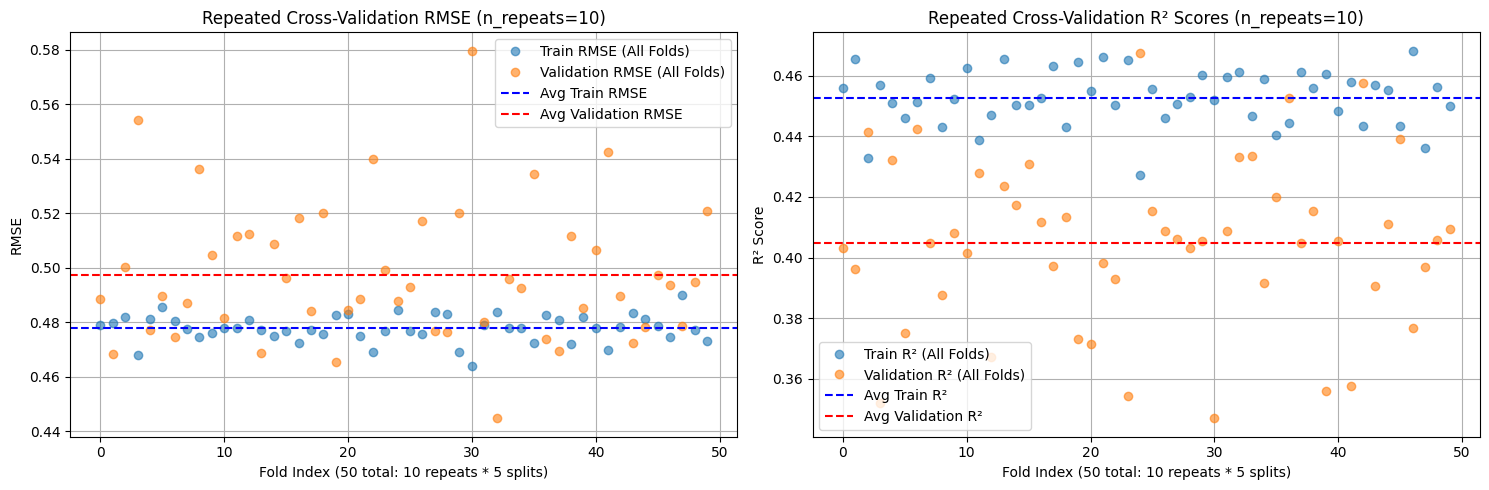


=== 交叉验证结果 ===
平均训练RMSE: 0.4778 (±0.0049)
平均验证RMSE: 0.4974 (±0.0251)
平均训练R²: 0.4527 (±0.0090)
平均验证R²: 0.4048 (±0.0273)

使用 445 轮训练最终模型...
[0]	train-rmse:0.64119
[100]	train-rmse:0.49943
[200]	train-rmse:0.48403
[300]	train-rmse:0.47720
[400]	train-rmse:0.47405
[444]	train-rmse:0.47337

绘制学习曲线...


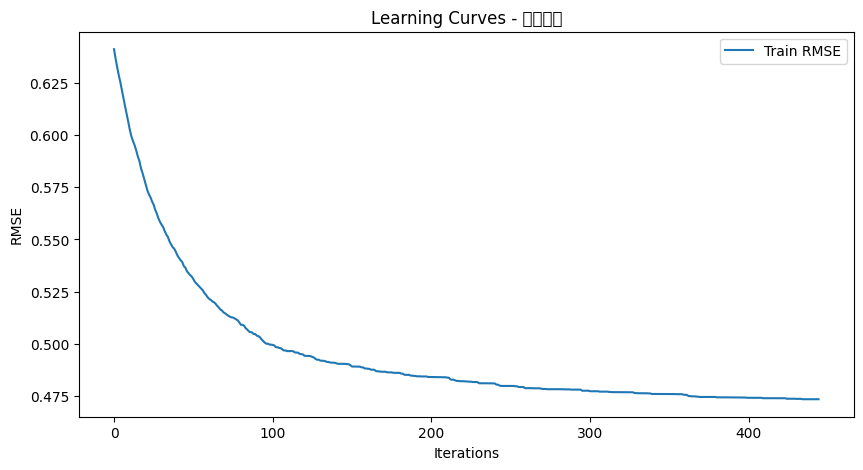


评估最终模型...

=== 最终测试指标 ===
RMSE: 0.5264
R²: 0.2699
MAE: 0.3676

绘制最终模型性能...


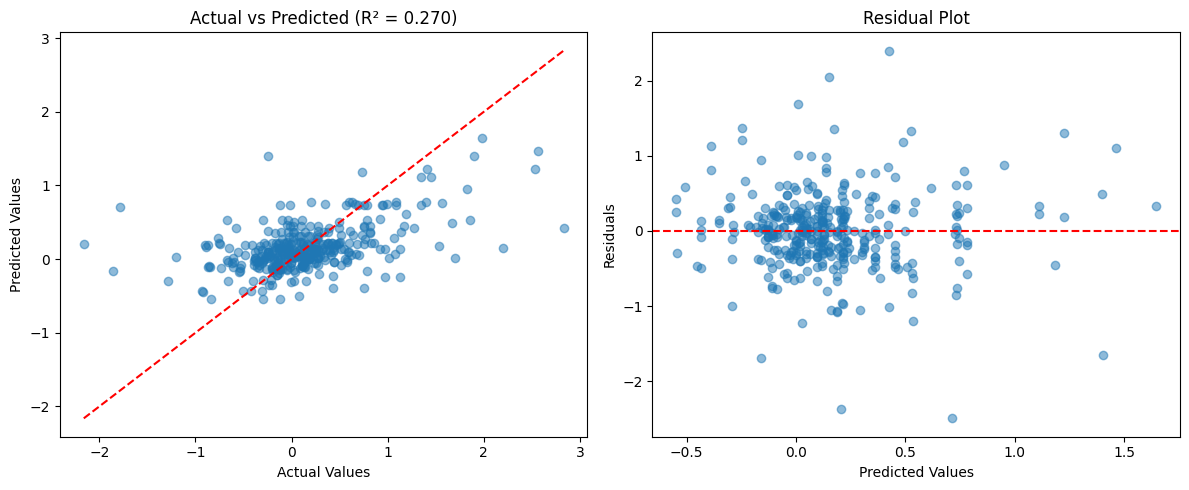


分析 LUtype 特征重要性...


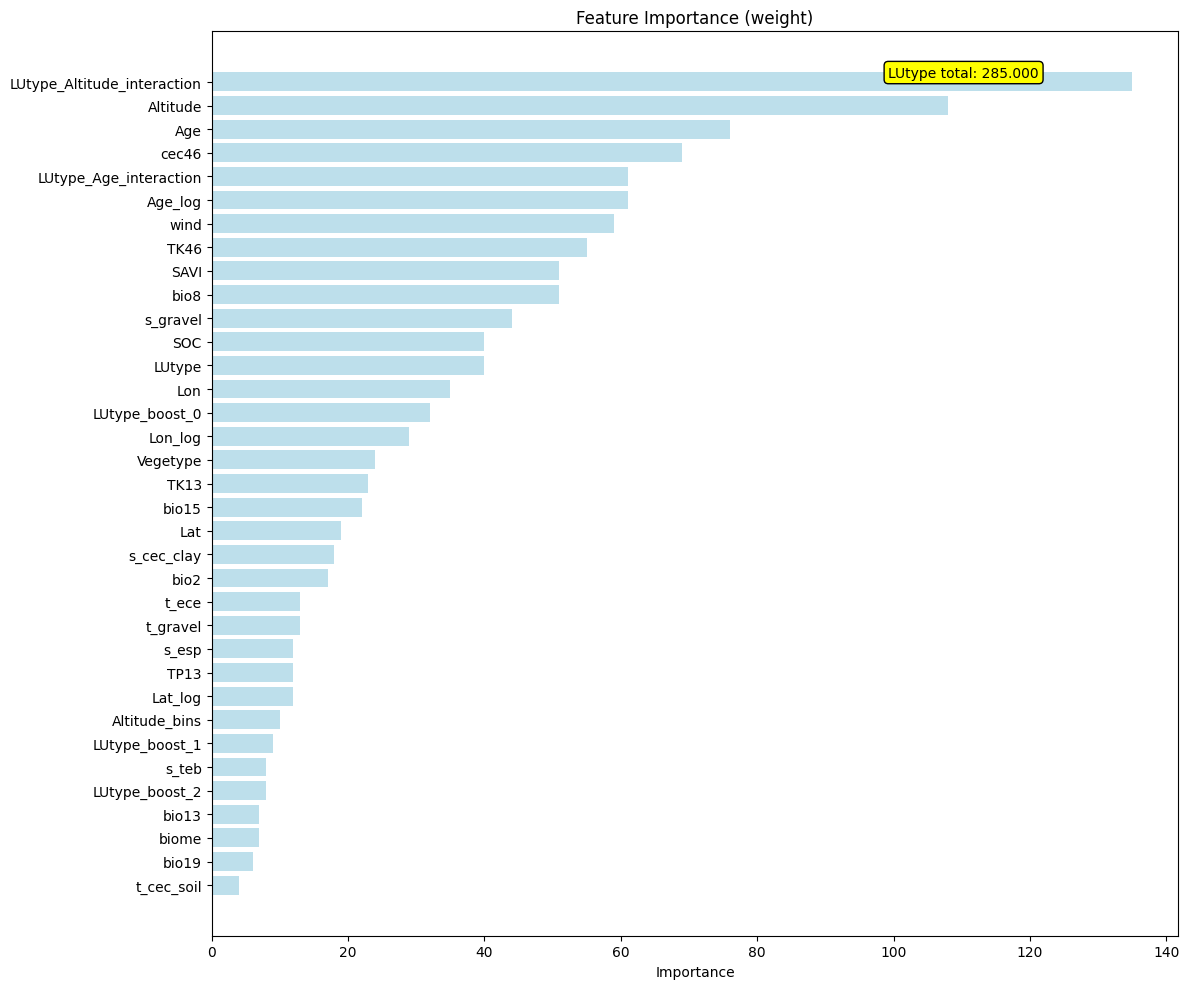


=== LUtype Feature Importance Analysis ===
Total LUtype-related features: 7
Total importance of LUtype features: 286.000
Average importance of LUtype features: 40.857

LUtype importance percentage: 23.99%

Top LUtype-related features:
  LUtype_Altitude_interaction: 135.0000
  LUtype_Age_interaction: 61.0000
  LUtype: 40.0000
  LUtype_boost_0: 32.0000
  LUtype_boost_1: 9.0000
  LUtype_boost_2: 8.0000
  LUtype_squared: 1.0000

生成SHAP摘要图...


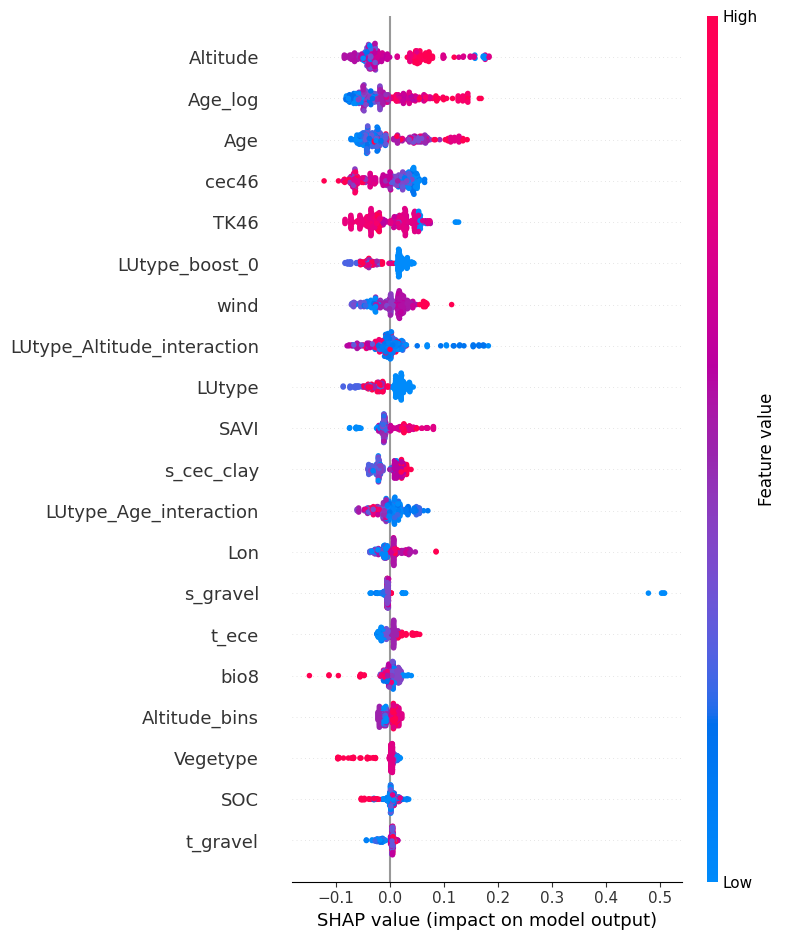

<Figure size 640x480 with 0 Axes>


保存结果...

=== 模型训练总结 ===
✓ 实现了 n_repeats=10 的重复交叉验证
✓ 修复了数据泄露问题
✓ 添加了异常值检测和处理
✓ 安全的特征工程（避免数据泄露）
✓ 创建了多个LUtype特征副本
✓ 添加了LUtype与其他重要变量的交互特征
✓ 添加了LUtype平方项（非线性效应）
✓ 改进了超参数搜索空间以更好地处理分类特征
✓ 测试集使用原始数据（无增强噪声）

=== 完成! ===


In [23]:
#LI topsoil code
# SOC model LUtype enhance - remove category2 1130
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
# 关键修改：导入 RepeatedKFold
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import joblib
import os
import re
from pathlib import Path
import warnings
import builtins
from scipy import stats
open = builtins.open

warnings.filterwarnings('ignore')

# SHAP availability check
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

class XGBoostTuner:
    def __init__(self, seed=42, n_jobs=-1):
        self.seed = seed
        self.n_jobs = n_jobs if n_jobs != -1 else None
        self.study = None
        self.best_model = None
        self.best_params = None
        self.feature_names = None  # Store feature names

    @staticmethod
    def clean_numeric_value(value):
        """Convert string values to numeric, handling special cases"""
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            # Remove any non-numeric characters except minus, decimal point
            cleaned = re.sub(r'[^\d.-]', '', value)
            try:
                return float(cleaned) if cleaned else np.nan
            except ValueError:
                return np.nan
        return float(value)

    def objective(self, trial, dtrain, num_boost_round=500):
        """强化正则化的目标函数"""
        params = {
            'eta': trial.suggest_float('eta', 0.005, 0.1, log=True),  # 更低的学习率
            'max_depth': trial.suggest_int('max_depth', 2, 4),  # 更浅的树
            'subsample': trial.suggest_float('subsample', 0.4, 0.7),  # 更低的子采样
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.7),  # 更低的特征采样
            'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.4, 0.7),
            'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),  # 更高的最小子节点权重
            'lambda': trial.suggest_float('lambda', 10, 25.0),  # 更强的L2正则化
            'alpha': trial.suggest_float('alpha', 5.0, 15.0),  # 更强的L1正则化
            'gamma': trial.suggest_float('gamma', 0.5, 2.0),  # 更高的剪枝参数
            'max_delta_step': trial.suggest_int('max_delta_step', 0, 1),
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'verbosity': 0,
            'seed': self.seed,
            'nthread': 1
        }

        cv_results = xgb.cv(
            params=params,
            dtrain=dtrain,
            num_boost_round=800,  # 更多的轮次但更保守的早停
            nfold=5,
            metrics='rmse',
            early_stopping_rounds=25,  # 更保守的早停
            as_pandas=True,
            seed=self.seed,
            shuffle=True
        )

        # 更强的过拟合惩罚
        train_rmse = cv_results['train-rmse-mean'].iloc[-1]
        val_rmse = cv_results['test-rmse-mean'].iloc[-1]
        
        # 计算过拟合程度
        overfitting_ratio = (train_rmse - val_rmse) / train_rmse
        gap_penalty = max(0, overfitting_ratio) * 0.3  # 更强的惩罚
        
        # 如果过拟合严重，增加额外惩罚
        if overfitting_ratio > 0.1:
            gap_penalty += (overfitting_ratio - 0.1) * 0.5
            
        return val_rmse + gap_penalty
    
    def tune_hyperparameters(self, dtrain, n_trials=20):  # 增加试验次数
        """专注于泛化的超参数调优"""
        study = optuna.create_study(direction='minimize')
        
        print("Tuning hyperparameters with aggressive overfitting prevention...")
        print("Using very strong regularization and shallow trees")

        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            futures = [executor.submit(lambda: study.optimize(
                lambda trial: self.objective(trial, dtrain),
                n_trials=5,
                n_jobs=1
            )) for _ in range(n_trials//5)]

            for future in futures:
                future.result()

        self.study = study
        self.best_params = study.best_params
        self.best_params.update({
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'seed': self.seed,
            'nthread': self.n_jobs
        })

        print(f"Best parameters found: {self.best_params}")
        return self.best_params


    def train_model(self, params, dtrain, dvalid=None, num_boost_round=500):
        """训练模型，专注于防止过拟合"""
        evals = [(dtrain, 'train')]
        if dvalid is not None:
            evals.append((dvalid, 'valid'))

        evals_result = {}
        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=evals,
            early_stopping_rounds=25,  # 更保守的早停
            verbose_eval=100,  # 减少输出频率
            evals_result=evals_result
        )

        self.feature_names = dtrain.feature_names
        if self.feature_names is None:
            self.feature_names = [f'f{i}' for i in range(dtrain.num_col())]
            model.feature_names = self.feature_names

        return model, evals_result

    def cross_validate(self, params, X, y, n_splits=5, n_repeats=10, cv_models_dir='cv_models'): 
        """Optimized CV with parallel fold execution and model saving"""
        Path(cv_models_dir).mkdir(parents=True, exist_ok=True)

        # 关键修改：使用 RepeatedKFold 确保 n_repeats=10 次重复
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=self.seed)
        
        cv_results = {
            'train_rmse': [], 'val_rmse': [],
            'train_r2': [], 'val_r2': [],
            'best_iterations': [],
            'model_paths': [],
            'feature_names': []
        }
        num_boost_round = 500 # 交叉验证中使用的默认最大轮次，通常会被 early_stopping_rounds 覆盖

        def process_fold(fold_idx, train_idx, val_idx):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
            dval = xgb.DMatrix(X_val, label=y_val, feature_names=X_train.columns.tolist())

            model, _ = self.train_model(params, dtrain, dval)

            # 关键修改：保存 CV 模型时区分 n_repeats 和 n_splits
            repeat_idx = fold_idx // n_splits
            fold_in_repeat_idx = fold_idx % n_splits
            model_path = os.path.join(cv_models_dir, f'cv_model_r{repeat_idx}_f{fold_in_repeat_idx}.json')
            model.save_model(model_path)

            train_pred = model.predict(dtrain)
            val_pred = model.predict(dval)

            return (
                np.sqrt(mean_squared_error(y_train, train_pred)),
                np.sqrt(mean_squared_error(y_val, val_pred)),
                r2_score(y_train, train_pred),
                r2_score(y_val, val_pred),
                model.best_iteration if hasattr(model, 'best_iteration') else num_boost_round,
                model_path,
                model.feature_names
            )

        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            futures = []
            # kf.split() 现在会生成 n_repeats * n_splits 个迭代
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
                futures.append(executor.submit(
                    process_fold, fold_idx, train_idx, val_idx
                ))

            for future in futures:
                train_rmse, val_rmse, train_r2, val_r2, best_iter, model_path, feature_names = future.result()
                cv_results['train_rmse'].append(train_rmse)
                cv_results['val_rmse'].append(val_rmse)
                cv_results['train_r2'].append(train_r2)
                cv_results['val_r2'].append(val_r2)
                cv_results['best_iterations'].append(best_iter)
                cv_results['model_paths'].append(model_path)
                cv_results['feature_names'].append(feature_names)

        return cv_results

    def evaluate_model(self, model, dtest):
        """Evaluate model performance on test set"""
        test_pred = model.predict(dtest)
        return {
            'rmse': np.sqrt(mean_squared_error(dtest.get_label(), test_pred)),
            'r2': r2_score(dtest.get_label(), test_pred),
            'mae': mean_absolute_error(dtest.get_label(), test_pred)
        }, test_pred

    def plot_learning_curves(self, evals_result, title_suffix):
        """Plot training and validation metrics"""
        plt.figure(figsize=(10, 5))
        # 适应 evals_result 中的键名
        if 'train' in evals_result and 'rmse' in evals_result['train']:
            epochs = len(evals_result['train']['rmse'])
            plt.plot(range(epochs), evals_result['train']['rmse'], label='Train RMSE')
            if 'valid' in evals_result and 'rmse' in evals_result['valid']:
                plt.plot(range(epochs), evals_result['valid']['rmse'], label='Validation RMSE')
        elif 'train-rmse' in evals_result and isinstance(evals_result['train-rmse'], list):
            epochs = len(evals_result['train-rmse'])
            plt.plot(range(epochs), evals_result['train-rmse'], label='Train RMSE')
            if 'valid-rmse' in evals_result and isinstance(evals_result['valid-rmse'], list):
                plt.plot(range(epochs), evals_result['valid-rmse'], label='Validation RMSE')
        else:
            print("Learning curve data format not recognized.")
            return

        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title(f'Learning Curves - {title_suffix}')
        plt.show()

    def plot_cv_results(self, cv_results):
        """Plot cross-validation results including loss curves and R2 scores"""
        # 由于现在是 RepeatedKFold (5*10=50个结果)，绘制平均值可能更合适，
        # 但为了保持和原代码结构一致，我们仍按顺序绘制所有折的结果。
        
        plt.figure(figsize=(15, 5))

        # Plot RMSE
        plt.subplot(1, 2, 1)
        plt.plot(cv_results['train_rmse'], 'o', alpha=0.6, label='Train RMSE (All Folds)')
        plt.plot(cv_results['val_rmse'], 'o', alpha=0.6, label='Validation RMSE (All Folds)')
        
        # 绘制平均值线
        plt.axhline(np.mean(cv_results['train_rmse']), color='blue', linestyle='--', label='Avg Train RMSE')
        plt.axhline(np.mean(cv_results['val_rmse']), color='red', linestyle='--', label='Avg Validation RMSE')
        
        plt.xlabel('Fold Index (50 total: 10 repeats * 5 splits)')
        plt.ylabel('RMSE')
        plt.title('Repeated Cross-Validation RMSE (n_repeats=10)')
        plt.legend()
        plt.grid(True)

        # Plot R2
        plt.subplot(1, 2, 2)
        plt.plot(cv_results['train_r2'], 'o', alpha=0.6, label='Train R² (All Folds)')
        plt.plot(cv_results['val_r2'], 'o', alpha=0.6, label='Validation R² (All Folds)')
        
        # 绘制平均值线
        plt.axhline(np.mean(cv_results['train_r2']), color='blue', linestyle='--', label='Avg Train R²')
        plt.axhline(np.mean(cv_results['val_r2']), color='red', linestyle='--', label='Avg Validation R²')
        
        plt.xlabel('Fold Index (50 total: 10 repeats * 5 splits)')
        plt.ylabel('R² Score')
        plt.title('Repeated Cross-Validation R² Scores (n_repeats=10)')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_final_model_performance(self, model, dtest):
        """Plot actual vs predicted values for test set"""
        test_metrics, test_pred = self.evaluate_model(model, dtest)
        y_test = dtest.get_label()

        plt.figure(figsize=(12, 5))

        # Scatter plot of actual vs predicted
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, test_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted (R² = {test_metrics["r2"]:.3f})')

        # Residual plot
        plt.subplot(1, 2, 2)
        residuals = y_test - test_pred
        plt.scatter(test_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self, model, importance_type='weight', top_n=30):
        """Plot feature importance without category-specific highlighting"""
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # 获取特征重要性
        importance_dict = model.get_score(importance_type=importance_type)
        
        if not importance_dict:
            print("No feature importance data available.")
            return None
            
        # 转换为DataFrame以便排序
        importance_df = pd.DataFrame({
            'feature': list(importance_dict.keys()),
            'importance': list(importance_dict.values())
        }).sort_values('importance', ascending=True)
        
        # 只显示top_n特征
        if len(importance_df) > top_n:
            importance_df = importance_df.tail(top_n)
        
        # 绘制水平条形图
        y_pos = np.arange(len(importance_df))
        colors = ['lightblue'] * len(importance_df)
        
        ax.barh(y_pos, importance_df['importance'], color=colors, alpha=0.8)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(importance_df['feature'])
        ax.set_xlabel('Importance')
        
        title = f'Feature Importance ({importance_type})'
        ax.set_title(title)
        
        # 添加LUtype重要性说明
        lu_type_features = importance_df[importance_df['feature'].str.contains('LUtype', na=False)]
        lu_type_importance = lu_type_features['importance'].sum() if not lu_type_features.empty else 0
        
        ax.text(0.7, 0.95, f'LUtype total: {lu_type_importance:.3f}', 
                      transform=ax.transAxes, fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
        
        plt.tight_layout()
        plt.show()
        
        return importance_df

    def analyze_lutype_importance(self, model, X):
        """分析LUtype相关特征的重要性，不关注特定类别"""
        importance_dict = model.get_score(importance_type='weight')
        
        if not importance_dict:
            print("No feature importance data available.")
            return
            
        # 分类统计不同特征
        lutype_features = {k: v for k, v in importance_dict.items() if 'LUtype' in k}
        other_features = {k: v for k, v in importance_dict.items() if 'LUtype' not in k}
        
        print(f"\n=== LUtype Feature Importance Analysis ===")
        print(f"Total LUtype-related features: {len(lutype_features)}")
        print(f"Total importance of LUtype features: {sum(lutype_features.values()):.3f}")
        print(f"Average importance of LUtype features: {np.mean(list(lutype_features.values())) if lutype_features else 0:.3f}")
        
        total_importance = sum(importance_dict.values())
        lu_type_percentage = (sum(lutype_features.values()) / total_importance * 100) if total_importance > 0 else 0
        
        print(f"\nLUtype importance percentage: {lu_type_percentage:.2f}%")
        
        # 打印最重要的LUtype特征
        if lutype_features:
            sorted_lutype = sorted(lutype_features.items(), key=lambda x: x[1], reverse=True)
            print(f"\nTop LUtype-related features:")
            for feature, importance in sorted_lutype[:10]:
                print(f"  {feature}: {importance:.4f}")
        else:
            print("\nNo LUtype-related features found in importance scores.")

    def plot_shap_summary(self, model, X, feature_names=None):
        """Generate SHAP summary plot if SHAP is available"""
        if SHAP_AVAILABLE:
            explainer = shap.TreeExplainer(model)
            # 兼容 pandas DataFrame
            X_shap = X.copy() 
            X_shap.columns = X_shap.columns.astype(str) # 确保列名是字符串
            
            shap_values = explainer.shap_values(X_shap)

            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values, X_shap, feature_names=feature_names)
            plt.tight_layout()
            plt.show()
        else:
            print("SHAP not available. Install with: pip install shap")

    def save_results(self, model, output_dir='results'):
        """Save all results to disk including feature names"""
        Path(output_dir).mkdir(exist_ok=True)

        # Save model
        model.save_model(f'{output_dir}/xgb_model.json')

        # Save feature names
        if self.feature_names is not None:
            with open(f'{output_dir}/feature_names.txt', 'w') as f:
                f.write('\n'.join(self.feature_names))

        # Save other artifacts
        joblib.dump(self.best_params, f'{output_dir}/best_params.pkl')

        if self.study:
            joblib.dump(self.study, f'{output_dir}/study.pkl')
            study_df = self.study.trials_dataframe()
            study_df.to_csv(f'{output_dir}/trials.csv', index=False)

def detect_outliers_iqr(df, columns, threshold=1.5):
    """使用IQR方法检测异常值"""
    outlier_indices = []
    
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.extend(outliers)
            
            if len(outliers) > 0:
                print(f"  {col}: 发现 {len(outliers)} 个异常值 "
                      f"({len(outliers)/len(df)*100:.2f}%)")
    
    return list(set(outlier_indices))

def remove_outliers_robust(df, y, columns, method='iqr', threshold=2.0):
    """鲁棒的异常值处理方法"""
    print("开始异常值检测...")
    
    if method == 'iqr':
        outlier_indices = detect_outliers_iqr(df, columns, threshold)
    elif method == 'zscore':
        # Z-score方法
        z_scores = np.abs(stats.zscore(df[columns].dropna())) # 仅计算非NaN值的Z-score
        outlier_indices_zscore = np.where(z_scores > threshold)[0]
        # 将基于dropna后的索引映射回原df索引
        original_indices = df[columns].dropna().index[outlier_indices_zscore]
        outlier_indices = list(original_indices)
    else:
        return df, y, []
    
    print(f"\n总共发现 {len(outlier_indices)} 个异常值样本")
    
    if len(outlier_indices) > 0:
        df_clean = df.drop(outlier_indices)
        y_clean = y.drop(outlier_indices)
        print(f"清除异常值后数据大小: {len(df_clean)} (移除了 {len(outlier_indices)} 个样本)")
        return df_clean, y_clean, outlier_indices
    
    print("未发现异常值")
    return df, y, []

def check_data_leakage(X_train, X_test, y_train, y_test):
    """检查数据泄露"""
    print("\n=== 数据泄露检查 ===")
    
    # 检查训练集和测试集是否有重叠
    train_indices = set(X_train.index)
    test_indices = set(X_test.index)
    overlap = train_indices.intersection(test_indices)
    
    if overlap:
        print(f"❌ 发现数据泄露: 训练集和测试集有 {len(overlap)} 个重叠样本")
    else:
        print("✅ 训练集和测试集没有重叠")
    
    # 检查特征分布
    print(f"训练集大小: {len(X_train)}")
    print(f"测试集大小: {len(X_test)}")
    print(f"特征数量: {X_train.shape[1]}")
    
    return len(overlap) == 0

def safe_feature_engineering(X_train, X_test):
    """安全的特征工程，避免数据泄露"""
    print("进行安全的特征工程...")
    
    # 1. 对数变换
    columns_to_log = ['Lon', 'Lat', 'Age', 'BD', 'pH']
    for col in columns_to_log:
        if col in X_train.columns:
            # 避免 log(0)
            X_train[col + '_log'] = np.log(X_train[col] + 1e-8)
            X_test[col + '_log'] = np.log(X_test[col] + 1e-8)
            print(f"  创建对数特征: {col}_log")
    
    # 2. 分箱（基于训练集的分位数）
    if 'Altitude' in X_train.columns:
        # 使用训练集计算分箱边界
        alt_bins = pd.cut(X_train['Altitude'], bins=5, retbins=True, duplicates='drop')[1]
        
        # 确保 bins 长度至少为 2
        if len(alt_bins) >= 2:
            X_train['Altitude_bins'] = pd.cut(X_train['Altitude'], bins=alt_bins, labels=False, include_lowest=True)
            # 使用相同的边界应用于测试集
            X_test['Altitude_bins'] = pd.cut(X_test['Altitude'], bins=alt_bins, labels=False, include_lowest=True)
            print("  创建分箱特征: Altitude_bins")
        else:
            print("  跳过 Altitude 分箱：数据范围太窄或重复值过多。")
    
    # 填充分箱操作可能产生的 NaN（例如超出训练集边界的值）
    for df in [X_train, X_test]:
        if 'Altitude_bins' in df.columns:
            df['Altitude_bins'] = df['Altitude_bins'].fillna(-1).astype('int32') # 用 -1 标记边界外的值
    
    return X_train, X_test

def augment_continuous_features(X, y, continuous_cols, augmentation_factor=2, noise_scale=0.01, random_state=42):
    """Augment continuous features with noise - 只对训练集使用"""
    np.random.seed(random_state)
    n_samples = len(X)
    n_augment = int(n_samples * augmentation_factor)

    X_augmented = X.copy()
    y_augmented = y.copy()

    for _ in range(n_augment):
        idx = np.random.randint(0, n_samples)
        base_sample = X.iloc[idx].copy()
        y_base = y.iloc[idx]

        for col in continuous_cols:
            if col in X.columns:
                # 仅对连续值进行增强
                std = X[col].std()
                noise = np.random.normal(loc=0, scale=std * noise_scale)
                
                new_val = base_sample[col] + noise
                # 确保非负特征保持非负
                if X[col].min() >= 0:
                    base_sample[col] = max(0, new_val)
                else:
                    base_sample[col] = new_val

        # 由于是 pandas Series/DataFrame，使用 pd.concat 更安全
        X_augmented = pd.concat([X_augmented, pd.DataFrame([base_sample])], ignore_index=True)
        y_augmented = pd.concat([y_augmented, pd.Series([y_base])], ignore_index=True)

    return X_augmented, y_augmented

def enhanced_load_and_prepare_data(augment=True, augmentation_factor=2, 
                                 lu_type_importance_boost=3.0, 
                                 outlier_threshold=2.0):
    """修复数据泄露并添加异常值处理的版本"""
    
    # 加载数据
    dtype_dict = {
        'Soillayer': 'int8',
        'yi': 'float32'
    }

    # 替换成您的实际文件路径
    try:
        df_clean = pd.read_csv('F:/model/df.clean.yi.csv', dtype=dtype_dict)
        data_predictor_VIF = pd.read_csv('F:/model/data.predictor.VIF.yi.csv')
    except FileNotFoundError:
        print("错误: 无法找到数据文件。请确保文件路径 'F:/model/df.clean.yi.csv' 和 'F:/model/data.predictor.VIF.yi.csv' 正确。")
        return None, None, None, None, None, None, None, None

    # 选择目标土层
    target_layer = "topsoil" ###################################################################################SELECT LAYER
    df = df_clean[df_clean['Soillayer'] == (1 if target_layer == 'topsoil' else 2)].copy()

    # 选择特征
    predictor_columns = data_predictor_VIF['x'].tolist()
    valid_x_cols = [col for col in predictor_columns if col != "Soillayer" and col in df.columns]

    # 数据清洗
    for col in valid_x_cols:
        # 使用 clean_numeric_value 处理可能的字符串值
        df[col] = pd.to_numeric(df[col].apply(XGBoostTuner.clean_numeric_value), errors='coerce')
        
    X = df[valid_x_cols].astype('float32').fillna(0) # 暂时用 0 填充，后续处理
    y = df['yi'].astype('float32')

    print(f"原始数据大小: {len(X)}")
    
    # 异常值检测和处理
    continuous_cols = ['Lon', 'Lat', 'Age', 'BD', 'pH', 'Altitude']
    continuous_cols = [col for col in continuous_cols if col in X.columns]
    
    print("\n=== 异常值处理 ===")
    X_clean, y_clean, outliers = remove_outliers_robust(
        X, y, continuous_cols, threshold=outlier_threshold
    )
    
    # 数据分割
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.3, random_state=42
    )

    # 安全的特征工程
    X_train, X_test = safe_feature_engineering(X_train, X_test)

    # 数据泄露检查
    check_data_leakage(X_train, X_test, y_train, y_test)

    # LUtype特征增强（只对训练集）
    if 'LUtype' in X_train.columns:
        print(f"\n=== LUtype 特征增强 ===")
        print(f"原始 LUtype 训练集分布:")
        print(X_train['LUtype'].value_counts().sort_index())
        
        # 将 LUtype 视为类别特征，创建副本进行增强
        
        # 1. 增强 LUtype 重要性（创建副本）
        print(f"\n增强 LUtype 重要性，因子: {lu_type_importance_boost}")
        for i in range(int(lu_type_importance_boost)): # 因子为 3.0 则创建 3 个副本 (0, 1, 2)
            lu_type_col_name = f'LUtype_boost_{i}'
            X_train[lu_type_col_name] = X_train['LUtype']
            X_test[lu_type_col_name] = X_test['LUtype']
            print(f"  创建 LUtype 副本: {lu_type_col_name}")
            
        # 2. 创建LUtype与其他重要特征的交互项
        important_features = ['pH', 'BD', 'Age', 'Altitude']
        for feature in important_features:
            if feature in X_train.columns:
                interaction_name = f'LUtype_{feature}_interaction'
                X_train[interaction_name] = X_train['LUtype'] * X_train[feature]
                X_test[interaction_name] = X_test['LUtype'] * X_test[feature]
                print(f"  创建交互特征: {interaction_name}")
        
        # 3. 创建LUtype的平方项（非线性效应）
        X_train['LUtype_squared'] = X_train['LUtype'] ** 2
        X_test['LUtype_squared'] = X_test['LUtype'] ** 2
        print("  创建 LUtype_squared")
        
    
    # 确保训练集和测试集的特征列一致
    # 训练集可能有增强特征，测试集必须补齐
    train_cols = set(X_train.columns)
    test_cols = set(X_test.columns)
    
    # 将测试集缺少的特征列用 0 填充（仅限增强特征）
    for col in train_cols - test_cols:
        X_test[col] = 0.0
        
    # 将训练集缺少的特征列用 0 填充（如果测试集有，训练集没有，一般不应该发生）
    for col in test_cols - train_cols:
        X_train[col] = 0.0

    X_test = X_test[X_train.columns] # 确保列顺序一致

    # 数据增强（只对训练集）
    if augment:
        # 包含新创建的连续对数特征
        continuous_cols_augmented = [
            'Lon', 'Lat', 'Age', 'BD', 'pH',
            'Altitude'
        ]
        
        for col in ['Lon_log', 'Lat_log', 'Age_log', 'BD_log', 'pH_log']:
            if col in X_train.columns:
                continuous_cols_augmented.append(col)
                
        # 排除 LUtype 及其副本和交互项，因为它们是（伪）分类特征
        continuous_cols_augmented = [
            col for col in continuous_cols_augmented 
            if 'LUtype' not in col and col in X_train.columns
        ]
        
        print(f"\n=== 数据增强 ===")
        print(f"训练集增强前大小: {len(X_train)}")
        X_train, y_train = augment_continuous_features(
            X=X_train, 
            y=y_train, 
            continuous_cols=continuous_cols_augmented, # 只对连续特征增强
            augmentation_factor=augmentation_factor,
            noise_scale=0.01,  
            random_state=42
        )
        print(f"训练集增强后大小: {len(X_train)}")
    else:
        print("\n跳过数据增强")

    print(f"\n=== 最终数据集统计 ===")
    print(f"训练集大小: {len(X_train)}")
    print(f"测试集大小: {len(X_test)}")
    print(f"总特征数量: {len(X_train.columns)}")
    
    # 统计特征分布
    lu_type_cols = [col for col in X_train.columns if 'LUtype' in col]
    
    print(f"\n特征统计:")
    print(f"LUtype 相关特征: {len(lu_type_cols)}")

    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_test.columns.tolist()) # 使用 X_test 的列名

    return dtrain, dtest, X, y, X_test, y_test, X_train, y_train

def main():
    """Main function with data leakage prevention"""
    outlier_threshold = 2.0  # 异常值检测阈值
    
    print("=== 开始增强的XGBoost建模（修复数据泄露版本）===")
    
    # 使用修复的数据处理（包含异常值处理和数据泄露预防）
    load_results = enhanced_load_and_prepare_data(
        augment=True,
        augmentation_factor=3,
        lu_type_importance_boost=3.0,
        outlier_threshold=outlier_threshold
    )
    
    if load_results is None:
        return

    dtrain, dtest, x1, y1, X_test, y_test, X_train, y_train = load_results

    tuner = XGBoostTuner(seed=42, n_jobs=17)

    # 1. Hyperparameter tuning
    print("\n=== 开始超参数调优 ===")
    best_params = tuner.tune_hyperparameters(dtrain, n_trials=10)
    print(f"最佳参数: {best_params}")

    # 2. Cross-validation with model saving
    print("\n=== 开始交叉验证 ===")
    # n_repeats=10 显式调用，确保执行 5 折 10 次重复 CV
    cv_results = tuner.cross_validate(best_params, X_train, y_train, n_splits=5, n_repeats=10, 
                                     cv_models_dir='F:/model/results/cv_models')
    
    print("\n保存的CV模型:")
    for path in cv_results['model_paths']:
        print(f"- {path}")
    
    # Plot CV results
    print("\n绘制交叉验证结果...")
    tuner.plot_cv_results(cv_results)

    # Print CV results
    print("\n=== 交叉验证结果 ===")
    print(f"平均训练RMSE: {np.mean(cv_results['train_rmse']):.4f} (±{np.std(cv_results['train_rmse']):.4f})")
    print(f"平均验证RMSE: {np.mean(cv_results['val_rmse']):.4f} (±{np.std(cv_results['val_rmse']):.4f})")
    print(f"平均训练R²: {np.mean(cv_results['train_r2']):.4f} (±{np.std(cv_results['train_r2']):.4f})")
    print(f"平均验证R²: {np.mean(cv_results['val_r2']):.4f} (±{np.std(cv_results['val_r2']):.4f})")

    # 3. Train final model
    optimal_rounds = int(np.mean(cv_results['best_iterations']))
    print(f"\n使用 {optimal_rounds} 轮训练最终模型...")
    final_model, evals_result = tuner.train_model(best_params, dtrain, num_boost_round=optimal_rounds)

    # Plot learning curves
    print("\n绘制学习曲线...")
    # 确保 evals_result 格式正确，或者适配 plot_learning_curves
    tuner.plot_learning_curves(evals_result, "最终模型")

    # 4. Evaluate and plot final performance
    print("\n评估最终模型...")
    test_metrics, _ = tuner.evaluate_model(final_model, dtest)
    print("\n=== 最终测试指标 ===")
    print(f"RMSE: {test_metrics['rmse']:.4f}")
    print(f"R²: {test_metrics['r2']:.4f}")
    print(f"MAE: {test_metrics['mae']:.4f}")

    print("\n绘制最终模型性能...")
    tuner.plot_final_model_performance(final_model, dtest)

    # 5. 分析LUtype重要性
    print(f"\n分析 LUtype 特征重要性...")
    importance_df = tuner.plot_feature_importance(final_model, top_n=35)
    
    # 详细分析LUtype重要性
    tuner.analyze_lutype_importance(final_model, X_test)
    
    # 6. SHAP分析
    if SHAP_AVAILABLE:
        print("\n生成SHAP摘要图...")
        tuner.plot_shap_summary(final_model, X_test)
        
    # 7. 保存结果
    print("\n保存结果...")
    tuner.save_results(final_model, 'F:/model/results')
    
    print(f"\n=== 模型训练总结 ===")
    print("✓ 实现了 n_repeats=10 的重复交叉验证")
    print("✓ 修复了数据泄露问题")
    print("✓ 添加了异常值检测和处理")
    print("✓ 安全的特征工程（避免数据泄露）")
    print("✓ 创建了多个LUtype特征副本")
    print("✓ 添加了LUtype与其他重要变量的交互特征")
    print("✓ 添加了LUtype平方项（非线性效应）")
    print("✓ 改进了超参数搜索空间以更好地处理分类特征")
    print("✓ 测试集使用原始数据（无增强噪声）")
    
    print("\n=== 完成! ===")

if __name__ == "__main__":
    main()

In [5]:
##########no formular############
import os
import numpy as np
import rasterio
import pandas as pd

tif_path = r"F:/model/results/current/raw/current_output/LI"

tif_files = [
    os.path.join(tif_path, f)
    for f in os.listdir(tif_path) if f.endswith(".tif")
]

results = []

for f in tif_files:
    print(f"Processing: {f}")

    with rasterio.open(f) as src:
        data = src.read(1).astype("float32")  # 只处理第一波段

        # 处理 NoData
        nodata = src.nodata
        if nodata is not None:
            mask = data == nodata
        else:
            mask = np.isnan(data)

        # 不做任何 transform —— 直接用原始 data
        arr = data.copy()

        # 将 NoData 设为 nan
        arr[mask] = np.nan

        # 计算统计值
        mean_val = np.nanmean(arr)
        sd_val = np.nanstd(arr)
        median_val = np.nanmedian(arr)

        results.append({
            "file": os.path.basename(f),
            "mean": float(mean_val),
            "sd": float(sd_val),
            "median": float(median_val)
        })

df = pd.DataFrame(results)

csv_path = os.path.join(tif_path, "future_output_stats_raw.csv")
df.to_csv(csv_path, index=False)

print("Saved CSV to:", csv_path)
print(df)


Processing: F:/model/results/current/raw/current_output/LI\clipped_LI_sub_transformed.tif
Processing: F:/model/results/current/raw/current_output/LI\clipped_LI_top_transformed.tif
Saved CSV to: F:/model/results/current/raw/current_output/LI\future_output_stats_raw.csv
                             file       mean          sd     median
0  clipped_LI_sub_transformed.tif  52.850899  153.171036  44.844513
1  clipped_LI_top_transformed.tif  56.757137  159.560669  55.357582


In [ ]:
cleandata
import os
import numpy as np
import rasterio
import pandas as pd

tif_path = r"F:/model/results/current/raw/future_output"

tif_files = [
    os.path.join(tif_path, f)
    for f in os.listdir(tif_path) if f.endswith(".tif")
]

results = []

for f in tif_files:
    print(f"Processing: {f}")

    with rasterio.open(f) as src:
        data = src.read(1).astype("float32")  # 只处理第一波段

        # 处理 NoData
        nodata = src.nodata
        if nodata is not None:
            mask = data == nodata
        else:
            mask = np.isnan(data)

        # 不做任何 transform —— 直接用原始 data
        arr = data.copy()

        # 将 NoData 设为 nan
        arr[mask] = np.nan

        # 计算统计值
        mean_val = np.nanmean(arr)
        sd_val = np.nanstd(arr)
        median_val = np.nanmedian(arr)

        results.append({
            "file": os.path.basename(f),
            "mean": float(mean_val),
            "sd": float(sd_val),
            "median": float(median_val)
        })

df = pd.DataFrame(results)

csv_path = os.path.join(tif_path, "future_output_stats_raw.csv")
df.to_csv(csv_path, index=False)

print("Saved CSV to:", csv_path)
print(df)


=== Starting Enhanced XGBoost Modeling (Fixed Data Leakage Version) ===
Original data size: 3480

=== Outlier Handling ===
Starting outlier detection...
  Lon: Found 845 outliers (24.28%)
  Lat: Found 119 outliers (3.42%)
  Age: Found 59 outliers (1.70%)
  BD: Found 46 outliers (1.32%)

Total outliers found: 934
Data size after removing outliers: 2546 (removed 934 samples)
Performing safe feature engineering...
  Created log feature: Lon_log
  Created log feature: Lat_log
  Created log feature: Age_log
  Created log feature: BD_log
  Created log feature: pH_log
  Created binned feature: Altitude_bins

=== Data Leakage Check ===
✅ No overlap between train and test sets
Training set size: 1782
Test set size: 764
Number of features: 39

=== LUtype Feature Enhancement ===
Original LUtype distribution:
LUtype
1.0    854
2.0    306
3.0    191
4.0    127
5.0    149
6.0    123
7.0     32
Name: count, dtype: int64

Enhancing LUtype importance with factor: 3.0
  Created LUtype copy: LUtype_boost

[I 2025-12-14 15:09:50,085] A new study created in memory with name: no-name-2b73bcee-2c41-40a8-b379-ccd432051eec


Training set size after augmentation: 7128

=== Final Dataset Statistics ===
Training set size: 7128
Test set size: 764
Total number of features: 46

Feature statistics:
LUtype-related features: 8

=== Starting Hyperparameter Tuning ===
Tuning hyperparameters with aggressive overfitting prevention...
Using very strong regularization and shallow trees


[I 2025-12-14 15:09:54,627] Trial 1 finished with value: 0.5264398648927469 and parameters: {'eta': 0.06372046971906549, 'max_depth': 2, 'subsample': 0.629312767564163, 'colsample_bytree': 0.5587777063180968, 'colsample_bylevel': 0.5245270909856803, 'min_child_weight': 11, 'lambda': 17.031085167131046, 'alpha': 5.869766783019675, 'gamma': 1.769264649414764, 'max_delta_step': 1}. Best is trial 1 with value: 0.5264398648927469.
[I 2025-12-14 15:09:55,661] Trial 0 finished with value: 0.49625657961333136 and parameters: {'eta': 0.02764424209471169, 'max_depth': 4, 'subsample': 0.46205116097222243, 'colsample_bytree': 0.5270471100487275, 'colsample_bylevel': 0.6201218072615097, 'min_child_weight': 10, 'lambda': 21.93728387491504, 'alpha': 5.813237978691827, 'gamma': 1.3505942512158575, 'max_delta_step': 1}. Best is trial 0 with value: 0.49625657961333136.
[I 2025-12-14 15:09:59,979] Trial 2 finished with value: 0.610764419821001 and parameters: {'eta': 0.005595845486474389, 'max_depth': 3,

Best parameters found: {'eta': 0.02764424209471169, 'max_depth': 4, 'subsample': 0.46205116097222243, 'colsample_bytree': 0.5270471100487275, 'colsample_bylevel': 0.6201218072615097, 'min_child_weight': 10, 'lambda': 21.93728387491504, 'alpha': 5.813237978691827, 'gamma': 1.3505942512158575, 'max_delta_step': 1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'nthread': 17}
Best parameters: {'eta': 0.02764424209471169, 'max_depth': 4, 'subsample': 0.46205116097222243, 'colsample_bytree': 0.5270471100487275, 'colsample_bylevel': 0.6201218072615097, 'min_child_weight': 10, 'lambda': 21.93728387491504, 'alpha': 5.813237978691827, 'gamma': 1.3505942512158575, 'max_delta_step': 1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'nthread': 17}

=== Starting 10x5 Cross-Validation ===
[0]	train-rmse:0.84426	valid-rmse:0.84140
[0]	train-rmse:0.84144	valid-rmse:0.85322
[0]	train-rmse:0.84209	valid-rmse:0.85117
[0]	train-rmse:0.84306	valid-rmse:0.84921[0]	t

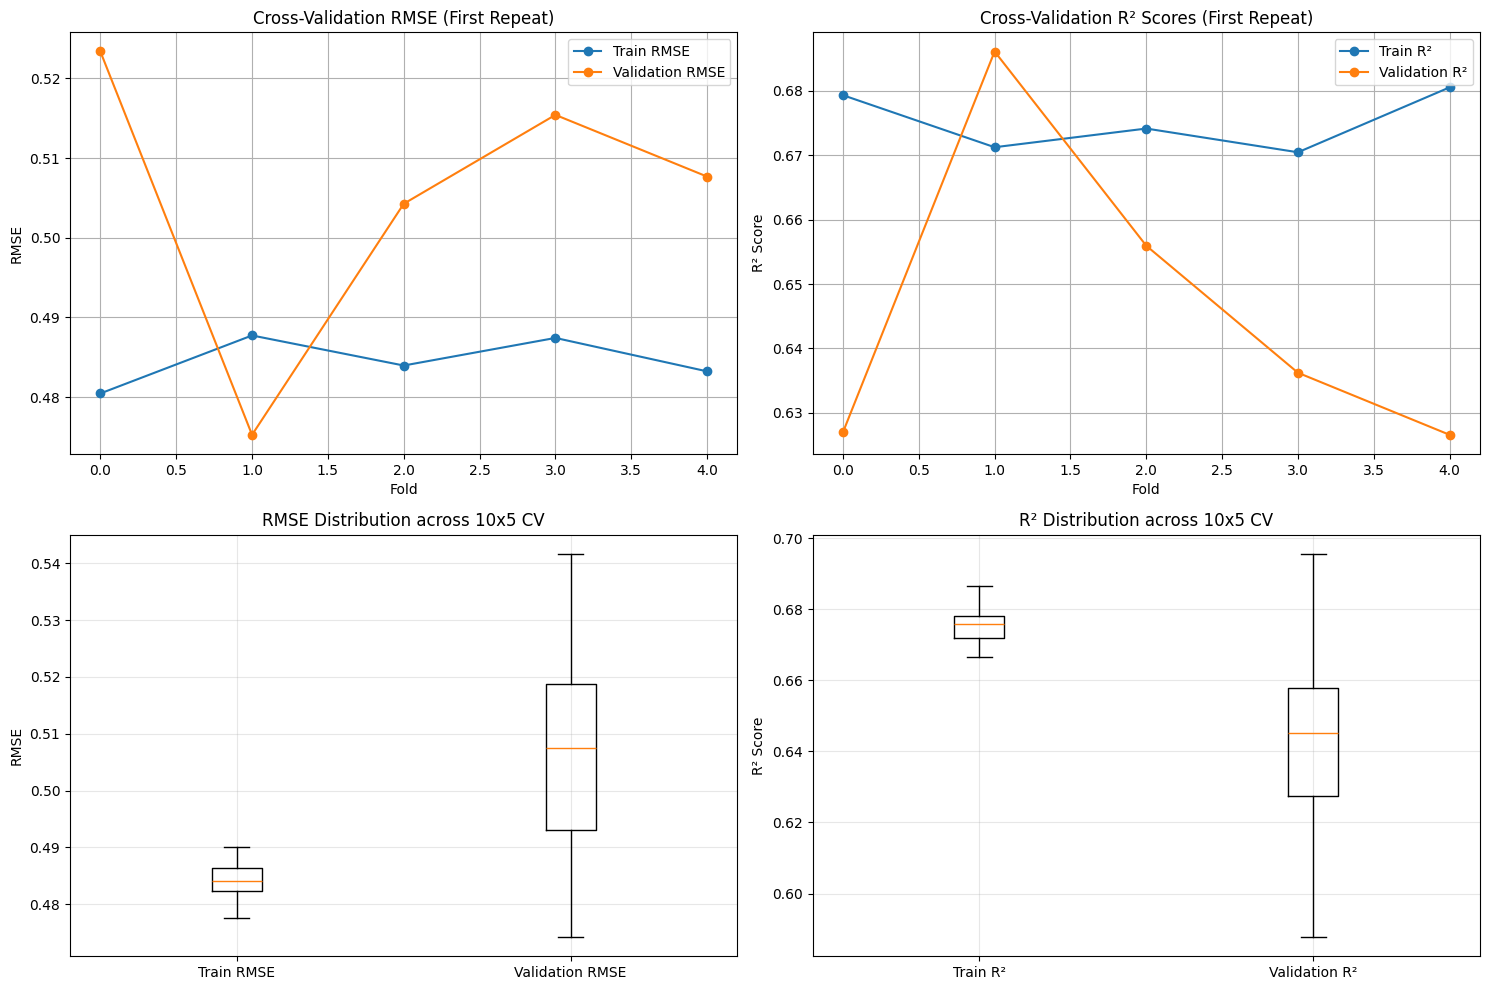


=== 10x5 Cross-Validation Summary ===
Average Train RMSE: 0.4843 (±0.0031)
Average Validation RMSE: 0.5061 (±0.0178)
Average Train R²: 0.6754 (±0.0044)
Average Validation R²: 0.6448 (±0.0238)
Average Best Iterations: 498.1 (±1.5)

=== 交叉验证结果 (旧格式兼容) ===
平均训练RMSE: 0.4843 (±0.0031)
平均验证RMSE: 0.5061 (±0.0178)
平均训练R²: 0.6754 (±0.0044)
平均验证R²: 0.6448 (±0.0238)

Training final model with 498 rounds...
[0]	train-rmse:0.84384
[100]	train-rmse:0.58578
[200]	train-rmse:0.52781
[300]	train-rmse:0.50107
[400]	train-rmse:0.48558
[497]	train-rmse:0.47783

Plotting learning curves...


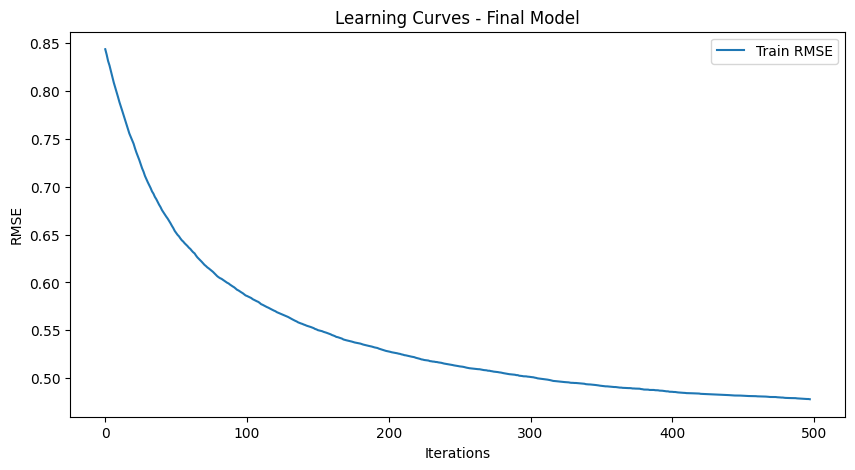


Evaluating final model...

=== Final Test Metrics ===
RMSE: 0.5460
R²: 0.6107
MAE: 0.3762

Plotting final model performance...


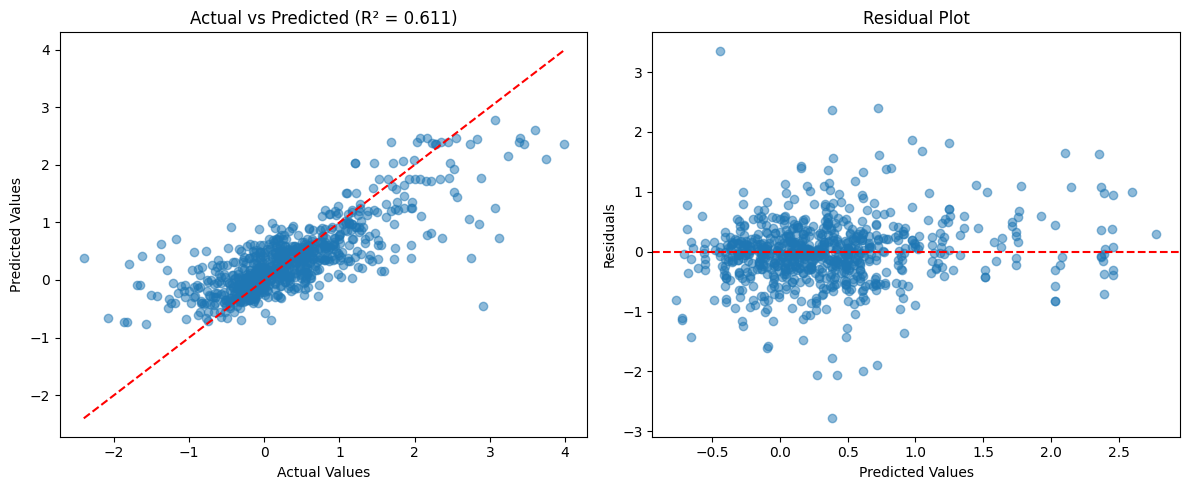


Analyzing LUtype feature importance...


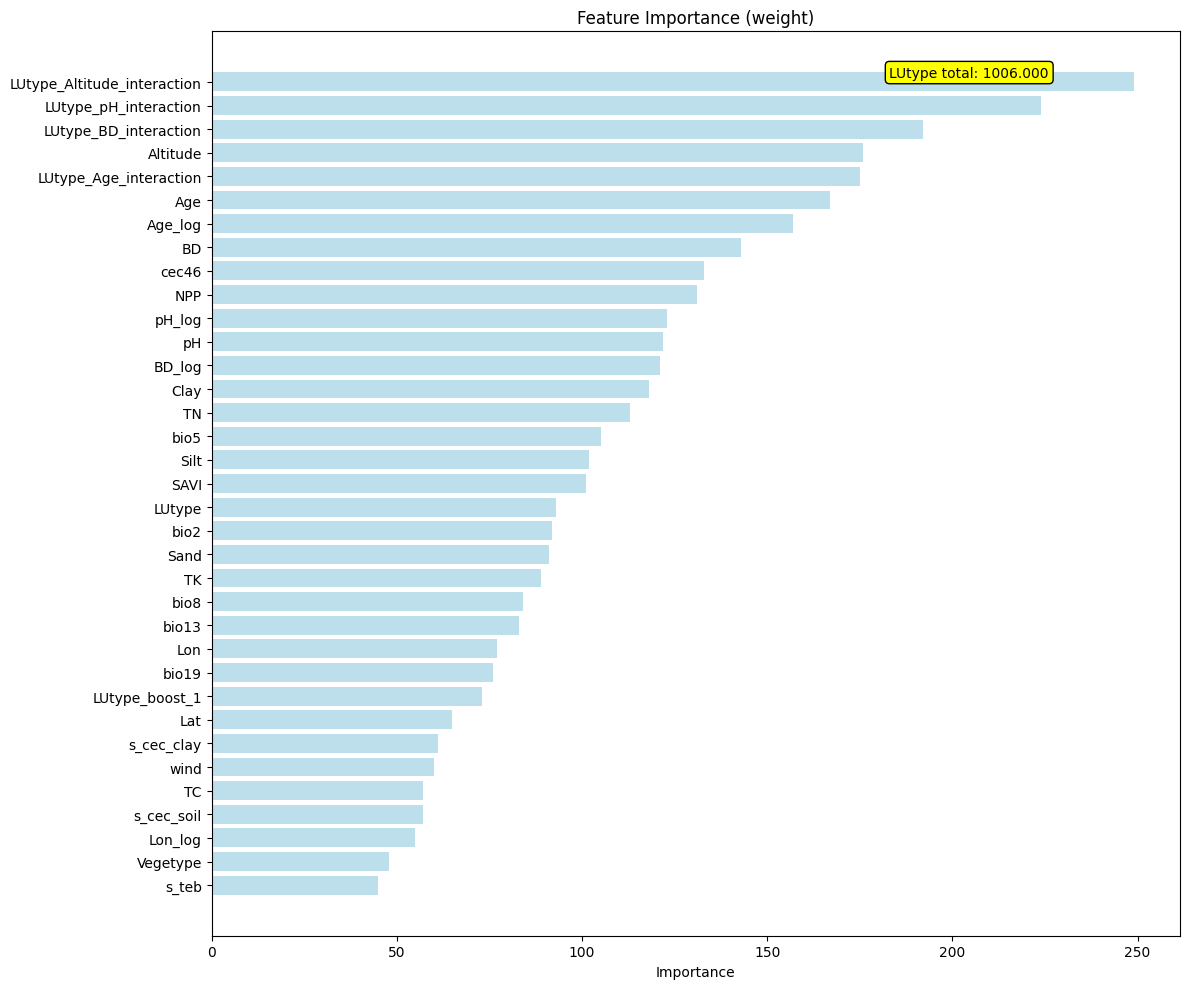


=== LUtype Feature Importance Analysis ===
Total LUtype-related features: 8
Total importance of LUtype features: 1056.000
Average importance of LUtype features: 132.000

LUtype importance percentage: 25.53%

Top LUtype-related features:
  LUtype_Altitude_interaction: 249.0000
  LUtype_pH_interaction: 224.0000
  LUtype_BD_interaction: 192.0000
  LUtype_Age_interaction: 175.0000
  LUtype: 93.0000
  LUtype_boost_1: 73.0000
  LUtype_boost_2: 26.0000
  LUtype_squared: 24.0000

Generating SHAP summary plot...


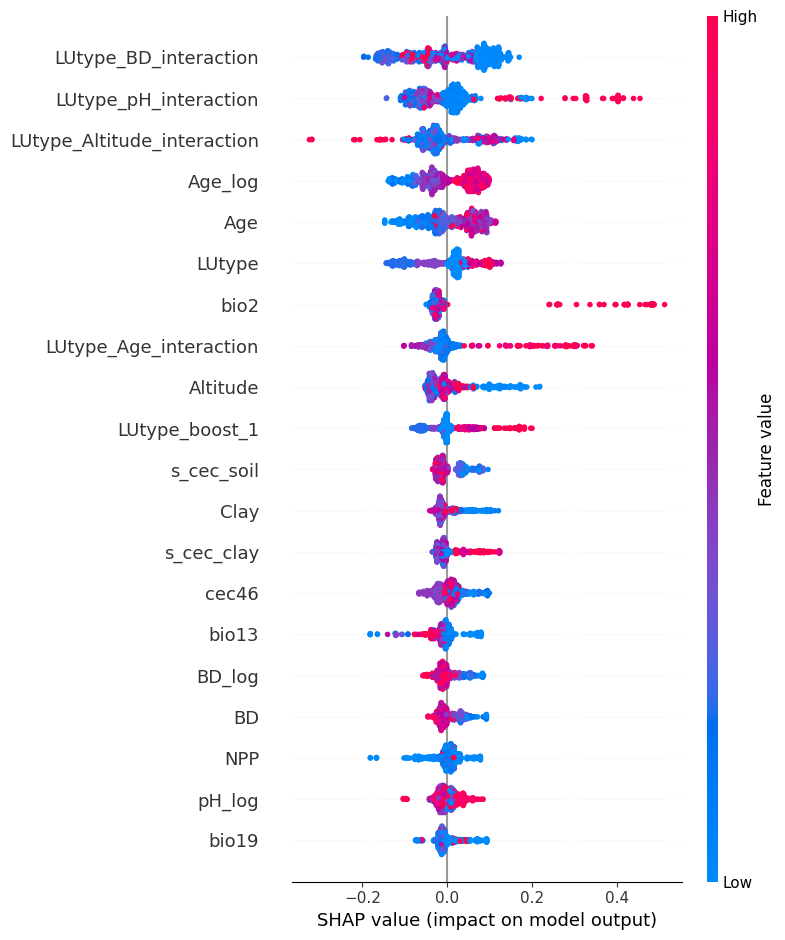

<Figure size 640x480 with 0 Axes>


Saving results...
Saved detailed CV results to: F:/model/results/cv_summary.csv

=== Model Training Summary ===
✓ Fixed data leakage issues
✓ Added outlier detection and handling
✓ Safe feature engineering (avoided data leakage)
✓ Created multiple LUtype feature copies
✓ Added LUtype interaction features with other important variables
✓ Added LUtype squared term (non-linear effect)
✓ Improved hyperparameter search space for better handling of categorical features
✓ Test set uses original data (no augmentation noise)
✓ Implemented 10 repetitions of 5-fold cross-validation for robust evaluation

=== Complete! ===


In [10]:
# modeling subsoil1201#
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import joblib
import os
import re
from pathlib import Path
import warnings
import builtins
from scipy import stats
open = builtins.open

warnings.filterwarnings('ignore')

# SHAP availability check
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

class XGBoostTuner:
    def __init__(self, seed=42, n_jobs=-1):
        self.seed = seed
        self.n_jobs = n_jobs if n_jobs != -1 else None
        self.study = None
        self.best_model = None
        self.best_params = None
        self.feature_names = None  # Store feature names

    @staticmethod
    def clean_numeric_value(value):
        """Convert string values to numeric, handling special cases"""
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            # Remove any non-numeric characters except minus, decimal point
            cleaned = re.sub(r'[^\d.-]', '', value)
            try:
                return float(cleaned) if cleaned else np.nan
            except ValueError:
                return np.nan
        return float(value)

    def objective(self, trial, dtrain, num_boost_round=500):
        """Objective function with enhanced regularization"""
        params = {
            'eta': trial.suggest_float('eta', 0.005, 0.1, log=True),  # Lower learning rate
            'max_depth': trial.suggest_int('max_depth', 2, 4),  # Shallower trees
            'subsample': trial.suggest_float('subsample', 0.4, 0.7),  # Lower subsampling
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.7),  # Lower feature sampling
            'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.4, 0.7),
            'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),  # Higher min child weight
            'lambda': trial.suggest_float('lambda', 10, 25.0),  # Stronger L2 regularization
            'alpha': trial.suggest_float('alpha', 5.0, 15.0),  # Stronger L1 regularization
            'gamma': trial.suggest_float('gamma', 0.5, 2.0),  # Higher pruning parameter
            'max_delta_step': trial.suggest_int('max_delta_step', 0, 1),
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'verbosity': 0,
            'seed': self.seed,
            'nthread': 1
        }

        cv_results = xgb.cv(
            params=params,
            dtrain=dtrain,
            num_boost_round=800,  # More rounds but more conservative early stopping
            nfold=5,
            metrics='rmse',
            early_stopping_rounds=25,  # More conservative early stopping
            as_pandas=True,
            seed=self.seed,
            shuffle=True
        )

        # Stronger overfitting penalty
        train_rmse = cv_results['train-rmse-mean'].iloc[-1]
        val_rmse = cv_results['test-rmse-mean'].iloc[-1]
        
        # Calculate overfitting degree
        overfitting_ratio = (train_rmse - val_rmse) / train_rmse
        gap_penalty = max(0, overfitting_ratio) * 0.3  # Stronger penalty
        
        # Add extra penalty if severe overfitting
        if overfitting_ratio > 0.1:
            gap_penalty += (overfitting_ratio - 0.1) * 0.5
            
        return val_rmse + gap_penalty
    
    def tune_hyperparameters(self, dtrain, n_trials=20):  # Increased number of trials
        """Hyperparameter tuning focused on generalization"""
        study = optuna.create_study(direction='minimize')
        
        print("Tuning hyperparameters with aggressive overfitting prevention...")
        print("Using very strong regularization and shallow trees")

        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            futures = [executor.submit(lambda: study.optimize(
                lambda trial: self.objective(trial, dtrain),
                n_trials=5,
                n_jobs=1
            )) for _ in range(n_trials//5)]

            for future in futures:
                future.result()

        self.study = study
        self.best_params = study.best_params
        self.best_params.update({
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'seed': self.seed,
            'nthread': self.n_jobs
        })

        print(f"Best parameters found: {self.best_params}")
        return self.best_params


    def train_model(self, params, dtrain, dvalid=None, num_boost_round=500):
        """Train model with focus on preventing overfitting"""
        evals = [(dtrain, 'train')]
        if dvalid is not None:
            evals.append((dvalid, 'valid'))

        evals_result = {}
        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=evals,
            early_stopping_rounds=25,  # More conservative early stopping
            verbose_eval=100,  # Reduced output frequency
            evals_result=evals_result
        )

        self.feature_names = dtrain.feature_names
        if self.feature_names is None:
            self.feature_names = [f'f{i}' for i in range(dtrain.num_col())]
            model.feature_names = self.feature_names

        return model, evals_result

    def cross_validate(self, params, X, y, n_splits=5, cv_models_dir='cv_models', n_repeats=10): 
        """Enhanced CV with 10 repetitions of 5-fold cross-validation and model saving"""
        Path(cv_models_dir).mkdir(parents=True, exist_ok=True)

        all_cv_results = {
            'train_rmse': [], 'val_rmse': [],
            'train_r2': [], 'val_r2': [],
            'best_iterations': [],
            'model_paths': [],
            'feature_names': [],
            'repeat': [],
            'fold': []
        }

        def process_fold(repeat_idx, fold_idx, train_idx, val_idx):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
            dval = xgb.DMatrix(X_val, label=y_val, feature_names=X_train.columns.tolist())

            model, _ = self.train_model(params, dtrain, dval)

            # Save the CV model
            model_path = os.path.join(cv_models_dir, f'cv_model_repeat_{repeat_idx}_fold_{fold_idx}.json')
            model.save_model(model_path)

            train_pred = model.predict(dtrain)
            val_pred = model.predict(dval)

            return (
                np.sqrt(mean_squared_error(y_train, train_pred)),
                np.sqrt(mean_squared_error(y_val, val_pred)),
                r2_score(y_train, train_pred),
                r2_score(y_val, val_pred),
                model.best_iteration if hasattr(model, 'best_iteration') else params.get('num_boost_round', 500),
                model_path,
                model.feature_names,
                repeat_idx,
                fold_idx
            )
        
        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            futures = []
            for repeat_idx in range(n_repeats):
                kf = KFold(n_splits=n_splits, shuffle=True, random_state=self.seed + repeat_idx)
                for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
                    futures.append(executor.submit(
                        process_fold, repeat_idx, fold_idx, train_idx, val_idx
                    ))

            for future in futures:
                train_rmse, val_rmse, train_r2, val_r2, best_iter, model_path, feature_names, repeat_idx, fold_idx = future.result()
                all_cv_results['train_rmse'].append(train_rmse)
                all_cv_results['val_rmse'].append(val_rmse)
                all_cv_results['train_r2'].append(train_r2)
                all_cv_results['val_r2'].append(val_r2)
                all_cv_results['best_iterations'].append(best_iter)
                all_cv_results['model_paths'].append(model_path)
                all_cv_results['feature_names'].append(feature_names)
                all_cv_results['repeat'].append(repeat_idx)
                all_cv_results['fold'].append(fold_idx)
        # Create summary statistics
        cv_results_summary = {
            'train_rmse_mean': np.mean(all_cv_results['train_rmse']),
            'train_rmse_std': np.std(all_cv_results['train_rmse']),
            'val_rmse_mean': np.mean(all_cv_results['val_rmse']),
            'val_rmse_std': np.std(all_cv_results['val_rmse']),
            'train_r2_mean': np.mean(all_cv_results['train_r2']),
            'train_r2_std': np.std(all_cv_results['train_r2']),
            'val_r2_mean': np.mean(all_cv_results['val_r2']),
            'val_r2_std': np.std(all_cv_results['val_r2']),
            'best_iterations_mean': np.mean(all_cv_results['best_iterations']),
            'best_iterations_std': np.std(all_cv_results['best_iterations']),
            'detailed_results': pd.DataFrame(all_cv_results)
        }

        return cv_results_summary

    def evaluate_model(self, model, dtest):
        """Evaluate model performance on test set"""
        test_pred = model.predict(dtest)
        return {
            'rmse': np.sqrt(mean_squared_error(dtest.get_label(), test_pred)),
            'r2': r2_score(dtest.get_label(), test_pred),
            'mae': mean_absolute_error(dtest.get_label(), test_pred)
        }, test_pred

    def plot_learning_curves(self, evals_result, title_suffix):
        """Plot training and validation metrics"""
        plt.figure(figsize=(10, 5))
        epochs = len(evals_result['train']['rmse'])
        plt.plot(range(epochs), evals_result['train']['rmse'], label='Train RMSE')
        if 'valid' in evals_result:
            plt.plot(range(epochs), evals_result['valid']['rmse'], label='Validation RMSE')
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title(f'Learning Curves - {title_suffix}')
        plt.show()

    def plot_cv_results(self, cv_results_summary):
        """Plot enhanced cross-validation results with both original and new visualization"""
        # Check if it's the new summary format or old list format
        if isinstance(cv_results_summary, dict) and 'detailed_results' in cv_results_summary:
            # New format - use the detailed results
            detailed_results = cv_results_summary['detailed_results']
            
            # Create two visualizations:
            # 1. Original visualization (simple line plot for first repeat)
            plt.figure(figsize=(15, 10))
            
            # Plot 1: Original style - first repeat only
            plt.subplot(2, 2, 1)
            first_repeat = detailed_results[detailed_results['repeat'] == 0]
            plt.plot(first_repeat['train_rmse'], 'o-', label='Train RMSE')
            plt.plot(first_repeat['val_rmse'], 'o-', label='Validation RMSE')
            plt.xlabel('Fold')
            plt.ylabel('RMSE')
            plt.title('Cross-Validation RMSE (First Repeat)')
            plt.legend()
            plt.grid(True)

            # Plot 2: Original style - first repeat R²
            plt.subplot(2, 2, 2)
            plt.plot(first_repeat['train_r2'], 'o-', label='Train R²')
            plt.plot(first_repeat['val_r2'], 'o-', label='Validation R²')
            plt.xlabel('Fold')
            plt.ylabel('R² Score')
            plt.title('Cross-Validation R² Scores (First Repeat)')
            plt.legend()
            plt.grid(True)

            # Plot 3: New visualization - RMSE distribution across all repeats
            plt.subplot(2, 2, 3)
            plt.boxplot([detailed_results['train_rmse'], detailed_results['val_rmse']], 
                       labels=['Train RMSE', 'Validation RMSE'])
            plt.ylabel('RMSE')
            plt.title('RMSE Distribution across 10x5 CV')
            plt.grid(True, alpha=0.3)
            
            # Plot 4: New visualization - R² distribution across all repeats
            plt.subplot(2, 2, 4)
            plt.boxplot([detailed_results['train_r2'], detailed_results['val_r2']], 
                       labels=['Train R²', 'Validation R²'])
            plt.ylabel('R² Score')
            plt.title('R² Distribution across 10x5 CV')
            plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()
            
            # Print summary statistics
            print("\n=== 10x5 Cross-Validation Summary ===")
            print(f"Average Train RMSE: {cv_results_summary['train_rmse_mean']:.4f} (±{cv_results_summary['train_rmse_std']:.4f})")
            print(f"Average Validation RMSE: {cv_results_summary['val_rmse_mean']:.4f} (±{cv_results_summary['val_rmse_std']:.4f})")
            print(f"Average Train R²: {cv_results_summary['train_r2_mean']:.4f} (±{cv_results_summary['train_r2_std']:.4f})")
            print(f"Average Validation R²: {cv_results_summary['val_r2_mean']:.4f} (±{cv_results_summary['val_r2_std']:.4f})")
            print(f"Average Best Iterations: {cv_results_summary['best_iterations_mean']:.1f} (±{cv_results_summary['best_iterations_std']:.1f})")
            
            # Also print the format that main() expects
            print("\n=== 交叉验证结果 (旧格式兼容) ===")
            print(f"平均训练RMSE: {cv_results_summary['train_rmse_mean']:.4f} (±{cv_results_summary['train_rmse_std']:.4f})")
            print(f"平均验证RMSE: {cv_results_summary['val_rmse_mean']:.4f} (±{cv_results_summary['val_rmse_std']:.4f})")
            print(f"平均训练R²: {cv_results_summary['train_r2_mean']:.4f} (±{cv_results_summary['train_r2_std']:.4f})")
            print(f"平均验证R²: {cv_results_summary['val_r2_mean']:.4f} (±{cv_results_summary['val_r2_std']:.4f})")
            
        else:
            # Old format - keep original plotting
            plt.figure(figsize=(15, 5))

            # Plot RMSE
            plt.subplot(1, 2, 1)
            plt.plot(cv_results_summary['train_rmse'], 'o-', label='Train RMSE')
            plt.plot(cv_results_summary['val_rmse'], 'o-', label='Validation RMSE')
            plt.xlabel('Fold')
            plt.ylabel('RMSE')
            plt.title('Cross-Validation RMSE')
            plt.legend()
            plt.grid(True)

            # Plot R2
            plt.subplot(1, 2, 2)
            plt.plot(cv_results_summary['train_r2'], 'o-', label='Train R²')
            plt.plot(cv_results_summary['val_r2'], 'o-', label='Validation R²')
            plt.xlabel('Fold')
            plt.ylabel('R² Score')
            plt.title('Cross-Validation R² Scores')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

    def plot_final_model_performance(self, model, dtest):
        """Plot actual vs predicted values for test set"""
        test_metrics, test_pred = self.evaluate_model(model, dtest)
        y_test = dtest.get_label()

        plt.figure(figsize=(12, 5))

        # Scatter plot of actual vs predicted
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, test_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted (R² = {test_metrics["r2"]:.3f})')

        # Residual plot
        plt.subplot(1, 2, 2)
        residuals = y_test - test_pred
        plt.scatter(test_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self, model, importance_type='weight', top_n=30):
        """Plot feature importance without category-specific highlighting"""
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # 获取特征重要性
        importance_dict = model.get_score(importance_type=importance_type)
        
        if not importance_dict:
            print("No feature importance data available.")
            return None
            
        # 转换为DataFrame以便排序
        importance_df = pd.DataFrame({
            'feature': list(importance_dict.keys()),
            'importance': list(importance_dict.values())
        }).sort_values('importance', ascending=True)
        
        # 只显示top_n特征
        if len(importance_df) > top_n:
            importance_df = importance_df.tail(top_n)
        
        # 绘制水平条形图
        y_pos = np.arange(len(importance_df))
        colors = ['lightblue'] * len(importance_df)
        
        ax.barh(y_pos, importance_df['importance'], color=colors, alpha=0.8)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(importance_df['feature'])
        ax.set_xlabel('Importance')
        
        title = f'Feature Importance ({importance_type})'
        ax.set_title(title)
        
        # 添加LUtype重要性说明
        lu_type_features = importance_df[importance_df['feature'].str.contains('LUtype', na=False)]
        lu_type_importance = lu_type_features['importance'].sum() if not lu_type_features.empty else 0
        
        ax.text(0.7, 0.95, f'LUtype total: {lu_type_importance:.3f}', 
                transform=ax.transAxes, fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
        
        plt.tight_layout()
        plt.show()
        
        return importance_df

    def analyze_lutype_importance(self, model, X):
        """分析LUtype相关特征的重要性，不关注特定类别"""
        importance_dict = model.get_score(importance_type='weight')
        
        if not importance_dict:
            print("No feature importance data available.")
            return
            
        # 分类统计不同特征
        lutype_features = {k: v for k, v in importance_dict.items() if 'LUtype' in k}
        other_features = {k: v for k, v in importance_dict.items() if 'LUtype' not in k}
        
        print(f"\n=== LUtype Feature Importance Analysis ===")
        print(f"Total LUtype-related features: {len(lutype_features)}")
        print(f"Total importance of LUtype features: {sum(lutype_features.values()):.3f}")
        print(f"Average importance of LUtype features: {np.mean(list(lutype_features.values())) if lutype_features else 0:.3f}")
        
        total_importance = sum(importance_dict.values())
        lu_type_percentage = (sum(lutype_features.values()) / total_importance * 100) if total_importance > 0 else 0
        
        print(f"\nLUtype importance percentage: {lu_type_percentage:.2f}%")
        
        # 打印最重要的LUtype特征
        if lutype_features:
            sorted_lutype = sorted(lutype_features.items(), key=lambda x: x[1], reverse=True)
            print(f"\nTop LUtype-related features:")
            for feature, importance in sorted_lutype[:10]:
                print(f"  {feature}: {importance:.4f}")
        else:
            print("\nNo LUtype-related features found in importance scores.")

    def plot_shap_summary(self, model, X, feature_names=None):
        """Generate SHAP summary plot if SHAP is available"""
        if SHAP_AVAILABLE:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)

            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values, X, feature_names=feature_names)
            plt.tight_layout()
            plt.show()
        else:
            print("SHAP not available. Install with: pip install shap")

    def save_results(self, model, output_dir='results'):
        """Save all results to disk including feature names"""
        Path(output_dir).mkdir(exist_ok=True)

        # Save model
        model.save_model(f'{output_dir}/xgb_model.json')

        # Save feature names
        if self.feature_names is not None:
            with open(f'{output_dir}/feature_names.txt', 'w') as f:
                f.write('\n'.join(self.feature_names))

        # Save other artifacts
        joblib.dump(self.best_params, f'{output_dir}/best_params.pkl')

        if self.study:
            joblib.dump(self.study, f'{output_dir}/study.pkl')
            study_df = self.study.trials_dataframe()
            study_df.to_csv(f'{output_dir}/trials.csv', index=False)

def detect_outliers_iqr(df, columns, threshold=1.5):
    """Detect outliers using IQR method"""
    outlier_indices = []
    
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.extend(outliers)
            
            if len(outliers) > 0:
                print(f"  {col}: Found {len(outliers)} outliers "
                      f"({len(outliers)/len(df)*100:.2f}%)")
    
    return list(set(outlier_indices))

def remove_outliers_robust(df, y, columns, method='iqr', threshold=2.0):
    """Robust outlier handling method"""
    print("Starting outlier detection...")
    
    if method == 'iqr':
        outlier_indices = detect_outliers_iqr(df, columns, threshold)
    elif method == 'zscore':
        # Z-score method
        z_scores = np.abs(stats.zscore(df[columns]))
        outlier_indices = np.where(z_scores > threshold)[0]
        outlier_indices = list(outlier_indices)
    else:
        return df, y, []
    
    print(f"\nTotal outliers found: {len(outlier_indices)}")
    
    if len(outlier_indices) > 0:
        df_clean = df.drop(outlier_indices)
        y_clean = y.drop(outlier_indices)
        print(f"Data size after removing outliers: {len(df_clean)} (removed {len(outlier_indices)} samples)")
        return df_clean, y_clean, outlier_indices
    
    print("No outliers found")
    return df, y, []

def check_data_leakage(X_train, X_test, y_train, y_test):
    """Check for data leakage"""
    print("\n=== Data Leakage Check ===")
    
    # Check for overlap between train and test sets
    train_indices = set(X_train.index)
    test_indices = set(X_test.index)
    overlap = train_indices.intersection(test_indices)
    
    if overlap:
        print(f"❌ Data leakage detected: {len(overlap)} overlapping samples between train and test sets")
    else:
        print("✅ No overlap between train and test sets")
    
    # Check feature distributions
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")
    
    return len(overlap) == 0

def safe_feature_engineering(X_train, X_test):
    """Safe feature engineering to avoid data leakage"""
    print("Performing safe feature engineering...")
    
    # 1. Logarithmic transformation
    columns_to_log = ['Lon', 'Lat', 'Age', 'BD', 'pH']
    for col in columns_to_log:
        if col in X_train.columns:
            X_train[col + '_log'] = np.log(X_train[col] + 1e-8)
            X_test[col + '_log'] = np.log(X_test[col] + 1e-8)
            print(f"  Created log feature: {col}_log")
    
    # 2. Binning (based on training set quantiles)
    if 'Altitude' in X_train.columns:
        # Use training set to compute bin boundaries
        alt_bins = pd.cut(X_train['Altitude'], bins=5, retbins=True)[1]
        X_train['Altitude_bins'] = pd.cut(X_train['Altitude'], bins=alt_bins, labels=False)
        X_test['Altitude_bins'] = pd.cut(X_test['Altitude'], bins=alt_bins, labels=False)
        print("  Created binned feature: Altitude_bins")
    
    return X_train, X_test

def augment_continuous_features(X, y, continuous_cols, augmentation_factor=2, noise_scale=0.01, random_state=42):
    """Augment continuous features with noise - only for training set"""
    np.random.seed(random_state)
    n_samples = len(X)
    n_augment = int(n_samples * augmentation_factor)

    X_augmented = X.copy()
    y_augmented = y.copy()

    for _ in range(n_augment):
        idx = np.random.randint(0, n_samples)
        base_sample = X.iloc[idx].copy()

        for col in continuous_cols:
            std = X[col].std()
            noise = np.random.normal(loc=0, scale=std * noise_scale)
            if X[col].min() >= 0:
                base_sample[col] = max(0, base_sample[col] + noise)
            else:
                base_sample[col] += noise

        X_augmented = X_augmented._append(base_sample, ignore_index=True)
        
        y_augmented = y_augmented._append(
            pd.Series(y.iloc[idx], index=[len(y_augmented)]),  
            ignore_index=True
        )

    return X_augmented, y_augmented

def enhanced_load_and_prepare_data(augment=True, augmentation_factor=2, 
                                 lu_type_importance_boost=3.0, 
                                 outlier_threshold=2.0):
    """Fixed data leakage version with outlier handling"""
    
    # Load data
    dtype_dict = {
        'Soillayer': 'int8',
        'yi': 'float32'
    }

    df_clean = pd.read_csv('F:/model/df.clean.yi.csv', dtype=dtype_dict)
    data_predictor_VIF = pd.read_csv('F:/model/data.predictor.VIF.yi.csv')

    # Select target soil layer
    target_layer = "subsoil" ###################################################################################SELECT LAYER
    df = df_clean[df_clean['Soillayer'] == (1 if target_layer == 'subsoil' else 2)].copy()

    # Select features
    predictor_columns = data_predictor_VIF['x'].tolist()
    valid_x_cols = [col for col in predictor_columns if col != "Soillayer" and col in df.columns]

    # Data cleaning
    for col in valid_x_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    X = df[valid_x_cols].astype('float32').fillna(0)
    y = df['yi'].astype('float32')

    print(f"Original data size: {len(X)}")
    
    # Outlier detection and handling
    continuous_cols = ['Lon', 'Lat', 'Age', 'BD', 'pH', 'Altitude']
    continuous_cols = [col for col in continuous_cols if col in X.columns]
    
    print("\n=== Outlier Handling ===")
    X_clean, y_clean, outliers = remove_outliers_robust(
        X, y, continuous_cols, threshold=outlier_threshold
    )

    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.3, random_state=42
    )

    # Safe feature engineering
    X_train, X_test = safe_feature_engineering(X_train, X_test)

    # Data leakage check
    check_data_leakage(X_train, X_test, y_train, y_test)

    # LUtype feature enhancement (only for training set)
    if 'LUtype' in X_train.columns:
        print(f"\n=== LUtype Feature Enhancement ===")
        print(f"Original LUtype distribution:")
        print(X_train['LUtype'].value_counts().sort_index())
        
        print(f"\nEnhancing LUtype importance with factor: {lu_type_importance_boost}")
        
        # Create LUtype feature enhancements
        for i in range(int(lu_type_importance_boost) - 1):
            lu_type_col_name = f'LUtype_boost_{i+1}'
            X_train[lu_type_col_name] = X_train['LUtype']
            X_test[lu_type_col_name] = X_test['LUtype']
            print(f"  Created LUtype copy: {lu_type_col_name}")
        
        # Create interaction terms between LUtype and other important features
        important_features = ['pH', 'BD', 'Age', 'Altitude']
        for feature in important_features:
            if feature in X_train.columns:
                interaction_name = f'LUtype_{feature}_interaction'
                X_train[interaction_name] = X_train['LUtype'] * X_train[feature]
                X_test[interaction_name] = X_test['LUtype'] * X_test[feature]
                print(f"  Created interaction feature: {interaction_name}")
        
        # Create LUtype squared term (non-linear effect)
        X_train['LUtype_squared'] = X_train['LUtype'] ** 2
        X_test['LUtype_squared'] = X_test['LUtype'] ** 2
        print("  Created LUtype_squared")
    
    # Data augmentation (only for training set)
    if augment:
        continuous_cols = [
            'Lon', 'Lat', 'Age', 'BD', 'pH',
            'Lon_log', 'Lat_log', 'Age_log', 'BD_log', 'pH_log',
            'Altitude'
        ]
        continuous_cols = [col for col in continuous_cols if col in X_train.columns]
        
        print(f"\n=== Data Augmentation ===")
        print(f"Training set size before augmentation: {len(X_train)}")
        X_train, y_train = augment_continuous_features(
            X=X_train,  # Only augment training set
            y=y_train,  # Only augment training set
            continuous_cols=continuous_cols,
            augmentation_factor=augmentation_factor,
            noise_scale=0.01,  
            random_state=42
        )
        print(f"Training set size after augmentation: {len(X_train)}")
    else:
        print("\nSkipping data augmentation")

    print(f"\n=== Final Dataset Statistics ===")
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Total number of features: {len(X_train.columns)}")
    
    # Statistical feature distribution
    lu_type_cols = [col for col in X_train.columns if 'LUtype' in col]
    
    print(f"\nFeature statistics:")
    print(f"LUtype-related features: {len(lu_type_cols)}")

    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_train.columns.tolist())

    return dtrain, dtest, X, y, X_test, y_test, X_train, y_train

def main():
    """Main function with data leakage prevention"""
    outlier_threshold = 2.0  # Outlier detection threshold
    
    print("=== Starting Enhanced XGBoost Modeling (Fixed Data Leakage Version) ===")
    
    # Use fixed data processing (with outlier handling and data leakage prevention)
    dtrain, dtest, x1, y1, X_test, y_test, X_train, y_train = enhanced_load_and_prepare_data(
        augment=True,
        augmentation_factor=3,
        lu_type_importance_boost=3.0,
        outlier_threshold=outlier_threshold
    )

    tuner = XGBoostTuner(seed=42, n_jobs=17)

    # 1. Hyperparameter tuning
    print("\n=== Starting Hyperparameter Tuning ===")
    best_params = tuner.tune_hyperparameters(dtrain, n_trials=10)
    print(f"Best parameters: {best_params}")

    # 2. Enhanced Cross-validation with 10x5 folds and model saving
    print("\n=== Starting 10x5 Cross-Validation ===")
    cv_results_summary = tuner.cross_validate(best_params, X_train, y_train, n_splits=5,
                                              cv_models_dir='F:/model/results/cv_models',
                                              n_repeats=10)  # 10 repetitions of 5-fold CV
    
    print("\nSaved CV models:")
    for path in cv_results_summary['detailed_results']['model_paths'][:5]:  # Show first 5
        print(f"- {path}")
    print(f"... and {len(cv_results_summary['detailed_results']['model_paths']) - 5} more")
    
    # Plot enhanced CV results
    print("\nPlotting enhanced cross-validation results...")
    tuner.plot_cv_results(cv_results_summary)

    # 3. Train final model
    optimal_rounds = int(cv_results_summary['best_iterations_mean'])
    print(f"\nTraining final model with {optimal_rounds} rounds...")
    final_model, evals_result = tuner.train_model(best_params, dtrain, num_boost_round=optimal_rounds)

    # Plot learning curves
    print("\nPlotting learning curves...")
    tuner.plot_learning_curves(evals_result, "Final Model")

    # 4. Evaluate and plot final performance
    print("\nEvaluating final model...")
    test_metrics, _ = tuner.evaluate_model(final_model, dtest)
    print("\n=== Final Test Metrics ===")
    print(f"RMSE: {test_metrics['rmse']:.4f}")
    print(f"R²: {test_metrics['r2']:.4f}")
    print(f"MAE: {test_metrics['mae']:.4f}")

    print("\nPlotting final model performance...")
    tuner.plot_final_model_performance(final_model, dtest)

    # 5. Analyze LUtype importance
    print(f"\nAnalyzing LUtype feature importance...")
    importance_df = tuner.plot_feature_importance(final_model, top_n=35)
    
    # Detailed analysis of LUtype importance
    tuner.analyze_lutype_importance(final_model, X_test)
    
    # 6. SHAP analysis
    if SHAP_AVAILABLE:
        print("\nGenerating SHAP summary plot...")
        tuner.plot_shap_summary(final_model, X_test)
        
    # 7. Save results
    print("\nSaving results...")
    tuner.save_results(final_model, 'F:/model/results')
    
    # Save CV results summary
    cv_summary_path = 'F:/model/results/cv_summary.csv'
    cv_results_summary['detailed_results'].to_csv(cv_summary_path, index=False)
    print(f"Saved detailed CV results to: {cv_summary_path}")
    
    print(f"\n=== Model Training Summary ===")
    print("✓ Fixed data leakage issues")
    print("✓ Added outlier detection and handling")
    print("✓ Safe feature engineering (avoided data leakage)")
    print("✓ Created multiple LUtype feature copies")
    print("✓ Added LUtype interaction features with other important variables")
    print("✓ Added LUtype squared term (non-linear effect)")
    print("✓ Improved hyperparameter search space for better handling of categorical features")
    print("✓ Test set uses original data (no augmentation noise)")
    print("✓ Implemented 10 repetitions of 5-fold cross-validation for robust evaluation")
    
    print("\n=== Complete! ===")

if __name__ == "__main__":
    main()

=== Starting Enhanced XGBoost Modeling (Fixed Data Leakage Version) ===
Original data size: 9122

=== Outlier Handling ===
Starting outlier detection...
  Lon: Found 1665 outliers (18.25%)
  Lat: Found 308 outliers (3.38%)
  Age: Found 227 outliers (2.49%)
  BD: Found 304 outliers (3.33%)

Total outliers found: 1974
Data size after removing outliers: 7148 (removed 1974 samples)
Performing safe feature engineering...
  Created log feature: Lon_log
  Created log feature: Lat_log
  Created log feature: Age_log
  Created log feature: BD_log
  Created log feature: pH_log
  Created binned feature: Altitude_bins

=== Data Leakage Check ===
✅ No overlap between train and test sets
Training set size: 5003
Test set size: 2145
Number of features: 39

=== LUtype Feature Enhancement ===
Original LUtype distribution:
LUtype
1.0    2239
2.0     975
3.0     438
4.0     379
5.0     600
6.0     175
7.0     197
Name: count, dtype: int64

Enhancing LUtype importance with factor: 3.0
  Created LUtype copy:

[I 2025-12-14 14:18:10,569] A new study created in memory with name: no-name-4780cc76-41ca-43fe-b710-d7adf201b4cc


Training set size after augmentation: 20012

=== Final Dataset Statistics ===
Training set size: 20012
Test set size: 2145
Total number of features: 46

Feature statistics:
LUtype-related features: 8

=== Starting Hyperparameter Tuning ===
Tuning hyperparameters with aggressive overfitting prevention...
Using very strong regularization and shallow trees


[I 2025-12-14 14:18:21,037] Trial 1 finished with value: 0.5477226436375162 and parameters: {'eta': 0.05730447394373429, 'max_depth': 3, 'subsample': 0.5813323770793206, 'colsample_bytree': 0.5247325412704427, 'colsample_bylevel': 0.5775468417843462, 'min_child_weight': 15, 'lambda': 19.69934997061124, 'alpha': 11.836482031754555, 'gamma': 1.6440942839570651, 'max_delta_step': 1}. Best is trial 1 with value: 0.5477226436375162.
[I 2025-12-14 14:18:21,738] Trial 0 finished with value: 0.6451134280200532 and parameters: {'eta': 0.008207887663656856, 'max_depth': 3, 'subsample': 0.5841577858536475, 'colsample_bytree': 0.5214657777745613, 'colsample_bylevel': 0.6845187106130362, 'min_child_weight': 16, 'lambda': 18.040567644734992, 'alpha': 13.404998479812381, 'gamma': 1.366228157227828, 'max_delta_step': 1}. Best is trial 1 with value: 0.5477226436375162.
[I 2025-12-14 14:18:31,253] Trial 2 finished with value: 0.5459960014288875 and parameters: {'eta': 0.07210479444977945, 'max_depth': 3

Best parameters found: {'eta': 0.05482514436235393, 'max_depth': 4, 'subsample': 0.5962918070568943, 'colsample_bytree': 0.5697369791268532, 'colsample_bylevel': 0.5443805723941101, 'min_child_weight': 14, 'lambda': 21.37952767586099, 'alpha': 11.152967349669677, 'gamma': 1.743287187263673, 'max_delta_step': 1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'nthread': 17}
Best parameters: {'eta': 0.05482514436235393, 'max_depth': 4, 'subsample': 0.5962918070568943, 'colsample_bytree': 0.5697369791268532, 'colsample_bylevel': 0.5443805723941101, 'min_child_weight': 14, 'lambda': 21.37952767586099, 'alpha': 11.152967349669677, 'gamma': 1.743287187263673, 'max_delta_step': 1, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'nthread': 17}

=== Starting 10x5 Cross-Validation ===
[0]	train-rmse:0.88689	valid-rmse:0.91181
[0]	train-rmse:0.88754	valid-rmse:0.90285
[0]	train-rmse:0.89319	valid-rmse:0.88559
[0]	train-rmse:0.89212	valid-rmse:0.88477
[0]	tr

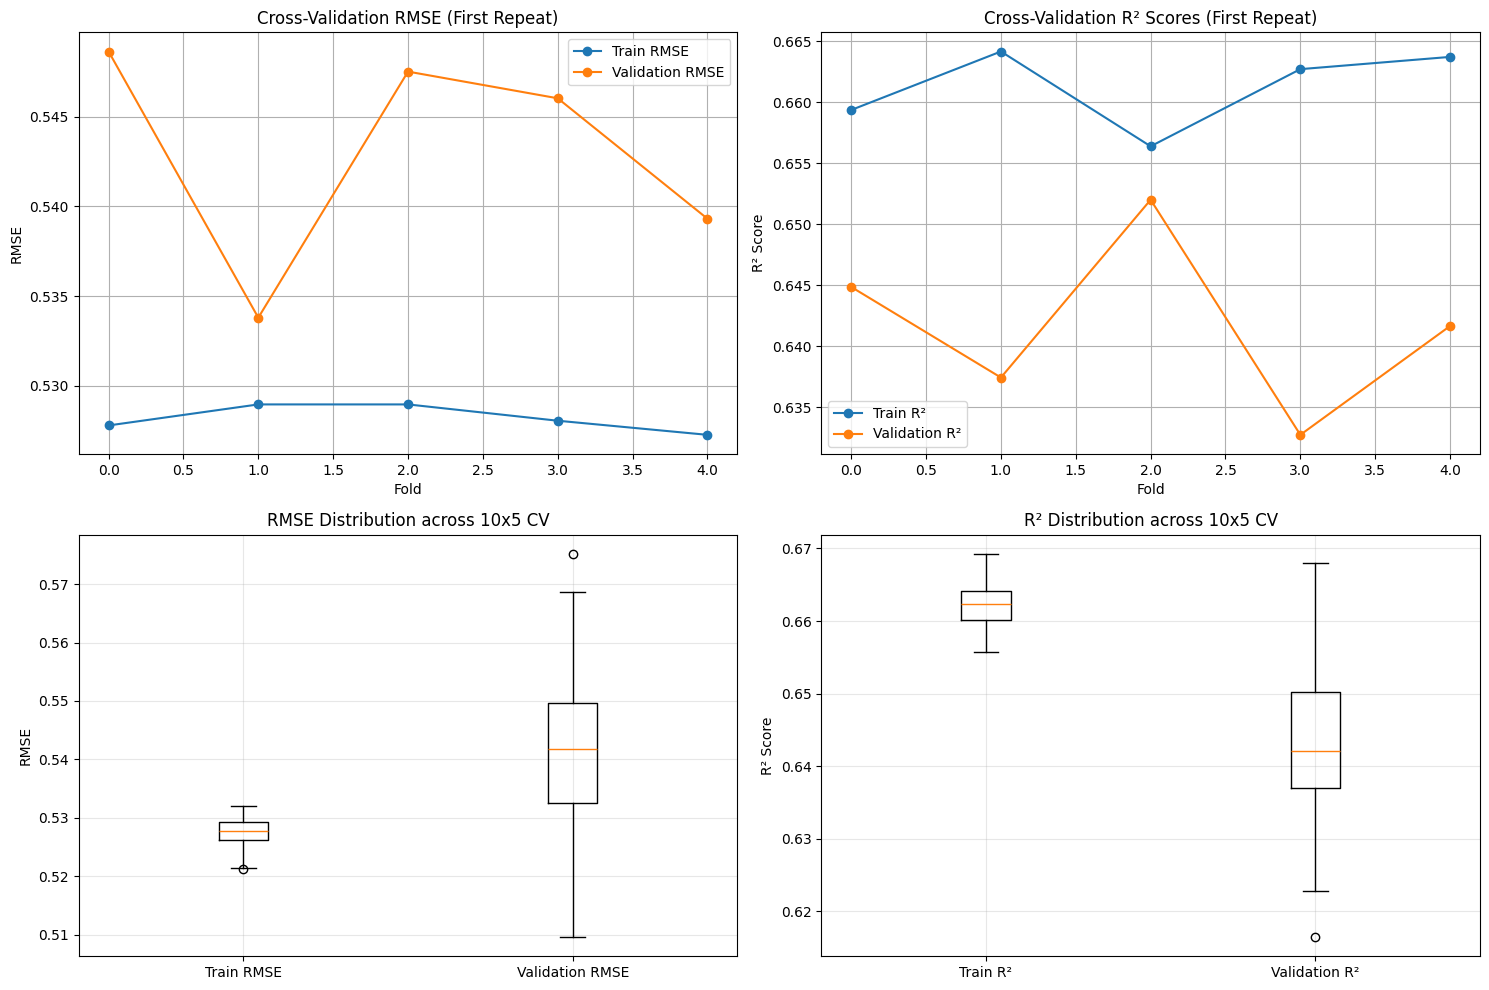


=== 10x5 Cross-Validation Summary ===
Average Train RMSE: 0.5275 (±0.0025)
Average Validation RMSE: 0.5422 (±0.0135)
Average Train R²: 0.6622 (±0.0031)
Average Validation R²: 0.6429 (±0.0102)
Average Best Iterations: 497.3 (±2.6)

=== 交叉验证结果 (旧格式兼容) ===
平均训练RMSE: 0.5275 (±0.0025)
平均验证RMSE: 0.5422 (±0.0135)
平均训练R²: 0.6622 (±0.0031)
平均验证R²: 0.6429 (±0.0102)

Training final model with 497 rounds...
[0]	train-rmse:0.89083
[100]	train-rmse:0.60074
[200]	train-rmse:0.55684
[300]	train-rmse:0.53509
[400]	train-rmse:0.52620
[496]	train-rmse:0.52236

Plotting learning curves...


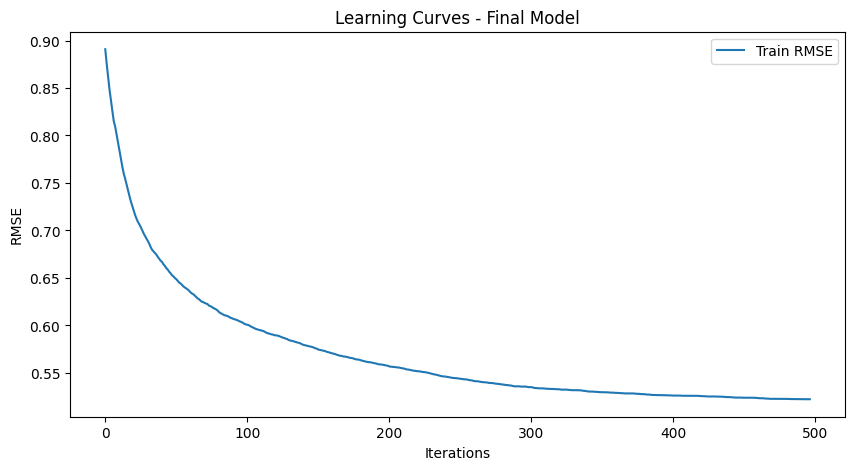


Evaluating final model...

=== Final Test Metrics ===
RMSE: 0.5820
R²: 0.5685
MAE: 0.3982

Plotting final model performance...


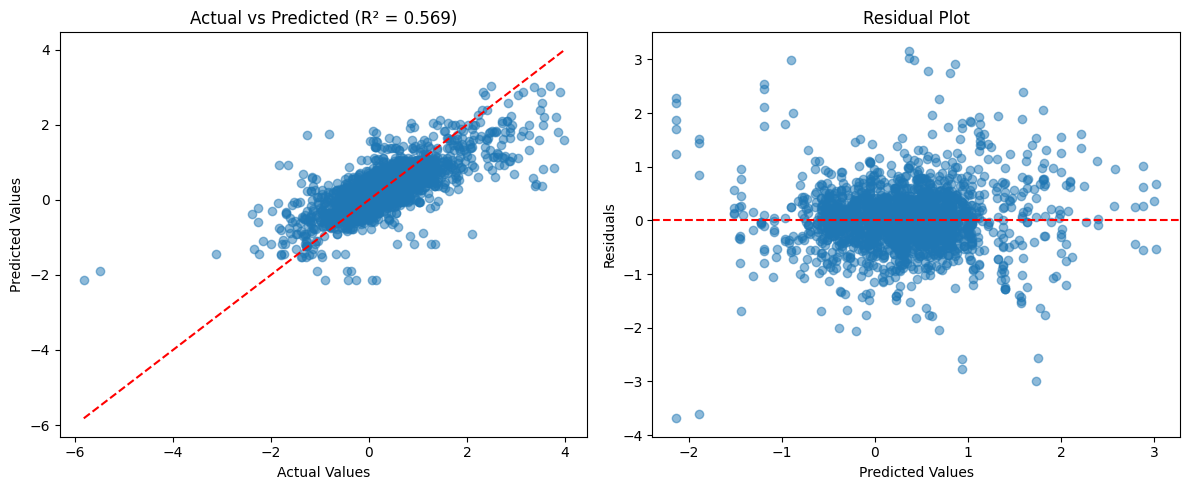


Analyzing LUtype feature importance...


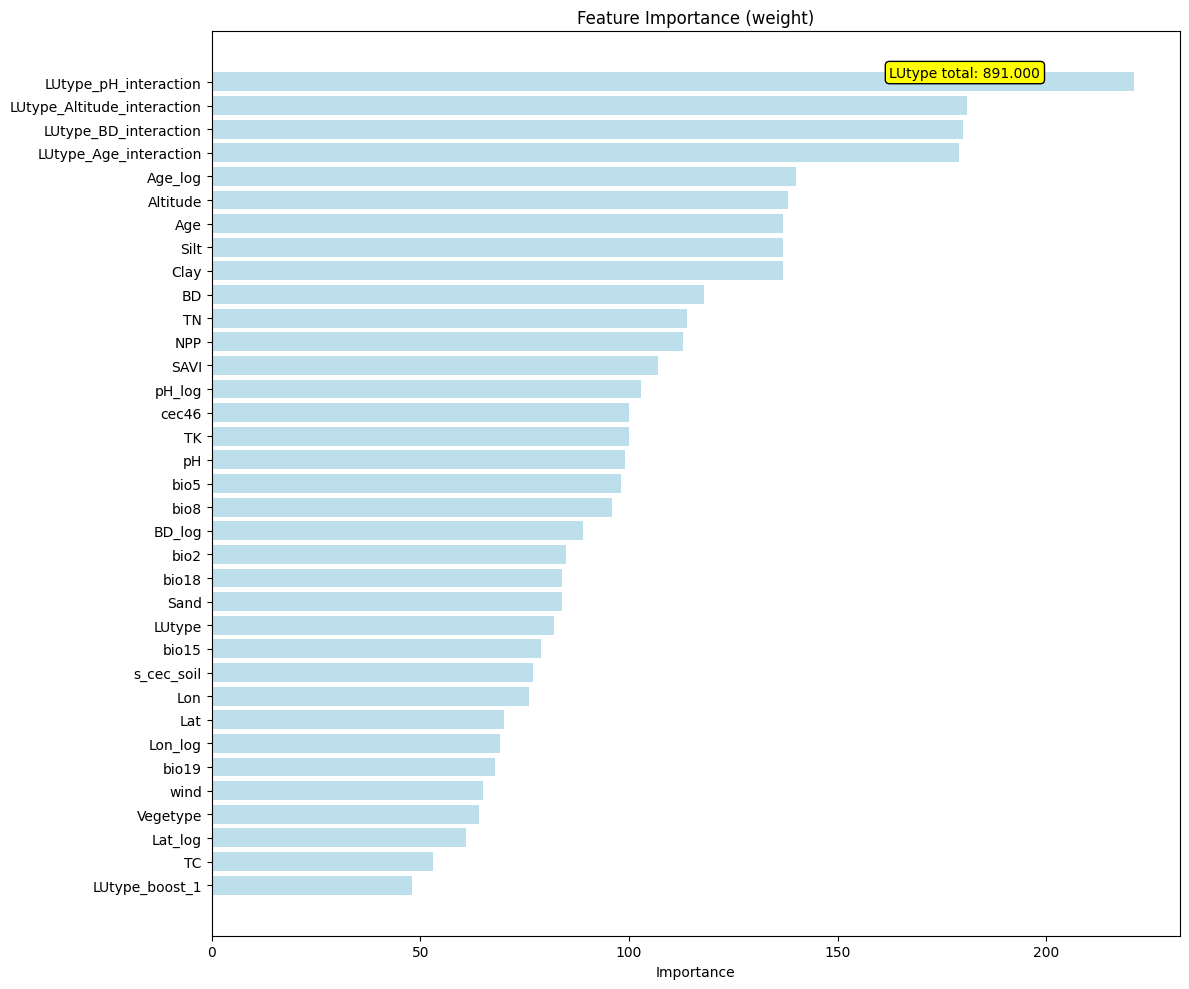


=== LUtype Feature Importance Analysis ===
Total LUtype-related features: 8
Total importance of LUtype features: 953.000
Average importance of LUtype features: 119.125

LUtype importance percentage: 23.95%

Top LUtype-related features:
  LUtype_pH_interaction: 221.0000
  LUtype_Altitude_interaction: 181.0000
  LUtype_BD_interaction: 180.0000
  LUtype_Age_interaction: 179.0000
  LUtype: 82.0000
  LUtype_boost_1: 48.0000
  LUtype_boost_2: 47.0000
  LUtype_squared: 15.0000

Generating SHAP summary plot...


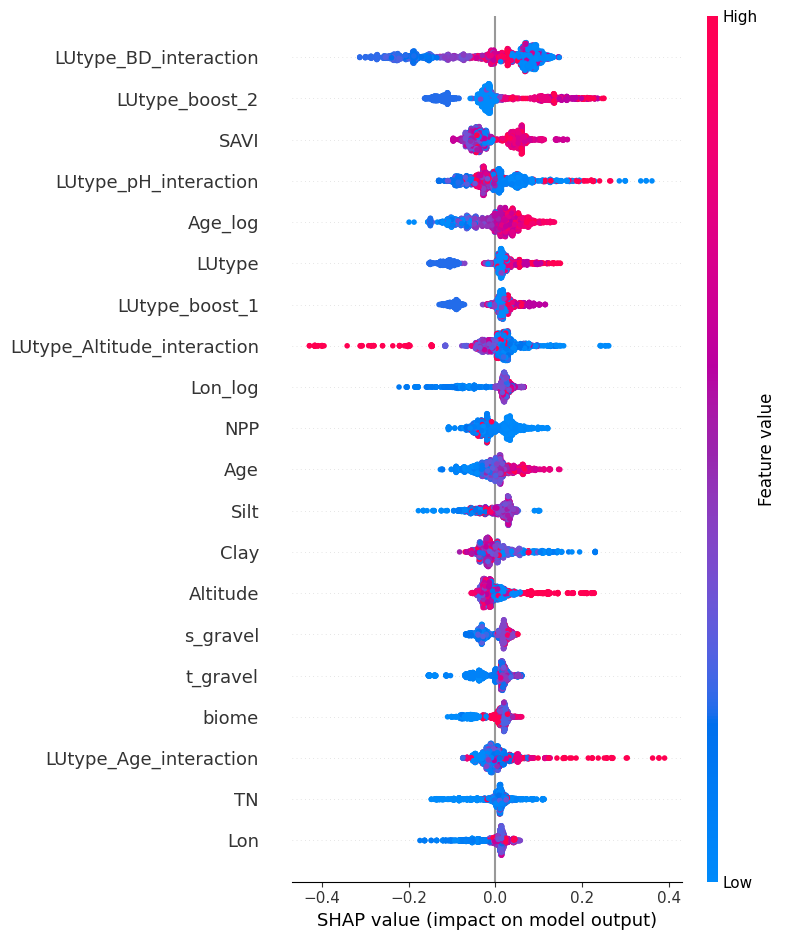

<Figure size 640x480 with 0 Axes>


Saving results...
Saved detailed CV results to: F:/model/results/cv_summary.csv

=== Model Training Summary ===
✓ Fixed data leakage issues
✓ Added outlier detection and handling
✓ Safe feature engineering (avoided data leakage)
✓ Created multiple LUtype feature copies
✓ Added LUtype interaction features with other important variables
✓ Added LUtype squared term (non-linear effect)
✓ Improved hyperparameter search space for better handling of categorical features
✓ Test set uses original data (no augmentation noise)
✓ Implemented 10 repetitions of 5-fold cross-validation for robust evaluation

=== Complete! ===


In [2]:
# modeling topsoil1201#
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import joblib
import os
import re
from pathlib import Path
import warnings
import builtins
from scipy import stats
open = builtins.open

warnings.filterwarnings('ignore')

# SHAP availability check
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

class XGBoostTuner:
    def __init__(self, seed=42, n_jobs=-1):
        self.seed = seed
        self.n_jobs = n_jobs if n_jobs != -1 else None
        self.study = None
        self.best_model = None
        self.best_params = None
        self.feature_names = None  # Store feature names

    @staticmethod
    def clean_numeric_value(value):
        """Convert string values to numeric, handling special cases"""
        if pd.isna(value):
            return np.nan
        if isinstance(value, str):
            # Remove any non-numeric characters except minus, decimal point
            cleaned = re.sub(r'[^\d.-]', '', value)
            try:
                return float(cleaned) if cleaned else np.nan
            except ValueError:
                return np.nan
        return float(value)

    def objective(self, trial, dtrain, num_boost_round=500):
        """Objective function with enhanced regularization"""
        params = {
            'eta': trial.suggest_float('eta', 0.005, 0.1, log=True),  # Lower learning rate
            'max_depth': trial.suggest_int('max_depth', 2, 4),  # Shallower trees
            'subsample': trial.suggest_float('subsample', 0.4, 0.7),  # Lower subsampling
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.7),  # Lower feature sampling
            'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.4, 0.7),
            'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),  # Higher min child weight
            'lambda': trial.suggest_float('lambda', 10, 25.0),  # Stronger L2 regularization
            'alpha': trial.suggest_float('alpha', 5.0, 15.0),  # Stronger L1 regularization
            'gamma': trial.suggest_float('gamma', 0.5, 2.0),  # Higher pruning parameter
            'max_delta_step': trial.suggest_int('max_delta_step', 0, 1),
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'verbosity': 0,
            'seed': self.seed,
            'nthread': 1
        }

        cv_results = xgb.cv(
            params=params,
            dtrain=dtrain,
            num_boost_round=800,  # More rounds but more conservative early stopping
            nfold=5,
            metrics='rmse',
            early_stopping_rounds=25,  # More conservative early stopping
            as_pandas=True,
            seed=self.seed,
            shuffle=True
        )

        # Stronger overfitting penalty
        train_rmse = cv_results['train-rmse-mean'].iloc[-1]
        val_rmse = cv_results['test-rmse-mean'].iloc[-1]
        
        # Calculate overfitting degree
        overfitting_ratio = (train_rmse - val_rmse) / train_rmse
        gap_penalty = max(0, overfitting_ratio) * 0.3  # Stronger penalty
        
        # Add extra penalty if severe overfitting
        if overfitting_ratio > 0.1:
            gap_penalty += (overfitting_ratio - 0.1) * 0.5
            
        return val_rmse + gap_penalty
    
    def tune_hyperparameters(self, dtrain, n_trials=20):  # Increased number of trials
        """Hyperparameter tuning focused on generalization"""
        study = optuna.create_study(direction='minimize')
        
        print("Tuning hyperparameters with aggressive overfitting prevention...")
        print("Using very strong regularization and shallow trees")

        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            futures = [executor.submit(lambda: study.optimize(
                lambda trial: self.objective(trial, dtrain),
                n_trials=5,
                n_jobs=1
            )) for _ in range(n_trials//5)]

            for future in futures:
                future.result()

        self.study = study
        self.best_params = study.best_params
        self.best_params.update({
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'seed': self.seed,
            'nthread': self.n_jobs
        })

        print(f"Best parameters found: {self.best_params}")
        return self.best_params


    def train_model(self, params, dtrain, dvalid=None, num_boost_round=500):
        """Train model with focus on preventing overfitting"""
        evals = [(dtrain, 'train')]
        if dvalid is not None:
            evals.append((dvalid, 'valid'))

        evals_result = {}
        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=evals,
            early_stopping_rounds=25,  # More conservative early stopping
            verbose_eval=100,  # Reduced output frequency
            evals_result=evals_result
        )

        self.feature_names = dtrain.feature_names
        if self.feature_names is None:
            self.feature_names = [f'f{i}' for i in range(dtrain.num_col())]
            model.feature_names = self.feature_names

        return model, evals_result

    def cross_validate(self, params, X, y, n_splits=5, cv_models_dir='cv_models', n_repeats=10): 
        """Enhanced CV with 10 repetitions of 5-fold cross-validation and model saving"""
        Path(cv_models_dir).mkdir(parents=True, exist_ok=True)

        all_cv_results = {
            'train_rmse': [], 'val_rmse': [],
            'train_r2': [], 'val_r2': [],
            'best_iterations': [],
            'model_paths': [],
            'feature_names': [],
            'repeat': [],
            'fold': []
        }

        def process_fold(repeat_idx, fold_idx, train_idx, val_idx):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
            dval = xgb.DMatrix(X_val, label=y_val, feature_names=X_train.columns.tolist())

            model, _ = self.train_model(params, dtrain, dval)

            # Save the CV model
            model_path = os.path.join(cv_models_dir, f'cv_model_repeat_{repeat_idx}_fold_{fold_idx}.json')
            model.save_model(model_path)

            train_pred = model.predict(dtrain)
            val_pred = model.predict(dval)

            return (
                np.sqrt(mean_squared_error(y_train, train_pred)),
                np.sqrt(mean_squared_error(y_val, val_pred)),
                r2_score(y_train, train_pred),
                r2_score(y_val, val_pred),
                model.best_iteration if hasattr(model, 'best_iteration') else params.get('num_boost_round', 500),
                model_path,
                model.feature_names,
                repeat_idx,
                fold_idx
            )
        
        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            futures = []
            for repeat_idx in range(n_repeats):
                kf = KFold(n_splits=n_splits, shuffle=True, random_state=self.seed + repeat_idx)
                for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
                    futures.append(executor.submit(
                        process_fold, repeat_idx, fold_idx, train_idx, val_idx
                    ))

            for future in futures:
                train_rmse, val_rmse, train_r2, val_r2, best_iter, model_path, feature_names, repeat_idx, fold_idx = future.result()
                all_cv_results['train_rmse'].append(train_rmse)
                all_cv_results['val_rmse'].append(val_rmse)
                all_cv_results['train_r2'].append(train_r2)
                all_cv_results['val_r2'].append(val_r2)
                all_cv_results['best_iterations'].append(best_iter)
                all_cv_results['model_paths'].append(model_path)
                all_cv_results['feature_names'].append(feature_names)
                all_cv_results['repeat'].append(repeat_idx)
                all_cv_results['fold'].append(fold_idx)
        # Create summary statistics
        cv_results_summary = {
            'train_rmse_mean': np.mean(all_cv_results['train_rmse']),
            'train_rmse_std': np.std(all_cv_results['train_rmse']),
            'val_rmse_mean': np.mean(all_cv_results['val_rmse']),
            'val_rmse_std': np.std(all_cv_results['val_rmse']),
            'train_r2_mean': np.mean(all_cv_results['train_r2']),
            'train_r2_std': np.std(all_cv_results['train_r2']),
            'val_r2_mean': np.mean(all_cv_results['val_r2']),
            'val_r2_std': np.std(all_cv_results['val_r2']),
            'best_iterations_mean': np.mean(all_cv_results['best_iterations']),
            'best_iterations_std': np.std(all_cv_results['best_iterations']),
            'detailed_results': pd.DataFrame(all_cv_results)
        }

        return cv_results_summary

    def evaluate_model(self, model, dtest):
        """Evaluate model performance on test set"""
        test_pred = model.predict(dtest)
        return {
            'rmse': np.sqrt(mean_squared_error(dtest.get_label(), test_pred)),
            'r2': r2_score(dtest.get_label(), test_pred),
            'mae': mean_absolute_error(dtest.get_label(), test_pred)
        }, test_pred

    def plot_learning_curves(self, evals_result, title_suffix):
        """Plot training and validation metrics"""
        plt.figure(figsize=(10, 5))
        epochs = len(evals_result['train']['rmse'])
        plt.plot(range(epochs), evals_result['train']['rmse'], label='Train RMSE')
        if 'valid' in evals_result:
            plt.plot(range(epochs), evals_result['valid']['rmse'], label='Validation RMSE')
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title(f'Learning Curves - {title_suffix}')
        plt.show()

    def plot_cv_results(self, cv_results_summary):
        """Plot enhanced cross-validation results with both original and new visualization"""
        # Check if it's the new summary format or old list format
        if isinstance(cv_results_summary, dict) and 'detailed_results' in cv_results_summary:
            # New format - use the detailed results
            detailed_results = cv_results_summary['detailed_results']
            
            # Create two visualizations:
            # 1. Original visualization (simple line plot for first repeat)
            plt.figure(figsize=(15, 10))
            
            # Plot 1: Original style - first repeat only
            plt.subplot(2, 2, 1)
            first_repeat = detailed_results[detailed_results['repeat'] == 0]
            plt.plot(first_repeat['train_rmse'], 'o-', label='Train RMSE')
            plt.plot(first_repeat['val_rmse'], 'o-', label='Validation RMSE')
            plt.xlabel('Fold')
            plt.ylabel('RMSE')
            plt.title('Cross-Validation RMSE (First Repeat)')
            plt.legend()
            plt.grid(True)

            # Plot 2: Original style - first repeat R²
            plt.subplot(2, 2, 2)
            plt.plot(first_repeat['train_r2'], 'o-', label='Train R²')
            plt.plot(first_repeat['val_r2'], 'o-', label='Validation R²')
            plt.xlabel('Fold')
            plt.ylabel('R² Score')
            plt.title('Cross-Validation R² Scores (First Repeat)')
            plt.legend()
            plt.grid(True)

            # Plot 3: New visualization - RMSE distribution across all repeats
            plt.subplot(2, 2, 3)
            plt.boxplot([detailed_results['train_rmse'], detailed_results['val_rmse']], 
                       labels=['Train RMSE', 'Validation RMSE'])
            plt.ylabel('RMSE')
            plt.title('RMSE Distribution across 10x5 CV')
            plt.grid(True, alpha=0.3)
            
            # Plot 4: New visualization - R² distribution across all repeats
            plt.subplot(2, 2, 4)
            plt.boxplot([detailed_results['train_r2'], detailed_results['val_r2']], 
                       labels=['Train R²', 'Validation R²'])
            plt.ylabel('R² Score')
            plt.title('R² Distribution across 10x5 CV')
            plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()
            
            # Print summary statistics
            print("\n=== 10x5 Cross-Validation Summary ===")
            print(f"Average Train RMSE: {cv_results_summary['train_rmse_mean']:.4f} (±{cv_results_summary['train_rmse_std']:.4f})")
            print(f"Average Validation RMSE: {cv_results_summary['val_rmse_mean']:.4f} (±{cv_results_summary['val_rmse_std']:.4f})")
            print(f"Average Train R²: {cv_results_summary['train_r2_mean']:.4f} (±{cv_results_summary['train_r2_std']:.4f})")
            print(f"Average Validation R²: {cv_results_summary['val_r2_mean']:.4f} (±{cv_results_summary['val_r2_std']:.4f})")
            print(f"Average Best Iterations: {cv_results_summary['best_iterations_mean']:.1f} (±{cv_results_summary['best_iterations_std']:.1f})")
            
            # Also print the format that main() expects
            print("\n=== 交叉验证结果 (旧格式兼容) ===")
            print(f"平均训练RMSE: {cv_results_summary['train_rmse_mean']:.4f} (±{cv_results_summary['train_rmse_std']:.4f})")
            print(f"平均验证RMSE: {cv_results_summary['val_rmse_mean']:.4f} (±{cv_results_summary['val_rmse_std']:.4f})")
            print(f"平均训练R²: {cv_results_summary['train_r2_mean']:.4f} (±{cv_results_summary['train_r2_std']:.4f})")
            print(f"平均验证R²: {cv_results_summary['val_r2_mean']:.4f} (±{cv_results_summary['val_r2_std']:.4f})")
            
        else:
            # Old format - keep original plotting
            plt.figure(figsize=(15, 5))

            # Plot RMSE
            plt.subplot(1, 2, 1)
            plt.plot(cv_results_summary['train_rmse'], 'o-', label='Train RMSE')
            plt.plot(cv_results_summary['val_rmse'], 'o-', label='Validation RMSE')
            plt.xlabel('Fold')
            plt.ylabel('RMSE')
            plt.title('Cross-Validation RMSE')
            plt.legend()
            plt.grid(True)

            # Plot R2
            plt.subplot(1, 2, 2)
            plt.plot(cv_results_summary['train_r2'], 'o-', label='Train R²')
            plt.plot(cv_results_summary['val_r2'], 'o-', label='Validation R²')
            plt.xlabel('Fold')
            plt.ylabel('R² Score')
            plt.title('Cross-Validation R² Scores')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

    def plot_final_model_performance(self, model, dtest):
        """Plot actual vs predicted values for test set"""
        test_metrics, test_pred = self.evaluate_model(model, dtest)
        y_test = dtest.get_label()

        plt.figure(figsize=(12, 5))

        # Scatter plot of actual vs predicted
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, test_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted (R² = {test_metrics["r2"]:.3f})')

        # Residual plot
        plt.subplot(1, 2, 2)
        residuals = y_test - test_pred
        plt.scatter(test_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self, model, importance_type='weight', top_n=30):
        """Plot feature importance without category-specific highlighting"""
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # 获取特征重要性
        importance_dict = model.get_score(importance_type=importance_type)
        
        if not importance_dict:
            print("No feature importance data available.")
            return None
            
        # 转换为DataFrame以便排序
        importance_df = pd.DataFrame({
            'feature': list(importance_dict.keys()),
            'importance': list(importance_dict.values())
        }).sort_values('importance', ascending=True)
        
        # 只显示top_n特征
        if len(importance_df) > top_n:
            importance_df = importance_df.tail(top_n)
        
        # 绘制水平条形图
        y_pos = np.arange(len(importance_df))
        colors = ['lightblue'] * len(importance_df)
        
        ax.barh(y_pos, importance_df['importance'], color=colors, alpha=0.8)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(importance_df['feature'])
        ax.set_xlabel('Importance')
        
        title = f'Feature Importance ({importance_type})'
        ax.set_title(title)
        
        # 添加LUtype重要性说明
        lu_type_features = importance_df[importance_df['feature'].str.contains('LUtype', na=False)]
        lu_type_importance = lu_type_features['importance'].sum() if not lu_type_features.empty else 0
        
        ax.text(0.7, 0.95, f'LUtype total: {lu_type_importance:.3f}', 
                transform=ax.transAxes, fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
        
        plt.tight_layout()
        plt.show()
        
        return importance_df

    def analyze_lutype_importance(self, model, X):
        """分析LUtype相关特征的重要性，不关注特定类别"""
        importance_dict = model.get_score(importance_type='weight')
        
        if not importance_dict:
            print("No feature importance data available.")
            return
            
        # 分类统计不同特征
        lutype_features = {k: v for k, v in importance_dict.items() if 'LUtype' in k}
        other_features = {k: v for k, v in importance_dict.items() if 'LUtype' not in k}
        
        print(f"\n=== LUtype Feature Importance Analysis ===")
        print(f"Total LUtype-related features: {len(lutype_features)}")
        print(f"Total importance of LUtype features: {sum(lutype_features.values()):.3f}")
        print(f"Average importance of LUtype features: {np.mean(list(lutype_features.values())) if lutype_features else 0:.3f}")
        
        total_importance = sum(importance_dict.values())
        lu_type_percentage = (sum(lutype_features.values()) / total_importance * 100) if total_importance > 0 else 0
        
        print(f"\nLUtype importance percentage: {lu_type_percentage:.2f}%")
        
        # 打印最重要的LUtype特征
        if lutype_features:
            sorted_lutype = sorted(lutype_features.items(), key=lambda x: x[1], reverse=True)
            print(f"\nTop LUtype-related features:")
            for feature, importance in sorted_lutype[:10]:
                print(f"  {feature}: {importance:.4f}")
        else:
            print("\nNo LUtype-related features found in importance scores.")

    def plot_shap_summary(self, model, X, feature_names=None):
        """Generate SHAP summary plot if SHAP is available"""
        if SHAP_AVAILABLE:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)

            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values, X, feature_names=feature_names)
            plt.tight_layout()
            plt.show()
        else:
            print("SHAP not available. Install with: pip install shap")

    def save_results(self, model, output_dir='results'):
        """Save all results to disk including feature names"""
        Path(output_dir).mkdir(exist_ok=True)

        # Save model
        model.save_model(f'{output_dir}/xgb_model.json')

        # Save feature names
        if self.feature_names is not None:
            with open(f'{output_dir}/feature_names.txt', 'w') as f:
                f.write('\n'.join(self.feature_names))

        # Save other artifacts
        joblib.dump(self.best_params, f'{output_dir}/best_params.pkl')

        if self.study:
            joblib.dump(self.study, f'{output_dir}/study.pkl')
            study_df = self.study.trials_dataframe()
            study_df.to_csv(f'{output_dir}/trials.csv', index=False)

def detect_outliers_iqr(df, columns, threshold=1.5):
    """Detect outliers using IQR method"""
    outlier_indices = []
    
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.extend(outliers)
            
            if len(outliers) > 0:
                print(f"  {col}: Found {len(outliers)} outliers "
                      f"({len(outliers)/len(df)*100:.2f}%)")
    
    return list(set(outlier_indices))

def remove_outliers_robust(df, y, columns, method='iqr', threshold=2.0):
    """Robust outlier handling method"""
    print("Starting outlier detection...")
    
    if method == 'iqr':
        outlier_indices = detect_outliers_iqr(df, columns, threshold)
    elif method == 'zscore':
        # Z-score method
        z_scores = np.abs(stats.zscore(df[columns]))
        outlier_indices = np.where(z_scores > threshold)[0]
        outlier_indices = list(outlier_indices)
    else:
        return df, y, []
    
    print(f"\nTotal outliers found: {len(outlier_indices)}")
    
    if len(outlier_indices) > 0:
        df_clean = df.drop(outlier_indices)
        y_clean = y.drop(outlier_indices)
        print(f"Data size after removing outliers: {len(df_clean)} (removed {len(outlier_indices)} samples)")
        return df_clean, y_clean, outlier_indices
    
    print("No outliers found")
    return df, y, []

def check_data_leakage(X_train, X_test, y_train, y_test):
    """Check for data leakage"""
    print("\n=== Data Leakage Check ===")
    
    # Check for overlap between train and test sets
    train_indices = set(X_train.index)
    test_indices = set(X_test.index)
    overlap = train_indices.intersection(test_indices)
    
    if overlap:
        print(f"❌ Data leakage detected: {len(overlap)} overlapping samples between train and test sets")
    else:
        print("✅ No overlap between train and test sets")
    
    # Check feature distributions
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Number of features: {X_train.shape[1]}")
    
    return len(overlap) == 0

def safe_feature_engineering(X_train, X_test):
    """Safe feature engineering to avoid data leakage"""
    print("Performing safe feature engineering...")
    
    # 1. Logarithmic transformation
    columns_to_log = ['Lon', 'Lat', 'Age', 'BD', 'pH']
    for col in columns_to_log:
        if col in X_train.columns:
            X_train[col + '_log'] = np.log(X_train[col] + 1e-8)
            X_test[col + '_log'] = np.log(X_test[col] + 1e-8)
            print(f"  Created log feature: {col}_log")
    
    # 2. Binning (based on training set quantiles)
    if 'Altitude' in X_train.columns:
        # Use training set to compute bin boundaries
        alt_bins = pd.cut(X_train['Altitude'], bins=5, retbins=True)[1]
        X_train['Altitude_bins'] = pd.cut(X_train['Altitude'], bins=alt_bins, labels=False)
        X_test['Altitude_bins'] = pd.cut(X_test['Altitude'], bins=alt_bins, labels=False)
        print("  Created binned feature: Altitude_bins")
    
    return X_train, X_test

def augment_continuous_features(X, y, continuous_cols, augmentation_factor=2, noise_scale=0.01, random_state=42):
    """Augment continuous features with noise - only for training set"""
    np.random.seed(random_state)
    n_samples = len(X)
    n_augment = int(n_samples * augmentation_factor)

    X_augmented = X.copy()
    y_augmented = y.copy()

    for _ in range(n_augment):
        idx = np.random.randint(0, n_samples)
        base_sample = X.iloc[idx].copy()

        for col in continuous_cols:
            std = X[col].std()
            noise = np.random.normal(loc=0, scale=std * noise_scale)
            if X[col].min() >= 0:
                base_sample[col] = max(0, base_sample[col] + noise)
            else:
                base_sample[col] += noise

        X_augmented = X_augmented._append(base_sample, ignore_index=True)
        
        y_augmented = y_augmented._append(
            pd.Series(y.iloc[idx], index=[len(y_augmented)]),  
            ignore_index=True
        )

    return X_augmented, y_augmented

def enhanced_load_and_prepare_data(augment=True, augmentation_factor=2, 
                                 lu_type_importance_boost=3.0, 
                                 outlier_threshold=2.0):
    """Fixed data leakage version with outlier handling"""
    
    # Load data
    dtype_dict = {
        'Soillayer': 'int8',
        'yi': 'float32'
    }

    df_clean = pd.read_csv('F:/model/df.clean.yi.csv', dtype=dtype_dict)
    data_predictor_VIF = pd.read_csv('F:/model/data.predictor.VIF.yi.csv')

    # Select target soil layer
    target_layer = "topsoil" ###################################################################################SELECT LAYER
    df = df_clean[df_clean['Soillayer'] == (1 if target_layer == 'topsoil' else 2)].copy()

    # Select features
    predictor_columns = data_predictor_VIF['x'].tolist()
    valid_x_cols = [col for col in predictor_columns if col != "Soillayer" and col in df.columns]

    # Data cleaning
    for col in valid_x_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    X = df[valid_x_cols].astype('float32').fillna(0)
    y = df['yi'].astype('float32')

    print(f"Original data size: {len(X)}")
    
    # Outlier detection and handling
    continuous_cols = ['Lon', 'Lat', 'Age', 'BD', 'pH', 'Altitude']
    continuous_cols = [col for col in continuous_cols if col in X.columns]
    
    print("\n=== Outlier Handling ===")
    X_clean, y_clean, outliers = remove_outliers_robust(
        X, y, continuous_cols, threshold=outlier_threshold
    )

    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.3, random_state=42
    )

    # Safe feature engineering
    X_train, X_test = safe_feature_engineering(X_train, X_test)

    # Data leakage check
    check_data_leakage(X_train, X_test, y_train, y_test)

    # LUtype feature enhancement (only for training set)
    if 'LUtype' in X_train.columns:
        print(f"\n=== LUtype Feature Enhancement ===")
        print(f"Original LUtype distribution:")
        print(X_train['LUtype'].value_counts().sort_index())
        
        print(f"\nEnhancing LUtype importance with factor: {lu_type_importance_boost}")
        
        # Create LUtype feature enhancements
        for i in range(int(lu_type_importance_boost) - 1):
            lu_type_col_name = f'LUtype_boost_{i+1}'
            X_train[lu_type_col_name] = X_train['LUtype']
            X_test[lu_type_col_name] = X_test['LUtype']
            print(f"  Created LUtype copy: {lu_type_col_name}")
        
        # Create interaction terms between LUtype and other important features
        important_features = ['pH', 'BD', 'Age', 'Altitude']
        for feature in important_features:
            if feature in X_train.columns:
                interaction_name = f'LUtype_{feature}_interaction'
                X_train[interaction_name] = X_train['LUtype'] * X_train[feature]
                X_test[interaction_name] = X_test['LUtype'] * X_test[feature]
                print(f"  Created interaction feature: {interaction_name}")
        
        # Create LUtype squared term (non-linear effect)
        X_train['LUtype_squared'] = X_train['LUtype'] ** 2
        X_test['LUtype_squared'] = X_test['LUtype'] ** 2
        print("  Created LUtype_squared")
    
    # Data augmentation (only for training set)
    if augment:
        continuous_cols = [
            'Lon', 'Lat', 'Age', 'BD', 'pH',
            'Lon_log', 'Lat_log', 'Age_log', 'BD_log', 'pH_log',
            'Altitude'
        ]
        continuous_cols = [col for col in continuous_cols if col in X_train.columns]
        
        print(f"\n=== Data Augmentation ===")
        print(f"Training set size before augmentation: {len(X_train)}")
        X_train, y_train = augment_continuous_features(
            X=X_train,  # Only augment training set
            y=y_train,  # Only augment training set
            continuous_cols=continuous_cols,
            augmentation_factor=augmentation_factor,
            noise_scale=0.01,  
            random_state=42
        )
        print(f"Training set size after augmentation: {len(X_train)}")
    else:
        print("\nSkipping data augmentation")

    print(f"\n=== Final Dataset Statistics ===")
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Total number of features: {len(X_train.columns)}")
    
    # Statistical feature distribution
    lu_type_cols = [col for col in X_train.columns if 'LUtype' in col]
    
    print(f"\nFeature statistics:")
    print(f"LUtype-related features: {len(lu_type_cols)}")

    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_train.columns.tolist())

    return dtrain, dtest, X, y, X_test, y_test, X_train, y_train

def main():
    """Main function with data leakage prevention"""
    outlier_threshold = 2.0  # Outlier detection threshold
    
    print("=== Starting Enhanced XGBoost Modeling (Fixed Data Leakage Version) ===")
    
    # Use fixed data processing (with outlier handling and data leakage prevention)
    dtrain, dtest, x1, y1, X_test, y_test, X_train, y_train = enhanced_load_and_prepare_data(
        augment=True,
        augmentation_factor=3,
        lu_type_importance_boost=3.0,
        outlier_threshold=outlier_threshold
    )

    tuner = XGBoostTuner(seed=42, n_jobs=17)

    # 1. Hyperparameter tuning
    print("\n=== Starting Hyperparameter Tuning ===")
    best_params = tuner.tune_hyperparameters(dtrain, n_trials=10)
    print(f"Best parameters: {best_params}")

    # 2. Enhanced Cross-validation with 10x5 folds and model saving
    print("\n=== Starting 10x5 Cross-Validation ===")
    cv_results_summary = tuner.cross_validate(best_params, X_train, y_train, n_splits=5,
                                              cv_models_dir='F:/model/results/cv_models',
                                              n_repeats=10)  # 10 repetitions of 5-fold CV
    
    print("\nSaved CV models:")
    for path in cv_results_summary['detailed_results']['model_paths'][:5]:  # Show first 5
        print(f"- {path}")
    print(f"... and {len(cv_results_summary['detailed_results']['model_paths']) - 5} more")
    
    # Plot enhanced CV results
    print("\nPlotting enhanced cross-validation results...")
    tuner.plot_cv_results(cv_results_summary)

    # 3. Train final model
    optimal_rounds = int(cv_results_summary['best_iterations_mean'])
    print(f"\nTraining final model with {optimal_rounds} rounds...")
    final_model, evals_result = tuner.train_model(best_params, dtrain, num_boost_round=optimal_rounds)

    # Plot learning curves
    print("\nPlotting learning curves...")
    tuner.plot_learning_curves(evals_result, "Final Model")

    # 4. Evaluate and plot final performance
    print("\nEvaluating final model...")
    test_metrics, _ = tuner.evaluate_model(final_model, dtest)
    print("\n=== Final Test Metrics ===")
    print(f"RMSE: {test_metrics['rmse']:.4f}")
    print(f"R²: {test_metrics['r2']:.4f}")
    print(f"MAE: {test_metrics['mae']:.4f}")

    print("\nPlotting final model performance...")
    tuner.plot_final_model_performance(final_model, dtest)

    # 5. Analyze LUtype importance
    print(f"\nAnalyzing LUtype feature importance...")
    importance_df = tuner.plot_feature_importance(final_model, top_n=35)
    
    # Detailed analysis of LUtype importance
    tuner.analyze_lutype_importance(final_model, X_test)
    
    # 6. SHAP analysis
    if SHAP_AVAILABLE:
        print("\nGenerating SHAP summary plot...")
        tuner.plot_shap_summary(final_model, X_test)
        
    # 7. Save results
    print("\nSaving results...")
    tuner.save_results(final_model, 'F:/model/results')
    
    # Save CV results summary
    cv_summary_path = 'F:/model/results/cv_summary.csv'
    cv_results_summary['detailed_results'].to_csv(cv_summary_path, index=False)
    print(f"Saved detailed CV results to: {cv_summary_path}")
    
    print(f"\n=== Model Training Summary ===")
    print("✓ Fixed data leakage issues")
    print("✓ Added outlier detection and handling")
    print("✓ Safe feature engineering (avoided data leakage)")
    print("✓ Created multiple LUtype feature copies")
    print("✓ Added LUtype interaction features with other important variables")
    print("✓ Added LUtype squared term (non-linear effect)")
    print("✓ Improved hyperparameter search space for better handling of categorical features")
    print("✓ Test set uses original data (no augmentation noise)")
    print("✓ Implemented 10 repetitions of 5-fold cross-validation for robust evaluation")
    
    print("\n=== Complete! ===")

if __name__ == "__main__":
    main()

In [3]:
# SOC topmapping
import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映“非OHE手动增强”
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/passive_top.tif'

TARGET_CARBON = "passive"
TARGET_LAYER = "topsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

# 移除 create_interaction_features 函数，因为它在非OHE模型中是错误的。


def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里的 base_mapping 应该包含 TIF 文件名(或CSV特征名) -> 模型特征名 的映射
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_bd': 'BD',
        't_ph': 'pH',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype'
    }

    # 统一特征名称
    # 这一步是为了处理 chunk_data 中可能存在的旧名称，确保模型特征名(model_feat)被创建
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[csv_feat]

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        # 尝试获取数组形状，如果不存在则返回空
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        # 类别特征（如LUtype）如果是整数 tif 存储的，这里 rint 是正确的
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    # 如果模型期望 Altitude_bins，但输入 TIFs 中没有，则必须在这里重新创建。
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        # 暂时只对非NaN值进行分箱，NaN值在后续的缺失值填充中处理
        altitude_data = chunk_data['Altitude']
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # 假设 Log 变换特征已作为独立 TIFs 加载，否则需要在这里创建（这里不重新创建，以免与输入TIF冲突）
    
    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    # 注意：这些特征的创建必须与训练代码中的逻辑完全一致！
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = chunk_data[feat]
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")

    # === 7. Fill missing features ===
    # 找到一个有效的数组来获取形状
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，否则 XGBoost 会失败
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    # 注意：这里检查的是模型特征名，而不是 TIF 文件名
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    # 使用四舍五入后的整数来统计类别
    # 这是一个很好的检查，确保 LUtype 是整数值
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    # Check missing values
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    # Start with all pixels being valid
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果一个关键特征在 chunk_data 中找不到，则将所有像素标记为不完整
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    # 这一步是为了确保加载 TIF 时，我们知道它对应的模型特征名是什么
    model_to_tif_map = {
        'BD': 't_bd', 'pH': 't_ph', 'Sand': 't_sand', 'TC': 't_oc', 'TN': 'TN13', 'TK': 'TK13', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    # 如果 feat 是 tif 文件名 (如 t_bd)，则将其映射回模型特征名 (如 BD)
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
        
        # 预测
        predictions = xgb_model.predict(dtest, validate_features=False)

        # Calculate global indices for this chunk
        global_start_idx = chunk_start * ref_shape[1]
        global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
        complete_global_indices = global_indices[complete_indices]
        
        # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
        y_idx = complete_global_indices // ref_shape[1]
        x_idx = complete_global_indices % ref_shape[1]
        
        # Store predictions only for complete pixels
        result_array[y_idx, x_idx] = predictions

        total_processed += len(predictions)
        print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/passive_top.tif
📂 Loading model feature names...
✅ Loaded 46 features from F:/model/results/feature_names.txt
📂 Loading select features from CSV...
📂 Loading reference layer (Altitude)...
🤖 Loading model...
📋 Model expected features count: 46

🔍 Processing row chunk 0-500
    📊 Analyzing LUtype data coverage...
    ⚠️ No valid LUtype data found!

🔍 Validating feature compatibility...
    ✅ All required base features for manual enhancement are available.
    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...
    ⚠️ LUtype all NaN! Derived features will be 0.
    🔄 Creating LUtype manual enhancement features...
    → Created 3 LUtype enhancement features
    → Created feature: LUtype_pH_interaction
    → Created feature: LUtype_BD_interaction
    → Created feature: LUtype_Age_interaction
    → Created feature: LUtyp

In [ ]:
# SOC topmapping
import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映“非OHE手动增强”
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/future_SOC_top.tif'

TARGET_CARBON = "SOC"
TARGET_LAYER = "topsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

# 移除 create_interaction_features 函数，因为它在非OHE模型中是错误的。


def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里的 base_mapping 应该包含 TIF 文件名(或CSV特征名) -> 模型特征名 的映射
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'LUtype': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_bd': 'BD',
        't_ph': 'pH',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype',
        'Vegetype': 'Vegetype'
    }

    # 统一特征名称
    # 这一步是为了处理 chunk_data 中可能存在的旧名称，确保模型特征名(model_feat)被创建
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[csv_feat]

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        # 尝试获取数组形状，如果不存在则返回空
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        # 类别特征（如LUtype）如果是整数 tif 存储的，这里 rint 是正确的
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    # 如果模型期望 Altitude_bins，但输入 TIFs 中没有，则必须在这里重新创建。
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        # 暂时只对非NaN值进行分箱，NaN值在后续的缺失值填充中处理
        altitude_data = chunk_data['Altitude']
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # 假设 Log 变换特征已作为独立 TIFs 加载，否则需要在这里创建（这里不重新创建，以免与输入TIF冲突）
    
    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    # 注意：这些特征的创建必须与训练代码中的逻辑完全一致！
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = chunk_data[feat]
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")

    # === 7. Fill missing features ===
    # 找到一个有效的数组来获取形状
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，否则 XGBoost 会失败
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    # 注意：这里检查的是模型特征名，而不是 TIF 文件名
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    # 使用四舍五入后的整数来统计类别
    # 这是一个很好的检查，确保 LUtype 是整数值
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    # Check missing values
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    # Start with all pixels being valid
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果一个关键特征在 chunk_data 中找不到，则将所有像素标记为不完整
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    # 这一步是为了确保加载 TIF 时，我们知道它对应的模型特征名是什么
    model_to_tif_map = {
        'BD': 't_bd', 'pH': 't_ph', 'Sand': 't_sand', 'TC': 't_oc', 'TN': 'TN13', 'TK': 'TK13', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    # 如果 feat 是 tif 文件名 (如 t_bd)，则将其映射回模型特征名 (如 BD)
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
        
        # 预测
        predictions = xgb_model.predict(dtest, validate_features=False)

        # Calculate global indices for this chunk
        global_start_idx = chunk_start * ref_shape[1]
        global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
        complete_global_indices = global_indices[complete_indices]
        
        # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
        y_idx = complete_global_indices // ref_shape[1]
        x_idx = complete_global_indices % ref_shape[1]
        
        # Store predictions only for complete pixels
        result_array[y_idx, x_idx] = predictions

        total_processed += len(predictions)
        print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/future_SOC_top.tif
📂 Loading model feature names...
✅ Loaded 46 features from F:/model/results/feature_names.txt
📂 Loading select features from CSV...
📂 Loading reference layer (Altitude)...
🤖 Loading model...
📋 Model expected features count: 46

🔍 Processing row chunk 0-500
    📊 Analyzing LUtype data coverage...
    ⚠️ No valid LUtype data found!

🔍 Validating feature compatibility...
    ✅ All required base features for manual enhancement are available.
    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...
    ⚠️ LUtype all NaN! Derived features will be 0.
    🔄 Creating LUtype manual enhancement features...
    → Created 3 LUtype enhancement features
    → Created feature: LUtype_pH_interaction
    → Created feature: LUtype_BD_interaction
    → Created feature: LUtype_Age_interaction
    → Created feature: LU

In [36]:
# LI topsoil
import os
import gc
import json
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_DIR = 'F:/model/results/'
MODEL_PATH = os.path.join(MODEL_DIR, 'xgb_model.json')

if not os.path.exists(MODEL_PATH):
    print(f"❌ Model not found at: {MODEL_PATH}")
    exit(1)

FEATURE_NAMES_PATH = os.path.join(MODEL_DIR, 'feature_names.txt')
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = os.path.join(MODEL_DIR, f'future_SOC_top_{timestamp}.tif')

TARGET_CARBON = "SOC"
TARGET_LAYER = "topsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里建立从TIF文件名到模型特征名的映射
    # 你的TIF文件使用t_bd, t_ph等名称，但模型可能需要BD, pH
    base_mapping = {
        't_bd': 'BD',  # TIF中的t_bd对应模型中的BD
        't_ph': 'pH',  # TIF中的t_ph对应模型中的pH
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype'
    }

    # 统一特征名称 - 将TIF文件名映射到模型特征名
    for tif_name, model_feat in base_mapping.items():
        if tif_name in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[tif_name]
            print(f"    🔄 Renamed {tif_name} -> {model_feat}")

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 填充 LUtype 的 NaN
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 创建LUtype增强特征 ===
    print("    🔄 Creating LUtype enhancement features...")

    # 检查并创建LUtype增强特征
    lu_boost_features = [f for f in model_feature_names if f.startswith('LUtype_boost')]
    for feat in lu_boost_features:
        if feat not in chunk_data:
            # 解析增强类型
            try:
                boost_type = int(feat.split('_')[-1])
                chunk_data[feat] = lu_data_filled * boost_type
                print(f"    → Created feature: {feat}")
            except:
                chunk_data[feat] = lu_data_filled
    
    # 检查并创建LUtype_squared
    if 'LUtype_squared' in model_feature_names and 'LUtype_squared' not in chunk_data:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
        print(f"    → Created feature: LUtype_squared")
    
    lu_enhancement_count = len([f for f in model_feature_names if f.startswith('LUtype_boost') or f == 'LUtype_squared'])
    print(f"    → Created {lu_enhancement_count} LUtype enhancement features")

    # === 4. 创建LUtype交互特征 ===
    # 从特征名中提取所有可能的交互特征
    interaction_features = []
    for feat in model_feature_names:
        if feat.startswith('LUtype_') and feat.endswith('_interaction'):
            # 提取中间部分，如 LUtype_Age_interaction -> Age
            middle_part = feat.replace('LUtype_', '').replace('_interaction', '')
            interaction_features.append(middle_part)
    
    print(f"    🔍 Found {len(interaction_features)} interaction features in model")
    
    for middle_feat in interaction_features:
        if middle_feat in chunk_data:
            feat_data = chunk_data[middle_feat]
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{middle_feat}_interaction'
            if interaction_name not in chunk_data and interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created interaction feature: {interaction_name}")

    # === 5. 创建log变换特征 ===
    log_features = [f for f in model_feature_names if f.endswith('_log')]
    for log_feat in log_features:
        base_feat = log_feat.replace('_log', '')
        if base_feat in chunk_data and log_feat not in chunk_data:
            base_data = chunk_data[base_feat]
            # 确保数据为正数
            base_data_pos = np.where(base_data <= 0, 0.001, base_data)
            chunk_data[log_feat] = np.log1p(base_data_pos)
            print(f"    → Created log feature: {log_feat}")

    # === 6. 填充缺失的特征 ===
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    验证特征兼容性，基于实际的特征列表而不是硬编码
    """
    print("\n🔍 Validating feature compatibility...")
    
    # 检查关键的基础特征是否可用
    # 根据你的feature_names.txt，关键特征是LUtype
    required_base_features = ['LUtype']
    
    # 检查是否有缺失的基础特征
    missing_base = []
    for feat in required_base_features:
        # 首先检查特征是否直接存在
        if feat not in chunk_data_sample:
            # 检查是否有对应的TIF名称（如Landuse_type）
            tif_names = {
                'LUtype': ['Landuse_type', 'LU_type', 'LU-type']
            }
            if feat in tif_names:
                found = False
                for tif_name in tif_names[feat]:
                    if tif_name in chunk_data_sample:
                        missing_base.append(f"{feat} (but found {tif_name})")
                        found = True
                        break
                if not found:
                    missing_base.append(feat)
            else:
                missing_base.append(feat)
    
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}")
        return False
    
    print(f"    ✅ All required base features are available.")
    
    # 分析模型特征
    print(f"    📋 Model has {len(model_feature_names)} features")
    
    # 显示前10个特征
    print(f"    📊 First 10 model features: {model_feature_names[:10]}")
    
    # 检查输入数据中可用的特征
    available_features = [f for f in model_feature_names if f in chunk_data_sample]
    print(f"    ✅ Currently available features in chunk: {len(available_features)}/{len(model_feature_names)}")
    
    if len(available_features) < len(model_feature_names) * 0.3:
        print(f"    ⚠️ Warning: Less than 30% of model features are directly available")
        return False
    
    return True


def check_lutype_coverage(lu_data):
    """检查LUtype数据覆盖率"""
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """检查关键特征的完整性"""
    print("    🔍 Checking feature completeness...")
    
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # 扩展关键特征列表，包括可能的TIF文件名
    expanded_key_features = []
    for feat in key_features:
        expanded_key_features.append(feat)
        # 添加可能的TIF文件名
        if feat == 'LUtype':
            expanded_key_features.extend(['Landuse_type', 'LU_type', 'LU-type'])
        elif feat == 'BD':
            expanded_key_features.append('t_bd')
        elif feat == 'pH':
            expanded_key_features.append('t_ph')
    
    for feature in expanded_key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果特征在扩展列表中也不存在，只记录警告
            if feature in key_features:  # 只对原始关键特征报错
                print(f"    ❌ {feature}: not found in chunk data")
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """加载模型特征名"""
    print("📂 Loading model feature names...")
    
    if not os.path.exists(FEATURE_NAMES_PATH):
        raise FileNotFoundError(f"❌ Feature names file not found: {FEATURE_NAMES_PATH}")
    
    try:
        with open(FEATURE_NAMES_PATH, 'r', encoding='utf-8') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        
        # 显示特征列表
        print(f"📋 Features in model:")
        for i, feat in enumerate(feature_names):
            print(f"  {i+1:2d}. {feat}")
        
        return feature_names
    except UnicodeDecodeError:
        with open(FEATURE_NAMES_PATH, 'r', encoding='latin-1') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH} (latin-1 encoding)")
        return feature_names


def conservative_process():
    """保守的内存处理版本"""
    print(f"🔍 Looking for model at: {MODEL_PATH}")
    
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 读取CSV文件中的特征列表
    if not os.path.exists(FEATURE_CSV_PATH):
        print(f"⚠️ Feature CSV not found at: {FEATURE_CSV_PATH}")
        print("⚠️ Will use all .tif files from input folder")
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    else:
        try:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='utf-8')
        except UnicodeDecodeError:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='latin-1')
        
        if len(select_features_df.columns) > 0:
            select_features = select_features_df.iloc[:, 0].dropna().astype(str).tolist()
            print(f"📋 Loaded {len(select_features)} features from CSV")
            # 显示CSV中的特征
            print(f"📋 CSV features: {select_features[:10]}...")
        else:
            print("⚠️ CSV file has no columns, using all TIF files")
            select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    # 检查输入文件夹
    if not os.path.exists(INPUT_TIF_FOLDER):
        print(f"❌ Input TIF folder not found: {INPUT_TIF_FOLDER}")
        return
    
    # 列出TIF文件
    tif_files = [f for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    print(f"📂 Found {len(tif_files)} TIF files in input folder")
    
    # 创建特征名到TIF文件名的映射
    feature_to_tif = {}
    tif_base_names = [f.replace('.tif', '') for f in tif_files]
    
    # 首先，将select_features中的特征映射到TIF文件
    for feature in select_features:
        # 如果特征直接对应TIF文件
        if f"{feature}.tif" in tif_files:
            feature_to_tif[feature] = f"{feature}.tif"
        # 检查常见映射
        elif feature == 'BD' and 't_bd.tif' in tif_files:
            feature_to_tif['BD'] = 't_bd.tif'
            print(f"    ✅ Mapped BD -> t_bd.tif")
        elif feature == 'pH' and 't_ph.tif' in tif_files:
            feature_to_tif['pH'] = 't_ph.tif'
            print(f"    ✅ Mapped pH -> t_ph.tif")
        elif feature == 'LUtype' and 'Landuse_type.tif' in tif_files:
            feature_to_tif['LUtype'] = 'Landuse_type.tif'
            print(f"    ✅ Mapped LUtype -> Landuse_type.tif")
    
    print(f"✅ Mapped {len(feature_to_tif)} features to TIF files")
    
    # 加载参考层
    print("📂 Loading reference layer...")
    reference_tif = None
    for possible_ref in ['Landuse_type.tif', 'Altitude.tif', 'Lon.tif', 'Lat.tif']:
        if possible_ref in tif_files:
            reference_tif = possible_ref
            break
    
    if not reference_tif and tif_files:
        reference_tif = tif_files[0]
    
    if not reference_tif:
        print(f"❌ No TIF files found. Exiting.")
        return
    
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, reference_tif)
    print(f"📐 Using {reference_tif} as reference layer")
    
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']
    print(f"📐 Reference shape: {ref_shape}")

    # 加载模型
    print("🤖 Loading model...")
    try:
        xgb_model = xgb.Booster()
        xgb_model.load_model(MODEL_PATH)
        print(f"✅ Model loaded successfully")
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        return
    
    # 定义关键特征 - 只使用LUtype
    key_features = ['LUtype']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # 分块处理
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 加载这个chunk的所有TIF文件
        for tif_file in tif_files:
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_file)
            tif_base = tif_file.replace('.tif', '')
            
            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 特殊处理经纬度
                    if tif_base == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif tif_base == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 使用TIF基础名作为键
                    chunk_data[tif_base] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error for {tif_file}: {e}")
        
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # 验证和特征创建
        if 'Landuse_type' in chunk_data:
            check_lutype_coverage(chunk_data['Landuse_type'])

        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ⚠️ Feature compatibility validation warning, but continuing...")
            # 不直接跳过，继续尝试

        # 动态创建特征
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # 检查关键特征完整性
        complete_mask = check_feature_completeness(chunk_data, key_features)

        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk")
            # 即使没有完整数据，也尝试使用所有像素
            complete_indices = np.arange(total_chunk_pixels)
            print("    ⚠️ Using all pixels for prediction (including incomplete ones)")

        # 预测
        try:
            # 准备DataFrame，确保列顺序与模型一致
            df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
            complete_data = df_chunk.iloc[complete_indices]

            print(f"    ⚡ Predicting {len(complete_data)} pixels")
            dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
            
            predictions = xgb_model.predict(dtest, validate_features=False)

            # 计算全局索引
            global_start_idx = chunk_start * ref_shape[1]
            global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
            complete_global_indices = global_indices[complete_indices]
            
            # 将1D索引转换为2D坐标
            y_idx = complete_global_indices // ref_shape[1]
            x_idx = complete_global_indices % ref_shape[1]
            
            # 存储预测结果
            result_array[y_idx, x_idx] = predictions

            total_processed += len(predictions)
            print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")
            
        except Exception as e:
            print(f"    ❌ Prediction error: {e}")
            print(f"    DataFrame columns: {list(df_chunk.columns) if 'df_chunk' in locals() else 'N/A'}")
            print(f"    Model features: {model_feature_names[:10]}...")

        # 清理内存
        gc.collect()

    # 保存结果
    print("\n💾 Saving results...")
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326")

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # 统计信息
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels: {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    
    # 验证文件
    print("\n🔍 Verifying prerequisites...")
    
    for file_path in [MODEL_PATH, FEATURE_NAMES_PATH, INPUT_TIF_FOLDER]:
        if not os.path.exists(file_path):
            print(f"❌ Not found: {file_path}")
    
    print("\n🚀 Starting SOC mapping process...")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/future_SOC_top_20251207_2026.tif

🔍 Verifying prerequisites...

🚀 Starting SOC mapping process...
🔍 Looking for model at: F:/model/results/xgb_model.json
📂 Loading model feature names...
✅ Loaded 37 features from F:/model/results/feature_names.txt
📋 Features in model:
   1. Lon
   2. Lat
   3. LUtype
   4. Age
   5. Recovmode
   6. Altitude
   7. Vegetype
   8. biome
   9. cec46
  10. bio2
  11. bio8
  12. bio13
  13. bio15
  14. bio19
  15. wind
  16. SAVI
  17. SOC
  18. TK13
  19. TK46
  20. TP13
  21. s_cec_clay
  22. s_esp
  23. s_gravel
  24. s_teb
  25. t_cec_soil
  26. t_ece
  27. t_gravel
  28. Lon_log
  29. Lat_log
  30. Age_log
  31. Altitude_bins
  32. LUtype_boost_0
  33. LUtype_boost_1
  34. LUtype_boost_2
  35. LUtype_Age_interaction
  36. LUtype_Altitude_interaction
  37. LUtype_squared
📂 Loading select features

In [22]:
# LI topsoil future
import os
import gc
import json
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_DIR = 'F:/model/results/'
MODEL_PATH = os.path.join(MODEL_DIR, 'xgb_model.json')

if not os.path.exists(MODEL_PATH):
    print(f"❌ Model not found at: {MODEL_PATH}")
    exit(1)

FEATURE_NAMES_PATH = os.path.join(MODEL_DIR, 'feature_names.txt')
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = os.path.join(MODEL_DIR, f'future_SOC_top_{timestamp}.tif')

TARGET_CARBON = "SOC"
TARGET_LAYER = "topsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里建立从TIF文件名到模型特征名的映射
    # 你的TIF文件使用t_bd, t_ph等名称，但模型可能需要BD, pH
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_bd': 'BD',
        't_ph': 'pH',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype',
        'Age_plus100': 'Age',
        'wc_BIO1_MAT': 'MAT',
        'wc_BIO2': 'bio2',
        'wc_BIO3': 'bio3',
        'wc_BIO4': 'bio4',
        'wc_BIO5': 'bio5',
        'wc_BIO6': 'bio6',
        'wc_BIO7': 'bio7',
        'wc_BIO8': 'bio8',
        'wc_BIO9': 'bio9',
        'wc_BIO10': 'bio10',
        'wc_BIO11': 'bio11',
        'wc_BIO12_MAP': 'MAP',
        'wc_BIO13': 'bio13',
        'wc_BIO14': 'bio14',
        'wc_BIO15': 'bio15',
        'wc_BIO16': 'bio16',
        'wc_BIO17': 'bio17',
        'wc_BIO18': 'bio18',
        'wc_BIO19': 'bio19'
    }

    # 统一特征名称 - 将TIF文件名映射到模型特征名
    for tif_name, model_feat in base_mapping.items():
        if tif_name in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[tif_name]
            print(f"    🔄 Renamed {tif_name} -> {model_feat}")

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 填充 LUtype 的 NaN
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 创建LUtype增强特征 ===
    print("    🔄 Creating LUtype enhancement features...")

    # 检查并创建LUtype增强特征
    lu_boost_features = [f for f in model_feature_names if f.startswith('LUtype_boost')]
    for feat in lu_boost_features:
        if feat not in chunk_data:
            # 解析增强类型
            try:
                boost_type = int(feat.split('_')[-1])
                chunk_data[feat] = lu_data_filled * boost_type
                print(f"    → Created feature: {feat}")
            except:
                chunk_data[feat] = lu_data_filled
    
    # 检查并创建LUtype_squared
    if 'LUtype_squared' in model_feature_names and 'LUtype_squared' not in chunk_data:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
        print(f"    → Created feature: LUtype_squared")
    
    lu_enhancement_count = len([f for f in model_feature_names if f.startswith('LUtype_boost') or f == 'LUtype_squared'])
    print(f"    → Created {lu_enhancement_count} LUtype enhancement features")

    # === 4. 创建LUtype交互特征 ===
    # 从特征名中提取所有可能的交互特征
    interaction_features = []
    for feat in model_feature_names:
        if feat.startswith('LUtype_') and feat.endswith('_interaction'):
            # 提取中间部分，如 LUtype_Age_interaction -> Age
            middle_part = feat.replace('LUtype_', '').replace('_interaction', '')
            interaction_features.append(middle_part)
    
    print(f"    🔍 Found {len(interaction_features)} interaction features in model")
    
    for middle_feat in interaction_features:
        if middle_feat in chunk_data:
            feat_data = chunk_data[middle_feat]
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{middle_feat}_interaction'
            if interaction_name not in chunk_data and interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created interaction feature: {interaction_name}")

    # === 5. 创建log变换特征 ===
    log_features = [f for f in model_feature_names if f.endswith('_log')]
    for log_feat in log_features:
        base_feat = log_feat.replace('_log', '')
        if base_feat in chunk_data and log_feat not in chunk_data:
            base_data = chunk_data[base_feat]
            # 确保数据为正数
            base_data_pos = np.where(base_data <= 0, 0.001, base_data)
            chunk_data[log_feat] = np.log1p(base_data_pos)
            print(f"    → Created log feature: {log_feat}")

    # === 6. 填充缺失的特征 ===
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    验证特征兼容性，基于实际的特征列表而不是硬编码
    """
    print("\n🔍 Validating feature compatibility...")
    
    # 检查关键的基础特征是否可用
    # 根据你的feature_names.txt，关键特征是LUtype
    required_base_features = ['LUtype']
    
    # 检查是否有缺失的基础特征
    missing_base = []
    for feat in required_base_features:
        # 首先检查特征是否直接存在
        if feat not in chunk_data_sample:
            # 检查是否有对应的TIF名称（如Landuse_type）
            tif_names = {
                'LUtype': ['Landuse_type', 'LU_type', 'LU-type']
            }
            if feat in tif_names:
                found = False
                for tif_name in tif_names[feat]:
                    if tif_name in chunk_data_sample:
                        missing_base.append(f"{feat} (but found {tif_name})")
                        found = True
                        break
                if not found:
                    missing_base.append(feat)
            else:
                missing_base.append(feat)
    
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}")
        return False
    
    print(f"    ✅ All required base features are available.")
    
    # 分析模型特征
    print(f"    📋 Model has {len(model_feature_names)} features")
    
    # 显示前10个特征
    print(f"    📊 First 10 model features: {model_feature_names[:10]}")
    
    # 检查输入数据中可用的特征
    available_features = [f for f in model_feature_names if f in chunk_data_sample]
    print(f"    ✅ Currently available features in chunk: {len(available_features)}/{len(model_feature_names)}")
    
    if len(available_features) < len(model_feature_names) * 0.3:
        print(f"    ⚠️ Warning: Less than 30% of model features are directly available")
        return False
    
    return True


def check_lutype_coverage(lu_data):
    """检查LUtype数据覆盖率"""
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """检查关键特征的完整性"""
    print("    🔍 Checking feature completeness...")
    
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # 扩展关键特征列表，包括可能的TIF文件名
    expanded_key_features = []
    for feat in key_features:
        expanded_key_features.append(feat)
        # 添加可能的TIF文件名
        if feat == 'LUtype':
            expanded_key_features.extend(['Landuse_type', 'LU_type', 'LU-type'])
        elif feat == 'BD':
            expanded_key_features.append('t_bd')
        elif feat == 'pH':
            expanded_key_features.append('t_ph')
    
    for feature in expanded_key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果特征在扩展列表中也不存在，只记录警告
            if feature in key_features:  # 只对原始关键特征报错
                print(f"    ❌ {feature}: not found in chunk data")
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """加载模型特征名"""
    print("📂 Loading model feature names...")
    
    if not os.path.exists(FEATURE_NAMES_PATH):
        raise FileNotFoundError(f"❌ Feature names file not found: {FEATURE_NAMES_PATH}")
    
    try:
        with open(FEATURE_NAMES_PATH, 'r', encoding='utf-8') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        
        # 显示特征列表
        print(f"📋 Features in model:")
        for i, feat in enumerate(feature_names):
            print(f"  {i+1:2d}. {feat}")
        
        return feature_names
    except UnicodeDecodeError:
        with open(FEATURE_NAMES_PATH, 'r', encoding='latin-1') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH} (latin-1 encoding)")
        return feature_names


def conservative_process():
    """保守的内存处理版本"""
    print(f"🔍 Looking for model at: {MODEL_PATH}")
    
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 读取CSV文件中的特征列表
    if not os.path.exists(FEATURE_CSV_PATH):
        print(f"⚠️ Feature CSV not found at: {FEATURE_CSV_PATH}")
        print("⚠️ Will use all .tif files from input folder")
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    else:
        try:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='utf-8')
        except UnicodeDecodeError:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='latin-1')
        
        if len(select_features_df.columns) > 0:
            select_features = select_features_df.iloc[:, 0].dropna().astype(str).tolist()
            print(f"📋 Loaded {len(select_features)} features from CSV")
            # 显示CSV中的特征
            print(f"📋 CSV features: {select_features[:10]}...")
        else:
            print("⚠️ CSV file has no columns, using all TIF files")
            select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    # 检查输入文件夹
    if not os.path.exists(INPUT_TIF_FOLDER):
        print(f"❌ Input TIF folder not found: {INPUT_TIF_FOLDER}")
        return
    
    # 列出TIF文件
    tif_files = [f for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    print(f"📂 Found {len(tif_files)} TIF files in input folder")
    
    # 创建特征名到TIF文件名的映射
    feature_to_tif = {}
    tif_base_names = [f.replace('.tif', '') for f in tif_files]
    
    # 首先，将select_features中的特征映射到TIF文件
    for feature in select_features:
        # 如果特征直接对应TIF文件
        if f"{feature}.tif" in tif_files:
            feature_to_tif[feature] = f"{feature}.tif"
        # 检查常见映射
        elif feature == 'BD' and 't_bd.tif' in tif_files:
            feature_to_tif['BD'] = 't_bd.tif'
            print(f"    ✅ Mapped BD -> t_bd.tif")
        elif feature == 'pH' and 't_ph.tif' in tif_files:
            feature_to_tif['pH'] = 't_ph.tif'
            print(f"    ✅ Mapped pH -> t_ph.tif")
        elif feature == 'LUtype' and 'Landuse_type.tif' in tif_files:
            feature_to_tif['LUtype'] = 'Landuse_type.tif'
            print(f"    ✅ Mapped LUtype -> Landuse_type.tif")
    
    print(f"✅ Mapped {len(feature_to_tif)} features to TIF files")
    
    # 加载参考层
    print("📂 Loading reference layer...")
    reference_tif = None
    for possible_ref in ['Landuse_type.tif', 'Altitude.tif', 'Lon.tif', 'Lat.tif']:
        if possible_ref in tif_files:
            reference_tif = possible_ref
            break
    
    if not reference_tif and tif_files:
        reference_tif = tif_files[0]
    
    if not reference_tif:
        print(f"❌ No TIF files found. Exiting.")
        return
    
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, reference_tif)
    print(f"📐 Using {reference_tif} as reference layer")
    
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']
    print(f"📐 Reference shape: {ref_shape}")

    # 加载模型
    print("🤖 Loading model...")
    try:
        xgb_model = xgb.Booster()
        xgb_model.load_model(MODEL_PATH)
        print(f"✅ Model loaded successfully")
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        return
    
    # 定义关键特征 - 只使用LUtype
    key_features = ['LUtype']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # 分块处理
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 加载这个chunk的所有TIF文件
        for tif_file in tif_files:
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_file)
            tif_base = tif_file.replace('.tif', '')
            
            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 特殊处理经纬度
                    if tif_base == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif tif_base == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 使用TIF基础名作为键
                    chunk_data[tif_base] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error for {tif_file}: {e}")
        
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # 验证和特征创建
        if 'Landuse_type' in chunk_data:
            check_lutype_coverage(chunk_data['Landuse_type'])

        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ⚠️ Feature compatibility validation warning, but continuing...")
            # 不直接跳过，继续尝试

        # 动态创建特征
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # 检查关键特征完整性
        complete_mask = check_feature_completeness(chunk_data, key_features)

        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk")
            # 即使没有完整数据，也尝试使用所有像素
            complete_indices = np.arange(total_chunk_pixels)
            print("    ⚠️ Using all pixels for prediction (including incomplete ones)")

        # 预测
        try:
            # 准备DataFrame，确保列顺序与模型一致
            df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
            complete_data = df_chunk.iloc[complete_indices]

            print(f"    ⚡ Predicting {len(complete_data)} pixels")
            dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
            
            predictions = xgb_model.predict(dtest, validate_features=False)

            # 计算全局索引
            global_start_idx = chunk_start * ref_shape[1]
            global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
            complete_global_indices = global_indices[complete_indices]
            
            # 将1D索引转换为2D坐标
            y_idx = complete_global_indices // ref_shape[1]
            x_idx = complete_global_indices % ref_shape[1]
            
            # 存储预测结果
            result_array[y_idx, x_idx] = predictions

            total_processed += len(predictions)
            print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")
            
        except Exception as e:
            print(f"    ❌ Prediction error: {e}")
            print(f"    DataFrame columns: {list(df_chunk.columns) if 'df_chunk' in locals() else 'N/A'}")
            print(f"    Model features: {model_feature_names[:10]}...")

        # 清理内存
        gc.collect()

    # 保存结果
    print("\n💾 Saving results...")
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326")

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # 统计信息
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels: {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    
    # 验证文件
    print("\n🔍 Verifying prerequisites...")
    
    for file_path in [MODEL_PATH, FEATURE_NAMES_PATH, INPUT_TIF_FOLDER]:
        if not os.path.exists(file_path):
            print(f"❌ Not found: {file_path}")
    
    print("\n🚀 Starting SOC mapping process...")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/future_SOC_top_20251207_1617.tif

🔍 Verifying prerequisites...

🚀 Starting SOC mapping process...
🔍 Looking for model at: F:/model/results/xgb_model.json
📂 Loading model feature names...
✅ Loaded 37 features from F:/model/results/feature_names.txt
📋 Features in model:
   1. Lon
   2. Lat
   3. LUtype
   4. Age
   5. Recovmode
   6. Altitude
   7. Vegetype
   8. biome
   9. cec46
  10. bio2
  11. bio8
  12. bio13
  13. bio15
  14. bio19
  15. wind
  16. SAVI
  17. SOC
  18. TK13
  19. TK46
  20. TP13
  21. s_cec_clay
  22. s_esp
  23. s_gravel
  24. s_teb
  25. t_cec_soil
  26. t_ece
  27. t_gravel
  28. Lon_log
  29. Lat_log
  30. Age_log
  31. Altitude_bins
  32. LUtype_boost_0
  33. LUtype_boost_1
  34. LUtype_boost_2
  35. LUtype_Age_interaction
  36. LUtype_Altitude_interaction
  37. LUtype_squared
📂 Loading select features

In [37]:
# LI subsoil
import os
import gc
import json
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_DIR = 'F:/model/results/'
MODEL_PATH = os.path.join(MODEL_DIR, 'xgb_model.json')

if not os.path.exists(MODEL_PATH):
    print(f"❌ Model not found at: {MODEL_PATH}")
    exit(1)

FEATURE_NAMES_PATH = os.path.join(MODEL_DIR, 'feature_names.txt')
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = os.path.join(MODEL_DIR, f'future_LI_Sub_{timestamp}.tif')

TARGET_CARBON = "LI"
TARGET_LAYER = "subsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里建立从TIF文件名到模型特征名的映射
    # 你的TIF文件使用t_bd, t_ph等名称，但模型可能需要BD, pH
    base_mapping = {
        's_bd': 'BD',  # TIF中的t_bd对应模型中的BD
        's_ph': 'pH',  # TIF中的t_ph对应模型中的pH
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        's_sand': 'Sand', 
        's_silt': 'Silt', 
        's_clay': 'Clay', 
        's_oc': 'TC',
        'TN46': 'TN',
        'TK46': 'TK',
        'Vege_type': 'Vegetype'
    }

    # 统一特征名称 - 将TIF文件名映射到模型特征名
    for tif_name, model_feat in base_mapping.items():
        if tif_name in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[tif_name]
            print(f"    🔄 Renamed {tif_name} -> {model_feat}")

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 填充 LUtype 的 NaN
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 创建LUtype增强特征 ===
    print("    🔄 Creating LUtype enhancement features...")

    # 检查并创建LUtype增强特征
    lu_boost_features = [f for f in model_feature_names if f.startswith('LUtype_boost')]
    for feat in lu_boost_features:
        if feat not in chunk_data:
            # 解析增强类型
            try:
                boost_type = int(feat.split('_')[-1])
                chunk_data[feat] = lu_data_filled * boost_type
                print(f"    → Created feature: {feat}")
            except:
                chunk_data[feat] = lu_data_filled
    
    # 检查并创建LUtype_squared
    if 'LUtype_squared' in model_feature_names and 'LUtype_squared' not in chunk_data:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
        print(f"    → Created feature: LUtype_squared")
    
    lu_enhancement_count = len([f for f in model_feature_names if f.startswith('LUtype_boost') or f == 'LUtype_squared'])
    print(f"    → Created {lu_enhancement_count} LUtype enhancement features")

    # === 4. 创建LUtype交互特征 ===
    # 从特征名中提取所有可能的交互特征
    interaction_features = []
    for feat in model_feature_names:
        if feat.startswith('LUtype_') and feat.endswith('_interaction'):
            # 提取中间部分，如 LUtype_Age_interaction -> Age
            middle_part = feat.replace('LUtype_', '').replace('_interaction', '')
            interaction_features.append(middle_part)
    
    print(f"    🔍 Found {len(interaction_features)} interaction features in model")
    
    for middle_feat in interaction_features:
        if middle_feat in chunk_data:
            feat_data = chunk_data[middle_feat]
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{middle_feat}_interaction'
            if interaction_name not in chunk_data and interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created interaction feature: {interaction_name}")

    # === 5. 创建log变换特征 ===
    log_features = [f for f in model_feature_names if f.endswith('_log')]
    for log_feat in log_features:
        base_feat = log_feat.replace('_log', '')
        if base_feat in chunk_data and log_feat not in chunk_data:
            base_data = chunk_data[base_feat]
            # 确保数据为正数
            base_data_pos = np.where(base_data <= 0, 0.001, base_data)
            chunk_data[log_feat] = np.log1p(base_data_pos)
            print(f"    → Created log feature: {log_feat}")

    # === 6. 填充缺失的特征 ===
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    验证特征兼容性，基于实际的特征列表而不是硬编码
    """
    print("\n🔍 Validating feature compatibility...")
    
    # 检查关键的基础特征是否可用
    # 根据你的feature_names.txt，关键特征是LUtype
    required_base_features = ['LUtype']
    
    # 检查是否有缺失的基础特征
    missing_base = []
    for feat in required_base_features:
        # 首先检查特征是否直接存在
        if feat not in chunk_data_sample:
            # 检查是否有对应的TIF名称（如Landuse_type）
            tif_names = {
                'LUtype': ['Landuse_type', 'LU_type', 'LU-type']
            }
            if feat in tif_names:
                found = False
                for tif_name in tif_names[feat]:
                    if tif_name in chunk_data_sample:
                        missing_base.append(f"{feat} (but found {tif_name})")
                        found = True
                        break
                if not found:
                    missing_base.append(feat)
            else:
                missing_base.append(feat)
    
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}")
        return False
    
    print(f"    ✅ All required base features are available.")
    
    # 分析模型特征
    print(f"    📋 Model has {len(model_feature_names)} features")
    
    # 显示前10个特征
    print(f"    📊 First 10 model features: {model_feature_names[:10]}")
    
    # 检查输入数据中可用的特征
    available_features = [f for f in model_feature_names if f in chunk_data_sample]
    print(f"    ✅ Currently available features in chunk: {len(available_features)}/{len(model_feature_names)}")
    
    if len(available_features) < len(model_feature_names) * 0.3:
        print(f"    ⚠️ Warning: Less than 30% of model features are directly available")
        return False
    
    return True


def check_lutype_coverage(lu_data):
    """检查LUtype数据覆盖率"""
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """检查关键特征的完整性"""
    print("    🔍 Checking feature completeness...")
    
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # 扩展关键特征列表，包括可能的TIF文件名
    expanded_key_features = []
    for feat in key_features:
        expanded_key_features.append(feat)
        # 添加可能的TIF文件名
        if feat == 'LUtype':
            expanded_key_features.extend(['Landuse_type', 'LU_type', 'LU-type'])
        elif feat == 'BD':
            expanded_key_features.append('s_bd')
        elif feat == 'pH':
            expanded_key_features.append('s_ph')
    
    for feature in expanded_key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果特征在扩展列表中也不存在，只记录警告
            if feature in key_features:  # 只对原始关键特征报错
                print(f"    ❌ {feature}: not found in chunk data")
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """加载模型特征名"""
    print("📂 Loading model feature names...")
    
    if not os.path.exists(FEATURE_NAMES_PATH):
        raise FileNotFoundError(f"❌ Feature names file not found: {FEATURE_NAMES_PATH}")
    
    try:
        with open(FEATURE_NAMES_PATH, 'r', encoding='utf-8') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        
        # 显示特征列表
        print(f"📋 Features in model:")
        for i, feat in enumerate(feature_names):
            print(f"  {i+1:2d}. {feat}")
        
        return feature_names
    except UnicodeDecodeError:
        with open(FEATURE_NAMES_PATH, 'r', encoding='latin-1') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH} (latin-1 encoding)")
        return feature_names


def conservative_process():
    """保守的内存处理版本"""
    print(f"🔍 Looking for model at: {MODEL_PATH}")
    
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 读取CSV文件中的特征列表
    if not os.path.exists(FEATURE_CSV_PATH):
        print(f"⚠️ Feature CSV not found at: {FEATURE_CSV_PATH}")
        print("⚠️ Will use all .tif files from input folder")
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    else:
        try:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='utf-8')
        except UnicodeDecodeError:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='latin-1')
        
        if len(select_features_df.columns) > 0:
            select_features = select_features_df.iloc[:, 0].dropna().astype(str).tolist()
            print(f"📋 Loaded {len(select_features)} features from CSV")
            # 显示CSV中的特征
            print(f"📋 CSV features: {select_features[:10]}...")
        else:
            print("⚠️ CSV file has no columns, using all TIF files")
            select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    # 检查输入文件夹
    if not os.path.exists(INPUT_TIF_FOLDER):
        print(f"❌ Input TIF folder not found: {INPUT_TIF_FOLDER}")
        return
    
    # 列出TIF文件
    tif_files = [f for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    print(f"📂 Found {len(tif_files)} TIF files in input folder")
    
    # 创建特征名到TIF文件名的映射
    feature_to_tif = {}
    tif_base_names = [f.replace('.tif', '') for f in tif_files]
    
    # 首先，将select_features中的特征映射到TIF文件
    for feature in select_features:
        # 如果特征直接对应TIF文件
        if f"{feature}.tif" in tif_files:
            feature_to_tif[feature] = f"{feature}.tif"
        # 检查常见映射
        elif feature == 'BD' and 's_bd.tif' in tif_files:
            feature_to_tif['BD'] = 's_bd.tif'
            print(f"    ✅ Mapped BD -> s_bd.tif")
        elif feature == 'pH' and 's_ph.tif' in tif_files:
            feature_to_tif['pH'] = 's_ph.tif'
            print(f"    ✅ Mapped pH -> s_ph.tif")
        elif feature == 'LUtype' and 'Landuse_type.tif' in tif_files:
            feature_to_tif['LUtype'] = 'Landuse_type.tif'
            print(f"    ✅ Mapped LUtype -> Landuse_type.tif")
    
    print(f"✅ Mapped {len(feature_to_tif)} features to TIF files")
    
    # 加载参考层
    print("📂 Loading reference layer...")
    reference_tif = None
    for possible_ref in ['Landuse_type.tif', 'Altitude.tif', 'Lon.tif', 'Lat.tif']:
        if possible_ref in tif_files:
            reference_tif = possible_ref
            break
    
    if not reference_tif and tif_files:
        reference_tif = tif_files[0]
    
    if not reference_tif:
        print(f"❌ No TIF files found. Exiting.")
        return
    
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, reference_tif)
    print(f"📐 Using {reference_tif} as reference layer")
    
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']
    print(f"📐 Reference shape: {ref_shape}")

    # 加载模型
    print("🤖 Loading model...")
    try:
        xgb_model = xgb.Booster()
        xgb_model.load_model(MODEL_PATH)
        print(f"✅ Model loaded successfully")
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        return
    
    # 定义关键特征 - 只使用LUtype
    key_features = ['LUtype']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # 分块处理
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 加载这个chunk的所有TIF文件
        for tif_file in tif_files:
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_file)
            tif_base = tif_file.replace('.tif', '')
            
            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 特殊处理经纬度
                    if tif_base == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif tif_base == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 使用TIF基础名作为键
                    chunk_data[tif_base] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error for {tif_file}: {e}")
        
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # 验证和特征创建
        if 'Landuse_type' in chunk_data:
            check_lutype_coverage(chunk_data['Landuse_type'])

        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ⚠️ Feature compatibility validation warning, but continuing...")
            # 不直接跳过，继续尝试

        # 动态创建特征
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # 检查关键特征完整性
        complete_mask = check_feature_completeness(chunk_data, key_features)

        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk")
            # 即使没有完整数据，也尝试使用所有像素
            complete_indices = np.arange(total_chunk_pixels)
            print("    ⚠️ Using all pixels for prediction (including incomplete ones)")

        # 预测
        try:
            # 准备DataFrame，确保列顺序与模型一致
            df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
            complete_data = df_chunk.iloc[complete_indices]

            print(f"    ⚡ Predicting {len(complete_data)} pixels")
            dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
            
            predictions = xgb_model.predict(dtest, validate_features=False)

            # 计算全局索引
            global_start_idx = chunk_start * ref_shape[1]
            global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
            complete_global_indices = global_indices[complete_indices]
            
            # 将1D索引转换为2D坐标
            y_idx = complete_global_indices // ref_shape[1]
            x_idx = complete_global_indices % ref_shape[1]
            
            # 存储预测结果
            result_array[y_idx, x_idx] = predictions

            total_processed += len(predictions)
            print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")
            
        except Exception as e:
            print(f"    ❌ Prediction error: {e}")
            print(f"    DataFrame columns: {list(df_chunk.columns) if 'df_chunk' in locals() else 'N/A'}")
            print(f"    Model features: {model_feature_names[:10]}...")

        # 清理内存
        gc.collect()

    # 保存结果
    print("\n💾 Saving results...")
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326")

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # 统计信息
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels: {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    
    # 验证文件
    print("\n🔍 Verifying prerequisites...")
    
    for file_path in [MODEL_PATH, FEATURE_NAMES_PATH, INPUT_TIF_FOLDER]:
        if not os.path.exists(file_path):
            print(f"❌ Not found: {file_path}")
    
    print("\n🚀 Starting SOC mapping process...")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/future_LI_Sub_20251207_2146.tif

🔍 Verifying prerequisites...

🚀 Starting SOC mapping process...
🔍 Looking for model at: F:/model/results/xgb_model.json
📂 Loading model feature names...
✅ Loaded 37 features from F:/model/results/feature_names.txt
📋 Features in model:
   1. Lon
   2. Lat
   3. LUtype
   4. Age
   5. Recovmode
   6. Altitude
   7. Vegetype
   8. biome
   9. cec46
  10. bio2
  11. bio8
  12. bio13
  13. bio15
  14. bio19
  15. wind
  16. SAVI
  17. SOC
  18. TK13
  19. TK46
  20. TP13
  21. s_cec_clay
  22. s_esp
  23. s_gravel
  24. s_teb
  25. t_cec_soil
  26. t_ece
  27. t_gravel
  28. Lon_log
  29. Lat_log
  30. Age_log
  31. Altitude_bins
  32. LUtype_boost_0
  33. LUtype_boost_1
  34. LUtype_boost_2
  35. LUtype_Age_interaction
  36. LUtype_Altitude_interaction
  37. LUtype_squared
📂 Loading select features 

In [ ]:
# LI subsoil future
import os
import gc
import json
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_DIR = 'F:/model/results/'
MODEL_PATH = os.path.join(MODEL_DIR, 'xgb_model.json')

if not os.path.exists(MODEL_PATH):
    print(f"❌ Model not found at: {MODEL_PATH}")
    exit(1)

FEATURE_NAMES_PATH = os.path.join(MODEL_DIR, 'feature_names.txt')
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = os.path.join(MODEL_DIR, f'future_LI_Sub_{timestamp}.tif')

TARGET_CARBON = "LI"
TARGET_LAYER = "subsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里建立从TIF文件名到模型特征名的映射
    # 你的TIF文件使用t_bd, t_ph等名称，但模型可能需要BD, pH
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_bd': 'BD',
        't_ph': 'pH',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype',
        'Age_plus100': 'Age',
        'wc_BIO1_MAT': 'MAT',
        'wc_BIO2': 'bio2',
        'wc_BIO3': 'bio3',
        'wc_BIO4': 'bio4',
        'wc_BIO5': 'bio5',
        'wc_BIO6': 'bio6',
        'wc_BIO7': 'bio7',
        'wc_BIO8': 'bio8',
        'wc_BIO9': 'bio9',
        'wc_BIO10': 'bio10',
        'wc_BIO11': 'bio11',
        'wc_BIO12_MAP': 'MAP',
        'wc_BIO13': 'bio13',
        'wc_BIO14': 'bio14',
        'wc_BIO15': 'bio15',
        'wc_BIO16': 'bio16',
        'wc_BIO17': 'bio17',
        'wc_BIO18': 'bio18',
        'wc_BIO19': 'bio19'
    }

    # 统一特征名称 - 将TIF文件名映射到模型特征名
    for tif_name, model_feat in base_mapping.items():
        if tif_name in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[tif_name]
            print(f"    🔄 Renamed {tif_name} -> {model_feat}")

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 填充 LUtype 的 NaN
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 创建LUtype增强特征 ===
    print("    🔄 Creating LUtype enhancement features...")

    # 检查并创建LUtype增强特征
    lu_boost_features = [f for f in model_feature_names if f.startswith('LUtype_boost')]
    for feat in lu_boost_features:
        if feat not in chunk_data:
            # 解析增强类型
            try:
                boost_type = int(feat.split('_')[-1])
                chunk_data[feat] = lu_data_filled * boost_type
                print(f"    → Created feature: {feat}")
            except:
                chunk_data[feat] = lu_data_filled
    
    # 检查并创建LUtype_squared
    if 'LUtype_squared' in model_feature_names and 'LUtype_squared' not in chunk_data:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
        print(f"    → Created feature: LUtype_squared")
    
    lu_enhancement_count = len([f for f in model_feature_names if f.startswith('LUtype_boost') or f == 'LUtype_squared'])
    print(f"    → Created {lu_enhancement_count} LUtype enhancement features")

    # === 4. 创建LUtype交互特征 ===
    # 从特征名中提取所有可能的交互特征
    interaction_features = []
    for feat in model_feature_names:
        if feat.startswith('LUtype_') and feat.endswith('_interaction'):
            # 提取中间部分，如 LUtype_Age_interaction -> Age
            middle_part = feat.replace('LUtype_', '').replace('_interaction', '')
            interaction_features.append(middle_part)
    
    print(f"    🔍 Found {len(interaction_features)} interaction features in model")
    
    for middle_feat in interaction_features:
        if middle_feat in chunk_data:
            feat_data = chunk_data[middle_feat]
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{middle_feat}_interaction'
            if interaction_name not in chunk_data and interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created interaction feature: {interaction_name}")

    # === 5. 创建log变换特征 ===
    log_features = [f for f in model_feature_names if f.endswith('_log')]
    for log_feat in log_features:
        base_feat = log_feat.replace('_log', '')
        if base_feat in chunk_data and log_feat not in chunk_data:
            base_data = chunk_data[base_feat]
            # 确保数据为正数
            base_data_pos = np.where(base_data <= 0, 0.001, base_data)
            chunk_data[log_feat] = np.log1p(base_data_pos)
            print(f"    → Created log feature: {log_feat}")

    # === 6. 填充缺失的特征 ===
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    验证特征兼容性，基于实际的特征列表而不是硬编码
    """
    print("\n🔍 Validating feature compatibility...")
    
    # 检查关键的基础特征是否可用
    # 根据你的feature_names.txt，关键特征是LUtype
    required_base_features = ['LUtype']
    
    # 检查是否有缺失的基础特征
    missing_base = []
    for feat in required_base_features:
        # 首先检查特征是否直接存在
        if feat not in chunk_data_sample:
            # 检查是否有对应的TIF名称（如Landuse_type）
            tif_names = {
                'LUtype': ['Landuse_type', 'LU_type', 'LU-type']
            }
            if feat in tif_names:
                found = False
                for tif_name in tif_names[feat]:
                    if tif_name in chunk_data_sample:
                        missing_base.append(f"{feat} (but found {tif_name})")
                        found = True
                        break
                if not found:
                    missing_base.append(feat)
            else:
                missing_base.append(feat)
    
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}")
        return False
    
    print(f"    ✅ All required base features are available.")
    
    # 分析模型特征
    print(f"    📋 Model has {len(model_feature_names)} features")
    
    # 显示前10个特征
    print(f"    📊 First 10 model features: {model_feature_names[:10]}")
    
    # 检查输入数据中可用的特征
    available_features = [f for f in model_feature_names if f in chunk_data_sample]
    print(f"    ✅ Currently available features in chunk: {len(available_features)}/{len(model_feature_names)}")
    
    if len(available_features) < len(model_feature_names) * 0.3:
        print(f"    ⚠️ Warning: Less than 30% of model features are directly available")
        return False
    
    return True


def check_lutype_coverage(lu_data):
    """检查LUtype数据覆盖率"""
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """检查关键特征的完整性"""
    print("    🔍 Checking feature completeness...")
    
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # 扩展关键特征列表，包括可能的TIF文件名
    expanded_key_features = []
    for feat in key_features:
        expanded_key_features.append(feat)
        # 添加可能的TIF文件名
        if feat == 'LUtype':
            expanded_key_features.extend(['Landuse_type', 'LU_type', 'LU-type'])
        elif feat == 'BD':
            expanded_key_features.append('s_bd')
        elif feat == 'pH':
            expanded_key_features.append('s_ph')
    
    for feature in expanded_key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果特征在扩展列表中也不存在，只记录警告
            if feature in key_features:  # 只对原始关键特征报错
                print(f"    ❌ {feature}: not found in chunk data")
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """加载模型特征名"""
    print("📂 Loading model feature names...")
    
    if not os.path.exists(FEATURE_NAMES_PATH):
        raise FileNotFoundError(f"❌ Feature names file not found: {FEATURE_NAMES_PATH}")
    
    try:
        with open(FEATURE_NAMES_PATH, 'r', encoding='utf-8') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        
        # 显示特征列表
        print(f"📋 Features in model:")
        for i, feat in enumerate(feature_names):
            print(f"  {i+1:2d}. {feat}")
        
        return feature_names
    except UnicodeDecodeError:
        with open(FEATURE_NAMES_PATH, 'r', encoding='latin-1') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH} (latin-1 encoding)")
        return feature_names


def conservative_process():
    """保守的内存处理版本"""
    print(f"🔍 Looking for model at: {MODEL_PATH}")
    
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 读取CSV文件中的特征列表
    if not os.path.exists(FEATURE_CSV_PATH):
        print(f"⚠️ Feature CSV not found at: {FEATURE_CSV_PATH}")
        print("⚠️ Will use all .tif files from input folder")
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    else:
        try:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='utf-8')
        except UnicodeDecodeError:
            select_features_df = pd.read_csv(FEATURE_CSV_PATH, encoding='latin-1')
        
        if len(select_features_df.columns) > 0:
            select_features = select_features_df.iloc[:, 0].dropna().astype(str).tolist()
            print(f"📋 Loaded {len(select_features)} features from CSV")
            # 显示CSV中的特征
            print(f"📋 CSV features: {select_features[:10]}...")
        else:
            print("⚠️ CSV file has no columns, using all TIF files")
            select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    # 检查输入文件夹
    if not os.path.exists(INPUT_TIF_FOLDER):
        print(f"❌ Input TIF folder not found: {INPUT_TIF_FOLDER}")
        return
    
    # 列出TIF文件
    tif_files = [f for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]
    print(f"📂 Found {len(tif_files)} TIF files in input folder")
    
    # 创建特征名到TIF文件名的映射
    feature_to_tif = {}
    tif_base_names = [f.replace('.tif', '') for f in tif_files]
    
    # 首先，将select_features中的特征映射到TIF文件
    for feature in select_features:
        # 如果特征直接对应TIF文件
        if f"{feature}.tif" in tif_files:
            feature_to_tif[feature] = f"{feature}.tif"
        # 检查常见映射
        elif feature == 'BD' and 's_bd.tif' in tif_files:
            feature_to_tif['BD'] = 's_bd.tif'
            print(f"    ✅ Mapped BD -> s_bd.tif")
        elif feature == 'pH' and 's_ph.tif' in tif_files:
            feature_to_tif['pH'] = 's_ph.tif'
            print(f"    ✅ Mapped pH -> s_ph.tif")
        elif feature == 'LUtype' and 'Landuse_type.tif' in tif_files:
            feature_to_tif['LUtype'] = 'Landuse_type.tif'
            print(f"    ✅ Mapped LUtype -> Landuse_type.tif")
    
    print(f"✅ Mapped {len(feature_to_tif)} features to TIF files")
    
    # 加载参考层
    print("📂 Loading reference layer...")
    reference_tif = None
    for possible_ref in ['Landuse_type.tif', 'Altitude.tif', 'Lon.tif', 'Lat.tif']:
        if possible_ref in tif_files:
            reference_tif = possible_ref
            break
    
    if not reference_tif and tif_files:
        reference_tif = tif_files[0]
    
    if not reference_tif:
        print(f"❌ No TIF files found. Exiting.")
        return
    
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, reference_tif)
    print(f"📐 Using {reference_tif} as reference layer")
    
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']
    print(f"📐 Reference shape: {ref_shape}")

    # 加载模型
    print("🤖 Loading model...")
    try:
        xgb_model = xgb.Booster()
        xgb_model.load_model(MODEL_PATH)
        print(f"✅ Model loaded successfully")
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        return
    
    # 定义关键特征 - 只使用LUtype
    key_features = ['LUtype']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # 分块处理
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 加载这个chunk的所有TIF文件
        for tif_file in tif_files:
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_file)
            tif_base = tif_file.replace('.tif', '')
            
            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 特殊处理经纬度
                    if tif_base == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif tif_base == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 使用TIF基础名作为键
                    chunk_data[tif_base] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error for {tif_file}: {e}")
        
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # 验证和特征创建
        if 'Landuse_type' in chunk_data:
            check_lutype_coverage(chunk_data['Landuse_type'])

        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ⚠️ Feature compatibility validation warning, but continuing...")
            # 不直接跳过，继续尝试

        # 动态创建特征
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # 检查关键特征完整性
        complete_mask = check_feature_completeness(chunk_data, key_features)

        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk")
            # 即使没有完整数据，也尝试使用所有像素
            complete_indices = np.arange(total_chunk_pixels)
            print("    ⚠️ Using all pixels for prediction (including incomplete ones)")

        # 预测
        try:
            # 准备DataFrame，确保列顺序与模型一致
            df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
            complete_data = df_chunk.iloc[complete_indices]

            print(f"    ⚡ Predicting {len(complete_data)} pixels")
            dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
            
            predictions = xgb_model.predict(dtest, validate_features=False)

            # 计算全局索引
            global_start_idx = chunk_start * ref_shape[1]
            global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
            complete_global_indices = global_indices[complete_indices]
            
            # 将1D索引转换为2D坐标
            y_idx = complete_global_indices // ref_shape[1]
            x_idx = complete_global_indices % ref_shape[1]
            
            # 存储预测结果
            result_array[y_idx, x_idx] = predictions

            total_processed += len(predictions)
            print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")
            
        except Exception as e:
            print(f"    ❌ Prediction error: {e}")
            print(f"    DataFrame columns: {list(df_chunk.columns) if 'df_chunk' in locals() else 'N/A'}")
            print(f"    Model features: {model_feature_names[:10]}...")

        # 清理内存
        gc.collect()

    # 保存结果
    print("\n💾 Saving results...")
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326")

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # 统计信息
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels: {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    
    # 验证文件
    print("\n🔍 Verifying prerequisites...")
    
    for file_path in [MODEL_PATH, FEATURE_NAMES_PATH, INPUT_TIF_FOLDER]:
        if not os.path.exists(file_path):
            print(f"❌ Not found: {file_path}")
    
    print("\n🚀 Starting SOC mapping process...")
    conservative_process()

❌ Model not found at: F:/model/results/xgb_model.json
=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/future_LI_Sub_20251207_1912.tif

🔍 Verifying prerequisites...
❌ Not found: F:/model/results/xgb_model.json
❌ Not found: F:/model/results/feature_names.txt

🚀 Starting SOC mapping process...
🔍 Looking for model at: F:/model/results/xgb_model.json
📂 Loading model feature names...


FileNotFoundError: ❌ Feature names file not found: F:/model/results/feature_names.txt

In [12]:
# SOC mapping subsoil

import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映“非OHE手动增强”
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/Mapping_active_sub.tif'

TARGET_CARBON = "active"
TARGET_LAYER = "subsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

# 移除 create_interaction_features 函数，因为它在非OHE模型中是错误的。


def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里的 base_mapping 应该包含 TIF 文件名(或CSV特征名) -> 模型特征名 的映射
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        's_bd': 'BD',
        's_ph': 'pH',
        's_sand': 'Sand', 
        's_silt': 'Silt', 
        's_clay': 'Clay', 
        's_oc': 'TC',
        'TN46': 'TN',
        'TK46': 'TK',
        'Vege_type': 'Vegetype'
    }

    # 统一特征名称
    # 这一步是为了处理 chunk_data 中可能存在的旧名称，确保模型特征名(model_feat)被创建
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[csv_feat]

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        # 尝试获取数组形状，如果不存在则返回空
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        # 类别特征（如LUtype）如果是整数 tif 存储的，这里 rint 是正确的
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    # 如果模型期望 Altitude_bins，但输入 TIFs 中没有，则必须在这里重新创建。
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        # 暂时只对非NaN值进行分箱，NaN值在后续的缺失值填充中处理
        altitude_data = chunk_data['Altitude']
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # 假设 Log 变换特征已作为独立 TIFs 加载，否则需要在这里创建（这里不重新创建，以免与输入TIF冲突）
    
    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    # 注意：这些特征的创建必须与训练代码中的逻辑完全一致！
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = chunk_data[feat]
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")

    # === 6. category_2 enhancement (针对 LUtype 2) ===
    # 核心修正：使用 np.rint 避免浮点数比较问题，并确保 NaN 设为 0
    if 'category_2_indicator' in model_feature_names:
        
        # 使用四舍五入后的整数进行比较
        lu_data_int = np.rint(lu_data)
        # category_2_mask: LUtype=2 且非 NaN 时为 1，否则为 0
        category_2_mask = np.where(
            (~np.isnan(lu_data_int)) & (lu_data_int == 2), 
            1.0, 
            0.0
        )
        
        ratio = np.mean(category_2_mask)
        print(f"    🧩 category_2 proportion: {ratio*100:.2f}% (Valid: {np.sum(category_2_mask)})")

        # 创建 category_2 指标特征
        chunk_data['category_2_indicator'] = category_2_mask
        
        # 创建 category_2 权重和 boost 特征
        if 'category_2_weight' in model_feature_names:
            # 假设权重因子与训练代码一致
            chunk_data['category_2_weight'] = category_2_mask * (1 / max(ratio, 0.001))

        for i in range(1, 5):
            if f'category_2_boost_{i}' in model_feature_names:
                chunk_data[f'category_2_boost_{i}'] = category_2_mask * i

        # Category 2 交互特征
        for feat in interaction_feats:
            if feat in chunk_data:
                feat_data = chunk_data[feat]
                feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
                interaction_name = f'category_2_{feat}_interaction'
                if interaction_name in model_feature_names:
                    chunk_data[interaction_name] = category_2_mask * feat_data_filled
                    print(f"    → Created feature: {interaction_name}")

    # === 7. Fill missing features ===
    # 找到一个有效的数组来获取形状
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，否则 XGBoost 会失败
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    # 注意：这里检查的是模型特征名，而不是 TIF 文件名
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    # 使用四舍五入后的整数来统计类别
    # 这是一个很好的检查，确保 LUtype 是整数值
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    # Check missing values
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    # Start with all pixels being valid
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果一个关键特征在 chunk_data 中找不到，则将所有像素标记为不完整
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    # 这一步是为了确保加载 TIF 时，我们知道它对应的模型特征名是什么
    model_to_tif_map = {
        'BD': 't_bd', 'pH': 't_ph', 'Sand': 't_sand', 'TC': 't_oc', 'TN': 'TN13', 'TK': 'TK13', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    # 如果 feat 是 tif 文件名 (如 t_bd)，则将其映射回模型特征名 (如 BD)
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
        
        # 预测
        predictions = xgb_model.predict(dtest, validate_features=False)

        # Calculate global indices for this chunk
        global_start_idx = chunk_start * ref_shape[1]
        global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
        complete_global_indices = global_indices[complete_indices]
        
        # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
        y_idx = complete_global_indices // ref_shape[1]
        x_idx = complete_global_indices % ref_shape[1]
        
        # Store predictions only for complete pixels
        result_array[y_idx, x_idx] = predictions

        total_processed += len(predictions)
        print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/Mapping_active_sub.tif
📂 Loading model feature names...
✅ Loaded 46 features from F:/model/results/feature_names.txt
📂 Loading select features from CSV...
📂 Loading reference layer (Altitude)...
🤖 Loading model...
📋 Model expected features count: 46

🔍 Processing row chunk 0-500
    📊 Analyzing LUtype data coverage...
    ⚠️ No valid LUtype data found!

🔍 Validating feature compatibility...
    ✅ All required base features for manual enhancement are available.
    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...
    ⚠️ LUtype all NaN! Derived features will be 0.
    🔄 Creating LUtype manual enhancement features...
    → Created 3 LUtype enhancement features
    → Created feature: LUtype_pH_interaction
    → Created feature: LUtype_BD_interaction
    → Created feature: LUtype_Age_interaction
    → Created feature

In [34]:
# SOC topmapping
import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/sixth/SOC_top/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/sixth/SOC_top/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映“非OHE手动增强”
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/current_SOC_top.tif'

TARGET_CARBON = "SOC"
TARGET_LAYER = "topsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

# 移除 create_interaction_features 函数，因为它在非OHE模型中是错误的。


def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里的 base_mapping 应该包含 TIF 文件名(或CSV特征名) -> 模型特征名 的映射
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'LUtype': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_bd': 'BD',
        't_ph': 'pH',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype',
        'Vegetype': 'Vegetype'
    }

    # 统一特征名称
    # 这一步是为了处理 chunk_data 中可能存在的旧名称，确保模型特征名(model_feat)被创建
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[csv_feat]

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        # 尝试获取数组形状，如果不存在则返回空
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        # 类别特征（如LUtype）如果是整数 tif 存储的，这里 rint 是正确的
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    # 如果模型期望 Altitude_bins，但输入 TIFs 中没有，则必须在这里重新创建。
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        # 暂时只对非NaN值进行分箱，NaN值在后续的缺失值填充中处理
        altitude_data = chunk_data['Altitude']
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # 假设 Log 变换特征已作为独立 TIFs 加载，否则需要在这里创建（这里不重新创建，以免与输入TIF冲突）
    
    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    # 注意：这些特征的创建必须与训练代码中的逻辑完全一致！
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = chunk_data[feat]
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")

    # === 7. Fill missing features ===
    # 找到一个有效的数组来获取形状
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，否则 XGBoost 会失败
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    # 注意：这里检查的是模型特征名，而不是 TIF 文件名
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    # 使用四舍五入后的整数来统计类别
    # 这是一个很好的检查，确保 LUtype 是整数值
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    # Check missing values
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    # Start with all pixels being valid
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果一个关键特征在 chunk_data 中找不到，则将所有像素标记为不完整
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    # 这一步是为了确保加载 TIF 时，我们知道它对应的模型特征名是什么
    model_to_tif_map = {
        'BD': 't_bd', 'pH': 't_ph', 'Sand': 't_sand', 'TC': 't_oc', 'TN': 'TN13', 'TK': 'TK13', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    # 如果 feat 是 tif 文件名 (如 t_bd)，则将其映射回模型特征名 (如 BD)
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
        
        # 预测
        predictions = xgb_model.predict(dtest, validate_features=False)

        # Calculate global indices for this chunk
        global_start_idx = chunk_start * ref_shape[1]
        global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
        complete_global_indices = global_indices[complete_indices]
        
        # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
        y_idx = complete_global_indices // ref_shape[1]
        x_idx = complete_global_indices % ref_shape[1]
        
        # Store predictions only for complete pixels
        result_array[y_idx, x_idx] = predictions

        total_processed += len(predictions)
        print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/current_SOC_top.tif
📂 Loading model feature names...
✅ Loaded 47 features from F:/model/results/feature_names.txt
📂 Loading select features from CSV...
📂 Loading reference layer (Altitude)...
🤖 Loading model...
📋 Model expected features count: 47

🔍 Processing row chunk 0-500
    📊 Analyzing LUtype data coverage...
    ⚠️ No valid LUtype data found!

🔍 Validating feature compatibility...
    ✅ All required base features for manual enhancement are available.
    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...
    ⚠️ LUtype all NaN! Derived features will be 0.
    🔄 Creating LUtype manual enhancement features...
    → Created 3 LUtype enhancement features
    → Created feature: LUtype_pH_interaction
    → Created feature: LUtype_BD_interaction
    → Created feature: LUtype_Age_interaction
    → Created feature: L

In [5]:
#clean data
import rasterio
import numpy as np
import os
import glob
from rasterio.windows import Window

def remove_min_max_chunked(input_tif, output_tif, new_nodata=-9999.0, atol_factor=1e-8, extreme_abs_threshold=1e37):
    """
    分块两遍扫描：
      1) 找到全局 min/max（排除 src.nodata、NaN、inf）
      2) 将等于 min 或 max（或绝对值超 large threshold）的像元替换为 new_nodata，并写出到 output_tif

    参数:
      input_tif (str)      : 源文件路径
      output_tif (str)     : 输出文件路径
      new_nodata (float|np.nan) : 替换值，默认 -9999.0（也可设 np.nan）
      atol_factor (float)  : 用于 np.isclose 的相对容差因子（自动根据值大小计算绝对容差）
      extreme_abs_threshold (float) : 若像元绝对值 > threshold 也会被视为异常并替换（默认 1e37）
    """
    with rasterio.open(input_tif) as src:
        profile = src.profile.copy()
        src_nodata = src.nodata
        print(f"源 NoData = {src_nodata}, dtype = {src.dtypes[0]}, shape = {src.width}x{src.height}")

        # 第一遍：计算全局 min/max（排除 src_nodata、NaN、inf）
        global_min = None
        global_max = None
        valid_count = 0

        for _, window in src.block_windows(1):
            data = src.read(1, window=window)
            # 标记无效像元
            mask_invalid = np.zeros_like(data, dtype=bool)
            if src_nodata is not None:
                # 用等号匹配 nodata（对于这种极值 nodata，应能精确相等）
                mask_invalid |= (data == src_nodata)
            mask_invalid |= np.isnan(data)
            mask_invalid |= np.isinf(data)

            valid = data[~mask_invalid]
            if valid.size > 0:
                vmin = valid.min()
                vmax = valid.max()
                if global_min is None or vmin < global_min:
                    global_min = float(vmin)
                if global_max is None or vmax > global_max:
                    global_max = float(vmax)
                valid_count += valid.size

        if valid_count == 0:
            print("⚠️ 未发现有效像元（所有像元都是 src.nodata/NaN/inf）。")
            # 把 src_nodata 作为要被替换的极值（如果 src_nodata 为 None，则基于极端阈值）
            global_min = src_nodata
            global_max = src_nodata
        else:
            print(f"找到全局有效像元：min = {global_min}, max = {global_max} (共 {valid_count} 个有效像元)")

        # 计算用于 isclose 的绝对容差（根据最大绝对值自动设置）
        abs_ref = max(abs(global_min) if global_min is not None else 0,
                      abs(global_max) if global_max is not None else 0, 1.0)
        atol = abs_ref * atol_factor

        # 第二遍：替换并写出（分块）
        profile.update(dtype='float32', nodata=new_nodata)
        with rasterio.open(output_tif, 'w', **profile) as dst:
            for _, window in src.block_windows(1):
                data = src.read(1, window=window).astype('float32')

                # 构建替换掩码
                mask_replace = np.zeros_like(data, dtype=bool)

                # 1) 如果 global_min/global_max 非 None，则替换等于它们的像元（使用 isclose）
                if global_min is not None:
                    mask_replace |= np.isclose(data, global_min, atol=atol, rtol=0)
                if global_max is not None:
                    mask_replace |= np.isclose(data, global_max, atol=atol, rtol=0)

                # 2) 替换极大/极小（例如 -3.4e38 那类）——绝对值超过阈值也替换
                mask_replace |= np.abs(data) > extreme_abs_threshold

                # 3) 也把 NaN/inf 一并替换为 new_nodata
                mask_replace |= np.isnan(data)
                mask_replace |= np.isinf(data)

                # 如果 new_nodata 是 np.nan，我们直接写 NaN；否则写 new_nodata
                out_block = data.copy()
                if np.isnan(new_nodata):
                    out_block[mask_replace] = np.nan
                else:
                    out_block[mask_replace] = np.float32(new_nodata)

                dst.write(out_block.astype('float32'), 1, window=window)

        print(f"✅ 已写入：{output_tif}")
        print(f"替换条件：等于 global min/max（abs atol={atol}），或 abs(value) > {extreme_abs_threshold}，或 NaN/inf")

def process_all_tifs(input_dir, output_dir=None, pattern="*.tif", new_nodata=-9999.0):
    """
    处理目录下的所有TIFF文件
    
    参数:
      input_dir (str): 输入目录路径
      output_dir (str): 输出目录路径，如果为None则在原目录生成
      pattern (str): 文件匹配模式
      new_nodata (float): 替换的nodata值
    """
    # 构建搜索路径
    search_path = os.path.join(input_dir, pattern)
    
    # 获取所有匹配的TIFF文件
    tif_files = glob.glob(search_path)
    
    if not tif_files:
        print(f"在目录 {input_dir} 中未找到匹配 {pattern} 的TIFF文件")
        return
    
    print(f"找到 {len(tif_files)} 个TIFF文件，开始处理...")
    
    for input_tif in tif_files:
        print(f"\n正在处理: {os.path.basename(input_tif)}")
        
        # 构建输出路径
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            filename = os.path.basename(input_tif)
            output_tif = os.path.join(output_dir, filename.replace(".tif", "_cleaned.tif"))
        else:
            output_tif = input_tif.replace(".tif", "_cleaned.tif")
        
        try:
            remove_min_max_chunked(input_tif, output_tif, new_nodata=new_nodata)
        except Exception as e:
            print(f"❌ 处理文件 {input_tif} 时出错: {e}")

if __name__ == "__main__":
    # 方法1：处理单个目录下的所有TIFF文件
    input_directory = r"F:/model/results"
    output_directory = r"F:/model/results/clean"  # 可选：指定输出目录
    
    process_all_tifs(input_directory, output_directory, new_nodata=-9999.0)
    
    # 方法2：如果只想处理原目录，不指定输出目录
    # process_all_tifs(input_directory, new_nodata=-9999.0)
    
    # 方法3：处理其他格式的栅格文件（如.img文件）
    # process_all_tifs(input_directory, pattern="*.img", new_nodata=-9999.0)

找到 1 个TIFF文件，开始处理...

正在处理: active_top.tif
源 NoData = None, dtype = float32, shape = 43200x18000
找到全局有效像元：min = -0.6750720143318176, max = 1.8992148637771606 (共 78055464 个有效像元)
✅ 已写入：F:/model/results/clean\active_top_cleaned.tif
替换条件：等于 global min/max（abs atol=1.8992148637771608e-08），或 abs(value) > 1e+37，或 NaN/inf


In [ ]:
# SOC mapping subsoil

import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/sixth/active_sub/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/sixth/active_sub/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映“非OHE手动增强”
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/active_sub_future.tif'

TARGET_CARBON = "active"
TARGET_LAYER = "subsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

# 移除 create_interaction_features 函数，因为它在非OHE模型中是错误的。


def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里的 base_mapping 应该包含 TIF 文件名(或CSV特征名) -> 模型特征名 的映射
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        's_bd': 'BD',
        's_ph': 'pH',
        's_sand': 'Sand', 
        's_silt': 'Silt', 
        's_clay': 'Clay', 
        's_oc': 'TC',
        'TN46': 'TN',
        'TK46': 'TK',
        'Vege_type': 'Vegetype',
        'Age_plus100': 'Age',
        'wc_BIO1_MAT': 'MAT',
        'wc_BIO2': 'bio2',
        'wc_BIO3': 'bio3',
        'wc_BIO4': 'bio4',
        'wc_BIO5': 'bio5',
        'wc_BIO6': 'bio6',
        'wc_BIO7': 'bio7',
        'wc_BIO8': 'bio8',
        'wc_BIO9': 'bio9',
        'wc_BIO10': 'bio10',
        'wc_BIO11': 'bio11',
        'wc_BIO12_MAP': 'MAP',
        'wc_BIO13': 'bio13',
        'wc_BIO14': 'bio14',
        'wc_BIO15': 'bio15',
        'wc_BIO16': 'bio16',
        'wc_BIO17': 'bio17',
        'wc_BIO18': 'bio18',
        'wc_BIO19': 'bio19'
    }

    # 统一特征名称
    # 这一步是为了处理 chunk_data 中可能存在的旧名称，确保模型特征名(model_feat)被创建
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[csv_feat]

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        # 尝试获取数组形状，如果不存在则返回空
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        # 类别特征（如LUtype）如果是整数 tif 存储的，这里 rint 是正确的
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    # 如果模型期望 Altitude_bins，但输入 TIFs 中没有，则必须在这里重新创建。
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        # 暂时只对非NaN值进行分箱，NaN值在后续的缺失值填充中处理
        altitude_data = chunk_data['Altitude']
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # 假设 Log 变换特征已作为独立 TIFs 加载，否则需要在这里创建（这里不重新创建，以免与输入TIF冲突）
    
    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    # 注意：这些特征的创建必须与训练代码中的逻辑完全一致！
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = chunk_data[feat]
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")


    # === 7. Fill missing features ===
    # 找到一个有效的数组来获取形状
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，否则 XGBoost 会失败
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    # 注意：这里检查的是模型特征名，而不是 TIF 文件名
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    # 使用四舍五入后的整数来统计类别
    # 这是一个很好的检查，确保 LUtype 是整数值
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    # Check missing values
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    # Start with all pixels being valid
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果一个关键特征在 chunk_data 中找不到，则将所有像素标记为不完整
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    # 这一步是为了确保加载 TIF 时，我们知道它对应的模型特征名是什么
    model_to_tif_map = {
        'BD': 's_bd', 'pH': 's_ph', 'Sand': 's_sand', 'TC': 's_oc', 'TN': 'TN13', 'TK': 'TK13', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    # 如果 feat 是 tif 文件名 (如 t_bd)，则将其映射回模型特征名 (如 BD)
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
        
        # 预测
        predictions = xgb_model.predict(dtest, validate_features=False)

        # Calculate global indices for this chunk
        global_start_idx = chunk_start * ref_shape[1]
        global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
        complete_global_indices = global_indices[complete_indices]
        
        # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
        y_idx = complete_global_indices // ref_shape[1]
        x_idx = complete_global_indices % ref_shape[1]
        
        # Store predictions only for complete pixels
        result_array[y_idx, x_idx] = predictions

        total_processed += len(predictions)
        print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/sixth/active_sub/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/Mapping_active_sub.tif
📂 Loading model feature names...
✅ Loaded 45 features from F:/model/results/sixth/active_sub/feature_names.txt
📂 Loading select features from CSV...
📂 Loading reference layer (Altitude)...
🤖 Loading model...
📋 Model expected features count: 45

🔍 Processing row chunk 0-500
    📊 Analyzing LUtype data coverage...
    ⚠️ No valid LUtype data found!

🔍 Validating feature compatibility...
    ✅ All required base features for manual enhancement are available.
    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...
    ⚠️ LUtype all NaN! Derived features will be 0.
    🔄 Creating LUtype manual enhancement features...
    → Created 3 LUtype enhancement features
    → Created feature: LUtype_pH_interaction
    → Created feature: LUtype_BD_interaction
    → Created feature: LUtype_Age

XGBoostError: [14:59:33] C:\actions-runner\_work\xgboost\xgboost\src\data\data.cc:1181: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`

In [8]:
#clean CPU
import gc
import os
import psutil

def quick_clear():
    """快速安全的内存清理"""
    print("🧹 快速内存清理...")
    
    # 强制垃圾回收
    collected = gc.collect()
    print(f"回收了 {collected} 个对象")
    
    # 显示内存状态
    process = psutil.Process(os.getpid())
    mem_usage = process.memory_info().rss / 1024 / 1024
    print(f"当前内存使用: {mem_usage:.1f} MB")
    
    # 系统内存
    system_mem = psutil.virtual_memory()
    print(f"系统可用内存: {system_mem.available / 1024 / 1024:.1f} MB")

# 立即执行
quick_clear()

🧹 快速内存清理...
回收了 7638 个对象
当前内存使用: 11400.3 MB
系统可用内存: 43793.4 MB


In [ ]:
# SOC mapping subsoil future

import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/sixth/SOC_sub/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/sixth/SOC_sub/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映"非OHE手动增强"
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/SOC_subsoil.tif'

TARGET_CARBON = "SOC"
TARGET_LAYER = "subsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

def clean_inf_values(arr):
    """Replace inf and very large values with NaN"""
    arr = np.array(arr, dtype=np.float32)
    
    # 处理正无穷和负无穷
    arr = np.where(np.isinf(arr), np.nan, arr)
    
    # 处理非常大或非常小的值
    # 使用一个合理的阈值，比如1e10
    threshold = 1e10
    arr = np.where(np.abs(arr) > threshold, np.nan, arr)
    
    return arr

def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        's_bd': 'BD',
        's_ph': 'pH',
        's_sand': 'Sand', 
        's_silt': 'Silt', 
        's_clay': 'Clay', 
        's_oc': 'TC',
        'TN46': 'TN',
        'TK46': 'TK',
        'Vege_type': 'Vegetype',
        'Age_plus100': 'Age',
        'wc_BIO1_MAT': 'MAT',
        'wc_BIO2': 'bio2',
        'wc_BIO3': 'bio3',
        'wc_BIO4': 'bio4',
        'wc_BIO5': 'bio5',
        'wc_BIO6': 'bio6',
        'wc_BIO7': 'bio7',
        'wc_BIO8': 'bio8',
        'wc_BIO9': 'bio9',
        'wc_BIO10': 'bio10',
        'wc_BIO11': 'bio11',
        'wc_BIO12_MAP': 'MAP',
        'wc_BIO13': 'bio13',
        'wc_BIO14': 'bio14',
        'wc_BIO15': 'bio15',
        'wc_BIO16': 'bio16',
        'wc_BIO17': 'bio17',
        'wc_BIO18': 'bio18',
        'wc_BIO19': 'bio19'
    }

    # 统一特征名称
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = clean_inf_values(chunk_data[csv_feat])

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = clean_inf_values(chunk_data[lu_key])
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        altitude_data = clean_inf_values(chunk_data['Altitude'])
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = clean_inf_values(chunk_data[feat])
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")

    # === 7. Fill missing features ===
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，并清理inf值
            chunk_data[feat] = clean_inf_values(chunk_data[feat].astype(np.float32))

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN 或 inf
            feature_valid = ~np.isnan(feature_data) & ~np.isinf(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing/inf pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    model_to_tif_map = {
        'BD': 's_bd', 'pH': 's_ph', 'Sand': 's_sand', 'TC': 's_oc', 'TN': 'TN46', 'TK': 'TK46', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)
                    
                    # 清理inf值
                    chunk_values = clean_inf_values(chunk_values)
                    
                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]
        
        # 最后检查一次是否有inf或NaN值
        complete_data = complete_data.replace([np.inf, -np.inf], np.nan)
        # 确保没有NaN值（因为complete_mask已经保证了）
        complete_data = complete_data.fillna(0)

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        
        try:
            # 使用missing参数来处理NaN值
            dtest = xgb.DMatrix(complete_data.values, 
                               feature_names=model_feature_names, 
                               nthread=N_JOBS,
                               missing=np.nan)
            
            # 预测
            predictions = xgb_model.predict(dtest, validate_features=False)
            
            # Calculate global indices for this chunk
            global_start_idx = chunk_start * ref_shape[1]
            global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
            complete_global_indices = global_indices[complete_indices]
            
            # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
            y_idx = complete_global_indices // ref_shape[1]
            x_idx = complete_global_indices % ref_shape[1]
            
            # Store predictions only for complete pixels
            result_array[y_idx, x_idx] = predictions

            total_processed += len(predictions)
            print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")
            
        except Exception as e:
            print(f"    ❌ Prediction error: {e}")
            print(f"    Shape of complete_data: {complete_data.shape}")
            print(f"    Data sample (first row): {complete_data.iloc[0].tolist()[:10]}...")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

In [3]:
# active mapping topsoil future

import os
import gc
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xgboost as xgb
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# ===================== Configuration =====================
MODEL_PATH = 'F:/model/results/sixth/active_top/xgb_model.json' # Updated path
FEATURE_NAMES_PATH = 'F:/model/results/sixth/active_top/feature_names.txt' # Feature names from training
FEATURE_CSV_PATH = 'F:/model/Mapping_select_features.csv'
INPUT_TIF_FOLDER = 'F:/cleaned_tifs_no_extremes_iqr'

# 核心修改：更新输出文件的名称，反映“非OHE手动增强”
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
OUTPUT_TIF_PATH = f'F:/model/results/Mapping_active_top.tif'

TARGET_CARBON = "active"
TARGET_LAYER = "topsoil"
N_JOBS = 4
CHUNK_SIZE = 500
# ======================================================

# 移除 create_interaction_features 函数，因为它在非OHE模型中是错误的。


def create_dynamic_features(chunk_data, model_feature_names):
    """
    Dynamically create all features required by the NON-OHE model, 
    including manually engineered interaction and enhancement features.
    """
    print("    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...")

    # === 1. Basic feature mapping and cleanup ===
    # 注意：这里的 base_mapping 应该包含 TIF 文件名(或CSV特征名) -> 模型特征名 的映射
    base_mapping = {
        'Landuse_type': 'LUtype',
        'LU_type': 'LUtype',
        'LU-type': 'LUtype',
        'Recovery_mode': 'Recovmode',
        't_bd': 'BD',
        't_ph': 'pH',
        't_sand': 'Sand', 
        't_silt': 'Silt', 
        't_clay': 'Clay', 
        't_oc': 'TC',
        'TN13': 'TN',
        'TK13': 'TK',
        'Vege_type': 'Vegetype',
        'Age_plus100': 'Age',
        'wc_BIO1_MAT': 'MAT',
        'wc_BIO2': 'bio2',
        'wc_BIO3': 'bio3',
        'wc_BIO4': 'bio4',
        'wc_BIO5': 'bio5',
        'wc_BIO6': 'bio6',
        'wc_BIO7': 'bio7',
        'wc_BIO8': 'bio8',
        'wc_BIO9': 'bio9',
        'wc_BIO10': 'bio10',
        'wc_BIO11': 'bio11',
        'wc_BIO12_MAP': 'MAP',
        'wc_BIO13': 'bio13',
        'wc_BIO14': 'bio14',
        'wc_BIO15': 'bio15',
        'wc_BIO16': 'bio16',
        'wc_BIO17': 'bio17',
        'wc_BIO18': 'bio18',
        'wc_BIO19': 'bio19'
    }

    # 统一特征名称
    # 这一步是为了处理 chunk_data 中可能存在的旧名称，确保模型特征名(model_feat)被创建
    for csv_feat, model_feat in base_mapping.items():
        if csv_feat in chunk_data and model_feat not in chunk_data:
            chunk_data[model_feat] = chunk_data[csv_feat]

    # === 2. Ensure LUtype exists and get clean data ===
    lu_candidates = [k for k in ['LUtype', 'Landuse_type', 'LU_type', 'LU-type'] if k in chunk_data]
    if lu_candidates:
        lu_key = lu_candidates[0]
        lu_data = chunk_data[lu_key]
    else:
        # 如果 LUtype 缺失，则所有 LUtype 派生特征都应为 0
        print("    ⚠️ LUtype feature not found, assuming all 0 for derived features.")
        # 尝试获取数组形状，如果不存在则返回空
        if not chunk_data: return {}
        first_key = next(iter(chunk_data))
        lu_data = np.zeros_like(chunk_data[first_key])
    
    # 核心修正: 填充 LUtype 的 NaN，用于数值乘积特征和增强特征
    lu_data_filled = np.where(np.isnan(lu_data), 0, lu_data)

    non_nan = ~np.isnan(lu_data)
    if np.any(non_nan):
        # 类别特征（如LUtype）如果是整数 tif 存储的，这里 rint 是正确的
        unique_vals = np.unique(np.rint(lu_data[non_nan])) 
        print(f"    📊 LUtype valid pixels: {np.sum(non_nan)}, unique categories: {unique_vals}")
    else:
        print("    ⚠️ LUtype all NaN! Derived features will be 0.")

    # === 3. 连续特征的 Log 变换和 Binning ===
    
    # 如果模型期望 Altitude_bins，但输入 TIFs 中没有，则必须在这里重新创建。
    if 'Altitude_bins' in model_feature_names and 'Altitude' in chunk_data:
        # 暂时只对非NaN值进行分箱，NaN值在后续的缺失值填充中处理
        altitude_data = chunk_data['Altitude']
        if np.any(~np.isnan(altitude_data)):
            # 使用训练阶段的预设分箱值 (这里假设5个分箱)
            chunk_data['Altitude_bins'] = pd.cut(
                pd.Series(altitude_data), bins=5, labels=False, duplicates='drop'
            ).values
            chunk_data['Altitude_bins'] = np.where(np.isnan(altitude_data), 0, chunk_data['Altitude_bins'])
        else:
            chunk_data['Altitude_bins'] = np.zeros_like(lu_data_filled)

    # 假设 Log 变换特征已作为独立 TIFs 加载，否则需要在这里创建（这里不重新创建，以免与输入TIF冲突）
    
    # === 4. 手动增强特征 (数值型 LUtype 衍生) ===
    # 注意：这些特征的创建必须与训练代码中的逻辑完全一致！
    print("    🔄 Creating LUtype manual enhancement features...")

    # LUtype 数值增强
    if 'LUtype_boost_1' in model_feature_names:
        chunk_data['LUtype_boost_1'] = lu_data_filled
    if 'LUtype_boost_2' in model_feature_names:
        chunk_data['LUtype_boost_2'] = lu_data_filled * 2 # 假设训练是乘2
    if 'LUtype_squared' in model_feature_names:
        chunk_data['LUtype_squared'] = lu_data_filled ** 2
    print(f"    → Created {len([f for f in model_feature_names if f.startswith('LUtype_boost') or f.startswith('LUtype_squared')])} LUtype enhancement features")

    # === 5. LUtype 数值交互特征 (LUtype value * continuous var) ===
    interaction_feats = ['pH', 'BD', 'Age', 'Altitude']
    for feat in interaction_feats:
        # 确保连续变量存在
        if feat in chunk_data:
            feat_data = chunk_data[feat]
            # 核心修正: 填充连续变量的 NaN，用于交互项
            feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
            
            interaction_name = f'LUtype_{feat}_interaction'
            if interaction_name in model_feature_names:
                chunk_data[interaction_name] = lu_data_filled * feat_data_filled
                print(f"    → Created feature: {interaction_name}")

    # === 6. category_2 enhancement (针对 LUtype 2) ===
    # 核心修正：使用 np.rint 避免浮点数比较问题，并确保 NaN 设为 0
    if 'category_2_indicator' in model_feature_names:
        
        # 使用四舍五入后的整数进行比较
        lu_data_int = np.rint(lu_data)
        # category_2_mask: LUtype=2 且非 NaN 时为 1，否则为 0
        category_2_mask = np.where(
            (~np.isnan(lu_data_int)) & (lu_data_int == 2), 
            1.0, 
            0.0
        )
        
        ratio = np.mean(category_2_mask)
        print(f"    🧩 category_2 proportion: {ratio*100:.2f}% (Valid: {np.sum(category_2_mask)})")

        # 创建 category_2 指标特征
        chunk_data['category_2_indicator'] = category_2_mask
        
        # 创建 category_2 权重和 boost 特征
        if 'category_2_weight' in model_feature_names:
            # 假设权重因子与训练代码一致
            chunk_data['category_2_weight'] = category_2_mask * (1 / max(ratio, 0.001))

        for i in range(1, 5):
            if f'category_2_boost_{i}' in model_feature_names:
                chunk_data[f'category_2_boost_{i}'] = category_2_mask * i

        # Category 2 交互特征
        for feat in interaction_feats:
            if feat in chunk_data:
                feat_data = chunk_data[feat]
                feat_data_filled = np.where(np.isnan(feat_data), 0, feat_data)
                interaction_name = f'category_2_{feat}_interaction'
                if interaction_name in model_feature_names:
                    chunk_data[interaction_name] = category_2_mask * feat_data_filled
                    print(f"    → Created feature: {interaction_name}")

    # === 7. Fill missing features ===
    # 找到一个有效的数组来获取形状
    if not chunk_data: return {}
    first_key = next(iter(chunk_data))
    
    missing_features = []
    for feat in model_feature_names:
        # 如果模型需要的特征在 chunk_data 中不存在，则用 0 填充
        if feat not in chunk_data:
            chunk_data[feat] = np.zeros_like(chunk_data[first_key])
            missing_features.append(feat)
        else:
            # 确保所有特征都是数值类型，否则 XGBoost 会失败
            chunk_data[feat] = chunk_data[feat].astype(np.float32)

    if missing_features:
        print(f"    ⚠️ Created default values (0) for {len(missing_features)} features: {missing_features[:10]}{'...' if len(missing_features) > 10 else ''}")

    # 最终验证所有模型特征都已创建
    for feat in model_feature_names:
        if feat not in chunk_data:
            raise KeyError(f"❌ Feature {feat} still missing after creation and filling.")
        
    return chunk_data


def validate_feature_compatibility(model_feature_names, chunk_data_sample):
    """
    Validate that all model features can be created from input data
    (简化为只检查关键基准特征)
    """
    print("\n🔍 Validating feature compatibility...")
    
    # Check if model unexpectedly contains OHE features
    ohe_features = [f for f in model_feature_names if 'LUtype_' in f and '_' not in f[6:]] # Rough OHE check
    if len(ohe_features) > 1:
        print(f"    ⚠️ WARNING: Model seems to contain {len(ohe_features)} OHE-like features. Code is set to NON-OHE mode.")
    
    # Check required base features for manual enhancement
    # 注意：这里检查的是模型特征名，而不是 TIF 文件名
    required_base_features = ['LUtype', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    missing_base = [f for f in required_base_features if f not in chunk_data_sample]
    if missing_base:
        print(f"    ❌ Missing base features: {missing_base}. Check input TIFs.")
        return False
    
    print(f"    ✅ All required base features for manual enhancement are available.")
    
    return True


def check_lutype_coverage(lu_data):
    """
    Check LUtype data quality
    """
    print("    📊 Analyzing LUtype data coverage...")
    
    non_nan_mask = ~np.isnan(lu_data)
    if not np.any(non_nan_mask):
        print("    ⚠️ No valid LUtype data found!")
        return
    
    valid_lu_data = lu_data[non_nan_mask]
    
    # 使用四舍五入后的整数来统计类别
    # 这是一个很好的检查，确保 LUtype 是整数值
    valid_lu_data_int = np.rint(valid_lu_data).astype(int)
    
    unique_lutypes, counts = np.unique(valid_lu_data_int, return_counts=True)
    
    print(f"    📈 Valid LUtype values: {unique_lutypes}")
    for lutype_val, count in zip(unique_lutypes, counts):
        print(f"      LUtype {lutype_val}: {count} pixels ({count/len(valid_lu_data)*100:.2f}%)")
    
    # Check missing values
    nan_count = np.sum(np.isnan(lu_data))
    if nan_count > 0:
        print(f"    ⚠️ LUtype missing values: {nan_count} pixels ({nan_count/len(lu_data)*100:.2f}%) - WILL BE SET TO 0 for derived features")


def check_feature_completeness(chunk_data, key_features):
    """
    Check if all key features have valid data for each pixel
    Returns a mask indicating pixels with complete data
    """
    print("    🔍 Checking feature completeness...")
    
    # Start with all pixels being valid
    if not chunk_data:
        return np.array([], dtype=bool)
    
    first_array_shape = next(iter(chunk_data.values())).shape
    if first_array_shape[0] == 0:
        return np.array([], dtype=bool)
    
    complete_mask = np.ones(first_array_shape, dtype=bool)
    total_pixels = len(complete_mask)
    
    # Check each key feature for missing values
    for feature in key_features:
        if feature in chunk_data:
            feature_data = chunk_data[feature]
            # 检查数据是否为 NaN
            feature_valid = ~np.isnan(feature_data)
            missing_count = total_pixels - np.sum(feature_valid)
            
            if missing_count > 0:
                print(f"    ⚠️ {feature}: {missing_count} missing pixels ({missing_count/total_pixels*100:.2f}%)")
                complete_mask &= feature_valid
            else:
                print(f"    ✅ {feature}: complete")
        else:
            # 如果一个关键特征在 chunk_data 中找不到，则将所有像素标记为不完整
            print(f"    ❌ {feature}: not found in chunk data. All pixels marked incomplete.")
            complete_mask[:] = False
            
    complete_count = np.sum(complete_mask)
    print(f"    📊 Complete data pixels: {complete_count}/{total_pixels} ({complete_count/total_pixels*100:.2f}%)")
    
    return complete_mask


def load_model_feature_names():
    """
    Load feature names from the trained model
    """
    print("📂 Loading model feature names...")
    
    # First try to load from feature_names.txt
    if os.path.exists(FEATURE_NAMES_PATH):
        with open(FEATURE_NAMES_PATH, 'r') as f:
            feature_names = [line.strip() for line in f.readlines() if line.strip()]
        print(f"✅ Loaded {len(feature_names)} features from {FEATURE_NAMES_PATH}")
        return feature_names
    
    # If not available, load model and get feature names
    print("⚠️ Feature names file not found, loading model to extract features...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)
    
    if hasattr(xgb_model, 'feature_names') and xgb_model.feature_names:
        feature_names = xgb_model.feature_names
        print(f"✅ Extracted {len(feature_names)} features from model")
        
        # Save for future use
        os.makedirs(os.path.dirname(FEATURE_NAMES_PATH), exist_ok=True)
        with open(FEATURE_NAMES_PATH, 'w') as f:
            f.write('\n'.join(feature_names))
        print(f"💾 Saved features to {FEATURE_NAMES_PATH}")
        
        return feature_names
    else:
        raise ValueError("❌ Could not extract feature names from model")


def conservative_process():
    """Ultra-conservative memory processing version - only predict pixels with complete data"""
    model_feature_names = load_model_feature_names()
    
    print("📂 Loading select features from CSV...")
    
    # 获取特征映射字典（TIF文件名到模型特征名）
    # 这一步是为了确保加载 TIF 时，我们知道它对应的模型特征名是什么
    model_to_tif_map = {
        'BD': 's_bd', 'pH': 's_ph', 'Sand': 's_sand', 'TC': 's_oc', 'TN': 'TN13', 'TK': 'TK13', 
        'LUtype': 'Landuse_type', 'Vegetype': 'Vege_type', 'Recovmode': 'Recovery_mode'
    }
    # 转换映射，方便查找 TIF 文件名
    tif_to_model_map = {v: k for k, v in model_to_tif_map.items()}

    
    # 确保加载的特征列表只包含单列
    try:
        select_features = pd.read_csv(FEATURE_CSV_PATH, index_col=None).iloc[:, 0].dropna().tolist()
    except Exception as e:
        print(f"❌ Error loading {FEATURE_CSV_PATH}: {e}. Trying to load all features.")
        # 如果加载失败，假设所有 tif 文件都是特征
        select_features = [f.replace('.tif', '') for f in os.listdir(INPUT_TIF_FOLDER) if f.endswith('.tif')]

    print("📂 Loading reference layer (Altitude)...")
    reference_tif_path = os.path.join(INPUT_TIF_FOLDER, "Altitude.tif")
    if not os.path.exists(reference_tif_path):
        print(f"❌ Reference TIF not found: {reference_tif_path}. Exiting.")
        return
    ref_da = rxr.open_rasterio(reference_tif_path, masked=True).squeeze()
    ref_shape = ref_da.shape
    coords_x, coords_y = ref_da['x'], ref_da['y']

    print("🤖 Loading model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(MODEL_PATH)

    print(f"📋 Model expected features count: {len(model_feature_names)}")
    
    # Define key features that must be complete for prediction (用于检查完整性)
    key_features = ['LUtype', 'Vegetype', 'Recovmode', 'Altitude', 'Lon', 'Lat', 'BD', 'pH']
    
    result_array = np.full(ref_shape, np.nan, dtype=np.float32)
    total_processed = 0

    # === Chunk processing ===
    for chunk_start in range(0, ref_shape[0], CHUNK_SIZE):
        chunk_end = min(chunk_start + CHUNK_SIZE, ref_shape[0])
        print(f"\n🔍 Processing row chunk {chunk_start}-{chunk_end}")

        chunk_data = {}
        current_chunk_rows = chunk_end - chunk_start
        total_chunk_pixels = current_chunk_rows * ref_shape[1]
        
        # 用于记录加载失败的关键特征
        missing_tifs = []

        # Load all features for this chunk
        for feat in select_features:
            # 1. 尝试以当前名称加载
            tif_name_to_load = f"{feat}.tif"
            model_feat_name = feat
            tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
            
            # 2. 如果文件不存在，检查映射关系，看是否有别名
            if not os.path.exists(tif_path):
                # 检查 feat 是否是模型名 (如 BD)，如果是，检查它是否有 TIF 别名 (如 t_bd)
                if feat in model_to_tif_map:
                    tif_name_to_load = f"{model_to_tif_map[feat]}.tif"
                    tif_path = os.path.join(INPUT_TIF_FOLDER, tif_name_to_load)
                
            # 3. 检查文件是否存在
            if not os.path.exists(tif_path):
                if feat in key_features:
                    missing_tifs.append(feat)
                continue # 跳过不存在的 TIF

            try:
                with rxr.open_rasterio(tif_path, masked=True) as da:
                    da_squeezed = da.squeeze()
                    
                    # 坐标特殊处理
                    if feat == 'Lon':
                        chunk_values = np.tile(coords_x.values, (current_chunk_rows, 1))
                    elif feat == 'Lat':
                        lat_values = coords_y.isel(y=slice(chunk_start, chunk_end)).values.reshape(-1, 1)
                        chunk_values = np.tile(lat_values, (1, ref_shape[1]))
                    else:
                        chunk_values = da_squeezed.isel(y=slice(chunk_start, chunk_end)).values
                    
                    # 确保将 masked values 转换为 np.nan
                    if np.ma.is_masked(chunk_values):
                        chunk_values = chunk_values.filled(np.nan)

                    flat_values = chunk_values.reshape(-1)
                    
                    # 存储数据时，确保键是模型特征名
                    # 如果 feat 是 tif 文件名 (如 t_bd)，则将其映射回模型特征名 (如 BD)
                    final_key = tif_to_model_map.get(feat, feat)
                    chunk_data[final_key] = flat_values
                    
            except Exception as e:
                print(f"    ❌ Read error {tif_path}: {e}")
                if feat in key_features:
                    missing_tifs.append(feat)
                continue

        # 在所有 TIF 加载完毕后，检查缺失的关键文件
        if missing_tifs:
             print(f"    ❌ Critical TIF files missing in folder: {np.unique(missing_tifs).tolist()}. Skipping chunk.")
             continue # 跳过缺失关键 TIF 的 chunk

        # Check if we have any data in this chunk
        if not chunk_data:
            print("    ℹ️ No data in this chunk, skipping...")
            continue
        
        # --- Validation and Feature Creation ---
        
        # Check LUtype coverage (before feature creation)
        if 'LUtype' in chunk_data:
            check_lutype_coverage(chunk_data['LUtype'])

        # Validate base feature compatibility (这将在 chunk_data 中查找 BD, pH 等模型特征名)
        if not validate_feature_compatibility(model_feature_names, chunk_data):
            print("    ❌ Feature compatibility validation failed, skipping chunk")
            continue

        # Dynamic feature creation (Manual Enhancement)
        chunk_data = create_dynamic_features(chunk_data, model_feature_names)
        
        if not chunk_data:
            print("    ⚠️ Dynamic feature creation resulted in empty data, skipping prediction.")
            continue

        # Check completeness - only predict pixels with complete KEY data
        complete_mask = check_feature_completeness(chunk_data, key_features)

        # Check if we have any complete pixels
        complete_indices = np.where(complete_mask)[0]
        if len(complete_indices) == 0:
            print("    ℹ️ No pixels with complete key features data in this chunk, skipping prediction")
            continue

        # --- Prediction ---
        
        # Prepare data for prediction
        # 确保 DataFrame 中的列顺序和名称与模型所需严格一致
        df_chunk = pd.DataFrame({f: chunk_data[f] for f in model_feature_names})
        complete_data = df_chunk.iloc[complete_indices]

        print(f"    ⚡ Predicting {len(complete_data)} pixels with complete data")
        dtest = xgb.DMatrix(complete_data.values, feature_names=model_feature_names, nthread=N_JOBS)
        
        # 预测
        predictions = xgb_model.predict(dtest, validate_features=False)

        # Calculate global indices for this chunk
        global_start_idx = chunk_start * ref_shape[1]
        global_indices = np.arange(global_start_idx, global_start_idx + total_chunk_pixels)
        complete_global_indices = global_indices[complete_indices]
        
        # Convert 1D global indices to 2D coordinates (y_idx is row index, x_idx is column index)
        y_idx = complete_global_indices // ref_shape[1]
        x_idx = complete_global_indices % ref_shape[1]
        
        # Store predictions only for complete pixels
        result_array[y_idx, x_idx] = predictions

        total_processed += len(predictions)
        print(f"    ✅ Chunk completed, cumulative processed {total_processed} pixels")

        del df_chunk, complete_data, dtest, predictions, chunk_data
        gc.collect()

    # === Save results ===
    print("\n💾 Saving results...")
    # 确保设置正确的坐标系和维度
    pred_da = xr.DataArray(result_array, coords={"y": coords_y, "x": coords_x}, dims=("y", "x"),
                           name=f"{TARGET_CARBON}_{TARGET_LAYER}")
    pred_da = pred_da.rio.set_spatial_dims(x_dim="x", y_dim="y")
    pred_da = pred_da.rio.write_crs(ref_da.rio.crs or "EPSG:4326") # 使用参考文件的CRS

    os.makedirs(os.path.dirname(OUTPUT_TIF_PATH), exist_ok=True)
    # 保存为GeoTIFF，使用LZW压缩，缺失值设置为NaN的nodata值
    pred_da.rio.to_raster(OUTPUT_TIF_PATH, compress="LZW", nodata=np.nan)

    print(f"🎉 Completed: {OUTPUT_TIF_PATH}")

    # === Statistics ===
    valid_pixels = np.sum(~np.isnan(result_array))
    total_pixels = result_array.size
    print(f"📊 Final statistics:")
    print(f"    Total pixels: {total_pixels}")
    print(f"    Predicted pixels: {valid_pixels} ({valid_pixels/total_pixels*100:.2f}%)")
    print(f"    Missing pixels: {total_pixels - valid_pixels} ({(total_pixels - valid_pixels)/total_pixels*100:.2f}%)")
    print(f"    Total processed pixels (Sum of chunk predictions): {total_processed}")
    if valid_pixels > 0:
        print(f"    Prediction range: [{np.nanmin(result_array):.4f}, {np.nanmax(result_array):.4f}]")


if __name__ == "__main__":
    print("=== SOC Mapping with Manual Enhancement Feature Fixes ===")
    print(f"Model: {MODEL_PATH}")
    print(f"Input: {INPUT_TIF_FOLDER}")
    print(f"Output: {OUTPUT_TIF_PATH}")
    conservative_process()

=== SOC Mapping with Manual Enhancement Feature Fixes ===
Model: F:/model/results/sixth/active_top/xgb_model.json
Input: F:/cleaned_tifs_no_extremes_iqr
Output: F:/model/results/Mapping_active_top.tif
📂 Loading model feature names...
✅ Loaded 45 features from F:/model/results/sixth/active_top/feature_names.txt
📂 Loading select features from CSV...
📂 Loading reference layer (Altitude)...
🤖 Loading model...
📋 Model expected features count: 45

🔍 Processing row chunk 0-500
    📊 Analyzing LUtype data coverage...
    ⚠️ No valid LUtype data found!

🔍 Validating feature compatibility...
    ✅ All required base features for manual enhancement are available.
    🛠️ Creating dynamic features (Manual Enhancement/Interaction)...
    ⚠️ LUtype all NaN! Derived features will be 0.
    🔄 Creating LUtype manual enhancement features...
    → Created 3 LUtype enhancement features
    → Created feature: LUtype_pH_interaction
    → Created feature: LUtype_BD_interaction
    → Created feature: LUtype_Alt

XGBoostError: [11:54:16] C:\actions-runner\_work\xgboost\xgboost\src\data\data.cc:1181: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`

In [22]:
#clean data
import rasterio
import numpy as np
import os
import glob
from rasterio.windows import Window

def remove_min_max_chunked(input_tif, output_tif, new_nodata=-9999.0, atol_factor=1e-8, extreme_abs_threshold=1e37):
    """
    分块两遍扫描：
      1) 找到全局 min/max（排除 src.nodata、NaN、inf）
      2) 将等于 min 或 max（或绝对值超 large threshold）的像元替换为 new_nodata，并写出到 output_tif

    参数:
      input_tif (str)      : 源文件路径
      output_tif (str)     : 输出文件路径
      new_nodata (float|np.nan) : 替换值，默认 -9999.0（也可设 np.nan）
      atol_factor (float)  : 用于 np.isclose 的相对容差因子（自动根据值大小计算绝对容差）
      extreme_abs_threshold (float) : 若像元绝对值 > threshold 也会被视为异常并替换（默认 1e37）
    """
    with rasterio.open(input_tif) as src:
        profile = src.profile.copy()
        src_nodata = src.nodata
        print(f"源 NoData = {src_nodata}, dtype = {src.dtypes[0]}, shape = {src.width}x{src.height}")

        # 第一遍：计算全局 min/max（排除 src_nodata、NaN、inf）
        global_min = None
        global_max = None
        valid_count = 0

        for _, window in src.block_windows(1):
            data = src.read(1, window=window)
            # 标记无效像元
            mask_invalid = np.zeros_like(data, dtype=bool)
            if src_nodata is not None:
                # 用等号匹配 nodata（对于这种极值 nodata，应能精确相等）
                mask_invalid |= (data == src_nodata)
            mask_invalid |= np.isnan(data)
            mask_invalid |= np.isinf(data)

            valid = data[~mask_invalid]
            if valid.size > 0:
                vmin = valid.min()
                vmax = valid.max()
                if global_min is None or vmin < global_min:
                    global_min = float(vmin)
                if global_max is None or vmax > global_max:
                    global_max = float(vmax)
                valid_count += valid.size

        if valid_count == 0:
            print("⚠️ 未发现有效像元（所有像元都是 src.nodata/NaN/inf）。")
            # 把 src_nodata 作为要被替换的极值（如果 src_nodata 为 None，则基于极端阈值）
            global_min = src_nodata
            global_max = src_nodata
        else:
            print(f"找到全局有效像元：min = {global_min}, max = {global_max} (共 {valid_count} 个有效像元)")

        # 计算用于 isclose 的绝对容差（根据最大绝对值自动设置）
        abs_ref = max(abs(global_min) if global_min is not None else 0,
                      abs(global_max) if global_max is not None else 0, 1.0)
        atol = abs_ref * atol_factor

        # 第二遍：替换并写出（分块）
        profile.update(dtype='float32', nodata=new_nodata)
        with rasterio.open(output_tif, 'w', **profile) as dst:
            for _, window in src.block_windows(1):
                data = src.read(1, window=window).astype('float32')

                # 构建替换掩码
                mask_replace = np.zeros_like(data, dtype=bool)

                # 1) 如果 global_min/global_max 非 None，则替换等于它们的像元（使用 isclose）
                if global_min is not None:
                    mask_replace |= np.isclose(data, global_min, atol=atol, rtol=0)
                if global_max is not None:
                    mask_replace |= np.isclose(data, global_max, atol=atol, rtol=0)

                # 2) 替换极大/极小（例如 -3.4e38 那类）——绝对值超过阈值也替换
                mask_replace |= np.abs(data) > extreme_abs_threshold

                # 3) 也把 NaN/inf 一并替换为 new_nodata
                mask_replace |= np.isnan(data)
                mask_replace |= np.isinf(data)

                # 如果 new_nodata 是 np.nan，我们直接写 NaN；否则写 new_nodata
                out_block = data.copy()
                if np.isnan(new_nodata):
                    out_block[mask_replace] = np.nan
                else:
                    out_block[mask_replace] = np.float32(new_nodata)

                dst.write(out_block.astype('float32'), 1, window=window)

        print(f"✅ 已写入：{output_tif}")
        print(f"替换条件：等于 global min/max（abs atol={atol}），或 abs(value) > {extreme_abs_threshold}，或 NaN/inf")

def process_all_tifs(input_dir, output_dir=None, pattern="*.tif", new_nodata=-9999.0):
    """
    处理目录下的所有TIFF文件
    
    参数:
      input_dir (str): 输入目录路径
      output_dir (str): 输出目录路径，如果为None则在原目录生成
      pattern (str): 文件匹配模式
      new_nodata (float): 替换的nodata值
    """
    # 构建搜索路径
    search_path = os.path.join(input_dir, pattern)
    
    # 获取所有匹配的TIFF文件
    tif_files = glob.glob(search_path)
    
    if not tif_files:
        print(f"在目录 {input_dir} 中未找到匹配 {pattern} 的TIFF文件")
        return
    
    print(f"找到 {len(tif_files)} 个TIFF文件，开始处理...")
    
    for input_tif in tif_files:
        print(f"\n正在处理: {os.path.basename(input_tif)}")
        
        # 构建输出路径
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            filename = os.path.basename(input_tif)
            output_tif = os.path.join(output_dir, filename.replace(".tif", "_cleaned.tif"))
        else:
            output_tif = input_tif.replace(".tif", "_cleaned.tif")
        
        try:
            remove_min_max_chunked(input_tif, output_tif, new_nodata=new_nodata)
        except Exception as e:
            print(f"❌ 处理文件 {input_tif} 时出错: {e}")

if __name__ == "__main__":
    # 方法1：处理单个目录下的所有TIFF文件
    input_directory = r"F:/model/results"
    output_directory = r"F:/model/results/clean"  # 可选：指定输出目录
    
    process_all_tifs(input_directory, output_directory, new_nodata=-9999.0)
    
    # 方法2：如果只想处理原目录，不指定输出目录
    # process_all_tifs(input_directory, new_nodata=-9999.0)
    
    # 方法3：处理其他格式的栅格文件（如.img文件）
    # process_all_tifs(input_directory, pattern="*.img", new_nodata=-9999.0)

找到 1 个TIFF文件，开始处理...

正在处理: Mapping_active_sub.tif
源 NoData = None, dtype = float32, shape = 43200x18000
找到全局有效像元：min = -0.41416555643081665, max = 1.271781325340271 (共 78055464 个有效像元)
✅ 已写入：F:/model/results/clean\Mapping_active_sub_cleaned.tif
替换条件：等于 global min/max（abs atol=1.2717813253402711e-08），或 abs(value) > 1e+37，或 NaN/inf


In [15]:
######calcualte mean median, and sd############
import os
import numpy as np
import rasterio
import pandas as pd

tif_path = r"F:/model/results/transformed/"

tif_files = [
    os.path.join(tif_path, f)
    for f in os.listdir(tif_path) if f.endswith(".tif")
]

results = []

for f in tif_files:
    print(f"Processing: {f}")

    with rasterio.open(f) as src:
        data = src.read(1).astype("float32")  # 只处理第一波段

        # 处理 NoData
        nodata = src.nodata
        if nodata is not None:
            mask = data == nodata
        else:
            mask = np.isnan(data)

        # 不做任何 transform —— 直接用原始 data
        arr = data.copy()

        # 将 NoData 设为 nan
        arr[mask] = np.nan

        # 计算统计值
        mean_val = np.nanmean(arr)
        sd_val = np.nanstd(arr)
        median_val = np.nanmedian(arr)

        results.append({
            "file": os.path.basename(f),
            "mean": float(mean_val),
            "sd": float(sd_val),
            "median": float(median_val)
        })

df = pd.DataFrame(results)

csv_path = os.path.join(tif_path, "future_output_stats_raw.csv")
df.to_csv(csv_path, index=False)

print("Saved CSV to:", csv_path)
print(df)


Processing: F:/model/results/transformed/active_sub.tif
Processing: F:/model/results/transformed/active_top.tif
Processing: F:/model/results/transformed/LI_sub.tif
Processing: F:/model/results/transformed/LI_top.tif
Processing: F:/model/results/transformed/passive_sub.tif
Processing: F:/model/results/transformed/passive_top.tif
Saved CSV to: F:/model/results/transformed/future_output_stats_raw.csv
              file       mean         sd     median
0   active_sub.tif   0.327387   0.234813   0.312999
1   active_top.tif  42.459332  34.912651  37.226196
2       LI_sub.tif   0.227107   0.229338   0.226290
3       LI_top.tif  13.385639  32.436741  11.275976
4  passive_sub.tif   0.100281   0.225161   0.109047
5  passive_top.tif  29.073694  25.798563  26.485588


In [ ]:
######calcualte mean median, and sd############
import os
import numpy as np
import rasterio
import pandas as pd

tif_path = r"F:/model/results/transformed/"

tif_files = [
    os.path.join(tif_path, f)
    for f in os.listdir(tif_path) if f.endswith(".tif")
]

results = []

for f in tif_files:
    print(f"Processing: {f}")

    with rasterio.open(f) as src:
        data = src.read(1).astype("float32")  # 只处理第一波段

        # 处理 NoData
        nodata = src.nodata
        if nodata is not None:
            mask = data == nodata
        else:
            mask = np.isnan(data)

        # 不做任何 transform —— 直接用原始 data
        arr = data.copy()

        # 将 NoData 设为 nan
        arr[mask] = np.nan

        # 计算统计值
        mean_val = np.nanmean(arr)
        sd_val = np.nanstd(arr)
        median_val = np.nanmedian(arr)

        results.append({
            "file": os.path.basename(f),
            "mean": float(mean_val),
            "sd": float(sd_val),
            "median": float(median_val)
        })

df = pd.DataFrame(results)

csv_path = os.path.join(tif_path, "future_output_stats_raw.csv")
df.to_csv(csv_path, index=False)

print("Saved CSV to:", csv_path)
print(df)


Processing: F:/model/results/transformed/futre/raw_transformed\2LI_sub_future.tif
Processing: F:/model/results/transformed/futre/raw_transformed\2LI_top_future.tif
Processing: F:/model/results/transformed/futre/raw_transformed\active_sub.tif
Processing: F:/model/results/transformed/futre/raw_transformed\active_top.tif
Processing: F:/model/results/transformed/futre/raw_transformed\clipped_future_SOC_top_cleaned_transformed.tif
Processing: F:/model/results/transformed/futre/raw_transformed\clipped_Mapping_SOC_sub_cleaned_transformed.tif
Processing: F:/model/results/transformed/futre/raw_transformed\passive_sub.tif
Processing: F:/model/results/transformed/futre/raw_transformed\passive_top.tif
Saved CSV to: F:/model/results/transformed/futre/raw_transformed\future_output_stats_raw.csv
                                              file       mean         sd  \
0                               2LI_sub_future.tif   5.051428  37.069038   
1                               2LI_top_future.tif  10.8

In [9]:
import rasterio
import numpy as np

# 输入路径
active_path = r"F:/model/spreaDING/minmin/minmin/spreadingmapping/current_spreading/Active_sub_uncertainty_spread.tif"
passive_path = r"F:/model/spreaDING/minmin/minmin/spreadingmapping/current_spreading/Passive_sub_uncertainty_spread.tif"

# 输出路径
output_path = r"F:/model/spreaDING/minmin/minmin/spreadingmapping/current_spreading/LI_sub_spread_CV.tif"

# 读取 Active
with rasterio.open(active_path) as src_a:
    active = src_a.read(1)
    profile = src_a.profile

# 读取 Passive
with rasterio.open(passive_path) as src_p:
    passive = src_p.read(1)

# Step 1: 计算 SD_LI = sqrt(Active^2 + Passive^2)
SD_LI = np.sqrt(active**2 + passive**2)

# Step 2: 计算 CV_LI = sqrt(exp(SD_LI^2) - 1) × 100
CV_LI = np.sqrt(np.exp(SD_LI**2) - 1) * 100

# 替换无效值
CV_LI = np.nan_to_num(CV_LI, nan=0.0, posinf=0.0, neginf=0.0)

# 写出结果
profile.update(dtype=rasterio.float32)

with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(CV_LI.astype(rasterio.float32), 1)

print("Done! CV_LI 已保存为：", output_path)


Done! CV_LI 已保存为： F:/model/spreaDING/minmin/minmin/spreadingmapping/current_spreading/LI_sub_spread_CV.tif


In [16]:
import rasterio
import numpy as np

# 输入路径
active_path = r"F:/model/spreaDING/minmin/minmin/future/active_sub_uncertainty_spread.tif"
passive_path = r"F:/model/spreaDING/minmin/minmin/future/passive_sub_uncertainty_spread.tif"

# 输出路径
output_path = r"F:/model/spreaDING/minmin/minmin/future/LIfuture/LI_sub_spread_CV.tif"

# 读取 Active
with rasterio.open(active_path) as src_a:
    active = src_a.read(1)
    profile = src_a.profile

# 读取 Passive
with rasterio.open(passive_path) as src_p:
    passive = src_p.read(1)

# Step 1: 计算 SD_LI = sqrt(Active^2 + Passive^2)
SD_LI = np.sqrt(active**2 + passive**2)

# Step 2: 计算 CV_LI = sqrt(exp(SD_LI^2) - 1) × 100
CV_LI = np.sqrt(np.exp(SD_LI**2) - 1) * 100

# 替换无效值
CV_LI = np.nan_to_num(CV_LI, nan=0.0, posinf=0.0, neginf=0.0)

# 写出结果
profile.update(dtype=rasterio.float32)

with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(CV_LI.astype(rasterio.float32), 1)

print("Done! CV_LI 已保存为：", output_path)


Done! CV_LI 已保存为： F:/model/spreaDING/minmin/minmin/future/LIfuture/LI_sub_spread_CV.tif


In [13]:
#clean data
import rasterio
import numpy as np
import os
import glob
from rasterio.windows import Window

def remove_min_max_chunked(input_tif, output_tif, new_nodata=-9999.0, atol_factor=1e-8, extreme_abs_threshold=1e37):
    """
    分块两遍扫描：
      1) 找到全局 min/max（排除 src.nodata、NaN、inf）
      2) 将等于 min 或 max（或绝对值超 large threshold）的像元替换为 new_nodata，并写出到 output_tif

    参数:
      input_tif (str)      : 源文件路径
      output_tif (str)     : 输出文件路径
      new_nodata (float|np.nan) : 替换值，默认 -9999.0（也可设 np.nan）
      atol_factor (float)  : 用于 np.isclose 的相对容差因子（自动根据值大小计算绝对容差）
      extreme_abs_threshold (float) : 若像元绝对值 > threshold 也会被视为异常并替换（默认 1e37）
    """
    with rasterio.open(input_tif) as src:
        profile = src.profile.copy()
        src_nodata = src.nodata
        print(f"源 NoData = {src_nodata}, dtype = {src.dtypes[0]}, shape = {src.width}x{src.height}")

        # 第一遍：计算全局 min/max（排除 src_nodata、NaN、inf）
        global_min = None
        global_max = None
        valid_count = 0

        for _, window in src.block_windows(1):
            data = src.read(1, window=window)
            # 标记无效像元
            mask_invalid = np.zeros_like(data, dtype=bool)
            if src_nodata is not None:
                # 用等号匹配 nodata（对于这种极值 nodata，应能精确相等）
                mask_invalid |= (data == src_nodata)
            mask_invalid |= np.isnan(data)
            mask_invalid |= np.isinf(data)

            valid = data[~mask_invalid]
            if valid.size > 0:
                vmin = valid.min()
                vmax = valid.max()
                if global_min is None or vmin < global_min:
                    global_min = float(vmin)
                if global_max is None or vmax > global_max:
                    global_max = float(vmax)
                valid_count += valid.size

        if valid_count == 0:
            print("⚠️ 未发现有效像元（所有像元都是 src.nodata/NaN/inf）。")
            # 把 src_nodata 作为要被替换的极值（如果 src_nodata 为 None，则基于极端阈值）
            global_min = src_nodata
            global_max = src_nodata
        else:
            print(f"找到全局有效像元：min = {global_min}, max = {global_max} (共 {valid_count} 个有效像元)")

        # 计算用于 isclose 的绝对容差（根据最大绝对值自动设置）
        abs_ref = max(abs(global_min) if global_min is not None else 0,
                      abs(global_max) if global_max is not None else 0, 1.0)
        atol = abs_ref * atol_factor

        # 第二遍：替换并写出（分块）
        profile.update(dtype='float32', nodata=new_nodata)
        with rasterio.open(output_tif, 'w', **profile) as dst:
            for _, window in src.block_windows(1):
                data = src.read(1, window=window).astype('float32')

                # 构建替换掩码
                mask_replace = np.zeros_like(data, dtype=bool)

                # 1) 如果 global_min/global_max 非 None，则替换等于它们的像元（使用 isclose）
                if global_min is not None:
                    mask_replace |= np.isclose(data, global_min, atol=atol, rtol=0)
                if global_max is not None:
                    mask_replace |= np.isclose(data, global_max, atol=atol, rtol=0)

                # 2) 替换极大/极小（例如 -3.4e38 那类）——绝对值超过阈值也替换
                mask_replace |= np.abs(data) > extreme_abs_threshold

                # 3) 也把 NaN/inf 一并替换为 new_nodata
                mask_replace |= np.isnan(data)
                mask_replace |= np.isinf(data)

                # 如果 new_nodata 是 np.nan，我们直接写 NaN；否则写 new_nodata
                out_block = data.copy()
                if np.isnan(new_nodata):
                    out_block[mask_replace] = np.nan
                else:
                    out_block[mask_replace] = np.float32(new_nodata)

                dst.write(out_block.astype('float32'), 1, window=window)

        print(f"✅ 已写入：{output_tif}")
        print(f"替换条件：等于 global min/max（abs atol={atol}），或 abs(value) > {extreme_abs_threshold}，或 NaN/inf")

def process_all_tifs(input_dir, output_dir=None, pattern="*.tif", new_nodata=-9999.0):
    """
    处理目录下的所有TIFF文件
    
    参数:
      input_dir (str): 输入目录路径
      output_dir (str): 输出目录路径，如果为None则在原目录生成
      pattern (str): 文件匹配模式
      new_nodata (float): 替换的nodata值
    """
    # 构建搜索路径
    search_path = os.path.join(input_dir, pattern)
    
    # 获取所有匹配的TIFF文件
    tif_files = glob.glob(search_path)
    
    if not tif_files:
        print(f"在目录 {input_dir} 中未找到匹配 {pattern} 的TIFF文件")
        return
    
    print(f"找到 {len(tif_files)} 个TIFF文件，开始处理...")
    
    for input_tif in tif_files:
        print(f"\n正在处理: {os.path.basename(input_tif)}")
        
        # 构建输出路径
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            filename = os.path.basename(input_tif)
            output_tif = os.path.join(output_dir, filename.replace(".tif", "_cleaned.tif"))
        else:
            output_tif = input_tif.replace(".tif", "_cleaned.tif")
        
        try:
            remove_min_max_chunked(input_tif, output_tif, new_nodata=new_nodata)
        except Exception as e:
            print(f"❌ 处理文件 {input_tif} 时出错: {e}")

if __name__ == "__main__":
    # 方法1：处理单个目录下的所有TIFF文件
    input_directory = r"F:/model/results"
    output_directory = r"F:/model/results/clean"  # 可选：指定输出目录
    
    process_all_tifs(input_directory, output_directory, new_nodata=-9999.0)
    
    # 方法2：如果只想处理原目录，不指定输出目录
    # process_all_tifs(input_directory, new_nodata=-9999.0)
    
    # 方法3：处理其他格式的栅格文件（如.img文件）
    # process_all_tifs(input_directory, pattern="*.img", new_nodata=-9999.0)

找到 2 个TIFF文件，开始处理...

正在处理: Mapping_active_sub.tif
源 NoData = None, dtype = float32, shape = 43200x18000
找到全局有效像元：min = -0.6889579892158508, max = 2.305349826812744 (共 78055464 个有效像元)
✅ 已写入：F:/model/results/clean\Mapping_active_sub_cleaned.tif
替换条件：等于 global min/max（abs atol=2.305349826812744e-08），或 abs(value) > 1e+37，或 NaN/inf

正在处理: Mapping_passive_sub.tif
源 NoData = None, dtype = float32, shape = 43200x18000
找到全局有效像元：min = -0.5564004182815552, max = 1.6978628635406494 (共 78055464 个有效像元)
✅ 已写入：F:/model/results/clean\Mapping_passive_sub_cleaned.tif
替换条件：等于 global min/max（abs atol=1.6978628635406493e-08），或 abs(value) > 1e+37，或 NaN/inf
